In [1]:
# Fix LaTeX path before importing matplotlib
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

#Lunna's
from scipy import stats
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from math import ceil
from scipy.optimize import fsolve
from scipy.optimize import leastsq
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import scipy as sp
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 20})

plw = 1.0 #0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc
import math

/home/lunna/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/lunna/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def print_progress(iteration, total, bar_length=50):
    progress = (iteration / total)
    arrow = '*' * int(round(bar_length * progress))
    spaces = ' ' * (bar_length - len(arrow))
    print(f'\r|{arrow}{spaces}| {int(progress * 100)}%', end='', flush=True)

In [3]:
#Define Functions -> Free Energy

X=lambda nX, ntot, nstot,: (ntot-nX)/(ntot+nstot-nX)
#Xion=lambda nX, ntot, nstot,: (ntot*2-nX*2)/(ntot*2+nstot-nX*2)


X_macro=lambda ntot, nstot,: (ntot)/(ntot+nstot)
#X_macro_ion=lambda ntot, nstot,: (ntot*2)/(ntot*2+nstot)


#Nltot=lambda nX, ntot, nstot,: (ntot+nstot-nX)
#Nltot_ion=lambda nX, ntot, nstot,: (ntot*2+nstot-nX*2)


def fit_linear(x,y):
     mx,cx=np.polyfit(x, y, 1)
     return mx,cx

def func(t,tau):
    y=np.exp(-t/tau)
    return y

In [4]:
v_na=4.5E-2*0.5 #nm3 per ion #0.045

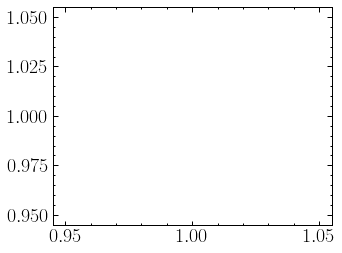

In [5]:
plt.plot(1,1)
plt.show()

In [6]:
## Load data
data = pd.read_excel(r'nacl_sims_lunna_CNnq6_ion.xlsx')

## Constants
## Avogadro
NA=6.02214076E23;
## kT
kT=2.49; #kJ/mol;

print(data)

ERR=lambda tpl, kT, nX, ntot, nstot : -kT*np.log(X(nX,ntot,nstot)/(tpl[0])) \
                                        +(2/3)*tpl[1]*np.power(nX,-1/3) 


#Initial Guess

#Fitting BootStrap
REPS=1000

#Number of simulations
Nsimulations=np.shape(data.Nstot)[0]
#xstar=np.zeros(REPS)
#sigma=np.zeros(REPS)

   Label             Simulation  Nstot  Ntot  Nss  Nss_in            f
0      1     b9-100fu-sphere-r8    616   276   88      64  523000000.0
1      2  b13.7-100fu-sphere-r6    405   228  114      88  587000000.0
2      3   b8-250fu-sphere-r9.5   1734   658  242     200  450000000.0
3      4     b9-350fu-sphere-r7   2158   776  246     206  444000000.0
4      5    b7-250fu-sphere-r11   1982   732  254     214  481000000.0
5      6    b5-100fu-sphere-r12   1110   528  272     230  487000000.0
6      7    b7-350fu-sphere-r11   2775   932  276     234  494000000.0
7      8    b7-400fu-sphere-r13   3171  1202  524     458  521000000.0


<span style="color: blue;"> <font size="4"> fitting equation still take Nss ion pair 

# Ion pair Ntot and Nss not modified yet 

In [7]:
F_macro=lambda nX, kT, ntot, nstot, xstar,sigmaprime,:\
        -nX*kT*(np.log(X_macro(ntot,nstot)/xstar))+sigmaprime*np.power(nX,2/3)

F=lambda nX, kT, ntot, nstot, xstar, sigmaprime, : \
                                -nX*kT*(np.log(X(nX,ntot,nstot)/xstar)) \
                                +ntot*kT*np.log(X(nX,ntot,nstot)/X(0,ntot,nstot)) \
                                +nstot*kT*np.log((1-X(nX,ntot,nstot))/(1-X(0,ntot,nstot))) \
                                +sigmaprime*np.power(nX,2/3)

In [8]:
kT

2.49

In [9]:
data

,Label,Simulation,Nstot,Ntot,Nss,Nss_in,f
0,1,b9-100fu-sphere-r8,616,276,88,64,523000000.0
1,2,b13.7-100fu-sphere-r6,405,228,114,88,587000000.0
2,3,b8-250fu-sphere-r9.5,1734,658,242,200,450000000.0
3,4,b9-350fu-sphere-r7,2158,776,246,206,444000000.0
4,5,b7-250fu-sphere-r11,1982,732,254,214,481000000.0
5,6,b5-100fu-sphere-r12,1110,528,272,230,487000000.0
6,7,b7-350fu-sphere-r11,2775,932,276,234,494000000.0
7,8,b7-400fu-sphere-r13,3171,1202,524,458,521000000.0


In [10]:
#Number of simulations
#REPS=1000
Nsimulations=np.shape(data.Nstot)[0]
xstar1=np.zeros(REPS)
sigma1=np.zeros(REPS)

In [11]:
REP=0
print('Running Booststrap fitting with', REPS, 'repetitions')
while REP < REPS:
    ## Choose simulations with replacement, ensure ≥2/3 are unique
    #min_unique = ceil(2 * Nsimulations / 3)
    #while True:
    #    #test1=np.random.randint(0, Nsimulations1_5-1, Nsimulations1_5-1)
    #    #simulations=np.append(test1,0)
    #    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    #    if len(np.unique(simulations)) >= min_unique:
    #        break
    
    #no uniqueness 
    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    #print(np.max(data.Nss[simulations]))
    #print(np.min(data.Nss[simulations]))
    #print("")
    

    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR,guess,args=(kT, data.Nss[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)
    
    print_progress(REP, REPS-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0:  
        #tplFitted[0]>=0.11 and tplFitted[0]<=0.14
        #tplFitted[0]>0 and tplFitted[1]>0: works too 
        if success > 0:
            xstar1[int(REP)]=tplFitted[0]
            sigma1[int(REP)]=tplFitted[1]
            REP+=1

Running Booststrap fitting with 1000 repetitions
|**************************************************| 100%

In [12]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "verdana"})
    #"font.verdana": ["computer modern roman"],
    #"font.size": 18})
    
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


The estimated solubility of is: 0.1240065202889096 +/- 0.0054518220885058305 [-] (molar fraction of ions)
The estimated surface energy is: 10.504791267248487 +/- 1.279463601132527 kJ/mol


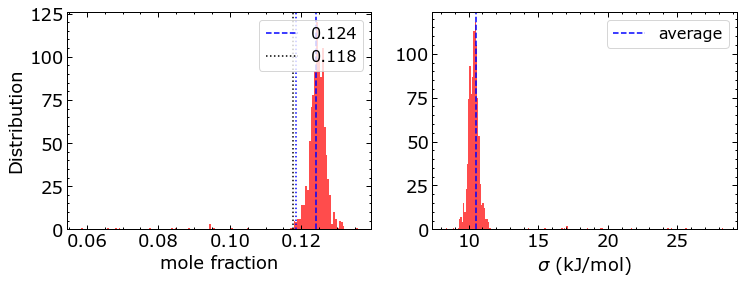

In [13]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(xstar1, bins = 'auto',alpha=0.7,color='red',density=False)
ax[0].set_xlabel('mole fraction')
ax[0].set_ylabel('Distribution')

xstar_estimate1=np.mean(xstar1) #np.mean(xstar1)/(2-np.mean(xstar1))
xstar_err1=np.std(xstar1) #np.std(xstar1)/(2-np.std(xstar1))

ax[0].axvline(x=xstar_estimate1, color='b', linestyle='--',label='%.3f' % xstar_estimate1)
ax[0].axvline(x=xstar_estimate1-xstar_err1, color='b', linestyle=':')

ax[0].axvline(x=2*0.0625/(1+0.0625), color='black', linestyle=':',label='%.3f' % (2*0.0625/(1+0.0625)))

ax[0].legend(loc="upper right",frameon=True, fontsize=16)

ax[1].hist(sigma1, bins = 'auto',alpha=0.7,color='red',density=False)
ax[1].set_xlabel('$\\sigma$ (kJ/mol)') #('$\\sigma$ (kT/nm$^2$)')

a,b=np.histogram(sigma1, bins = 'auto')
sigma_estimate1=np.mean(sigma1)
sigma_err1=np.std(sigma1) #standard deviation 

ax[1].axvline(x=sigma_estimate1, color='b', linestyle='--',label='average')
#ax[1].axvline(x=37.9, color='black', linestyle=':',label='37.9')

ax[1].legend(loc="upper right",frameon=True,fontsize=16)

#ax[0].set_xlim(0.055,0.08)
#ax[1].set_xlim(6,12)


print('\nThe estimated solubility of is:',xstar_estimate1,'+/-',xstar_err1,'[-] (molar fraction of ions)')
print('The estimated surface energy is:',sigma_estimate1,'+/-',sigma_err1,'kJ/mol') #it was kT/nm2 in the origina script


fig.savefig('NaCl_test1.png', dpi=100, bbox_inches='tight')

In [14]:
sigma_err1

1.279463601132527

In [15]:
xstar_estimate1

0.1240065202889096

In [16]:
xstar_estimate1/(2-xstar_estimate1)

0.06610178640280084

In [17]:
xstar_err1/(2-xstar_err1)

0.002733361945768827

In [18]:
xstar_err1

0.0054518220885058305

In [19]:
(xstar_estimate1/(2-xstar_estimate1))/(0.0625/3.7) #kg/mol

3.9132257550458105

In [20]:
(xstar_err1/(2-xstar_err1))/(0.0625/3.7)

0.1618150271895146

In [21]:
data

,Label,Simulation,Nstot,Ntot,Nss,Nss_in,f
0,1,b9-100fu-sphere-r8,616,276,88,64,523000000.0
1,2,b13.7-100fu-sphere-r6,405,228,114,88,587000000.0
2,3,b8-250fu-sphere-r9.5,1734,658,242,200,450000000.0
3,4,b9-350fu-sphere-r7,2158,776,246,206,444000000.0
4,5,b7-250fu-sphere-r11,1982,732,254,214,481000000.0
5,6,b5-100fu-sphere-r12,1110,528,272,230,487000000.0
6,7,b7-350fu-sphere-r11,2775,932,276,234,494000000.0
7,8,b7-400fu-sphere-r13,3171,1202,524,458,521000000.0


0 Sss = 1.89 for b9-100fu-sphere-r8 with x*=0.1240
1 Sss = 1.77 for b13.7-100fu-sphere-r6 with x*=0.1240
2 Sss = 1.56 for b8-250fu-sphere-r9.5 with x*=0.1240
3 Sss = 1.59 for b9-350fu-sphere-r7 with x*=0.1240
4 Sss = 1.57 for b7-250fu-sphere-r11 with x*=0.1240
5 Sss = 1.51 for b5-100fu-sphere-r12 with x*=0.1240
6 Sss = 1.54 for b7-350fu-sphere-r11 with x*=0.1240
7 Sss = 1.42 for b7-400fu-sphere-r13 with x*=0.1240


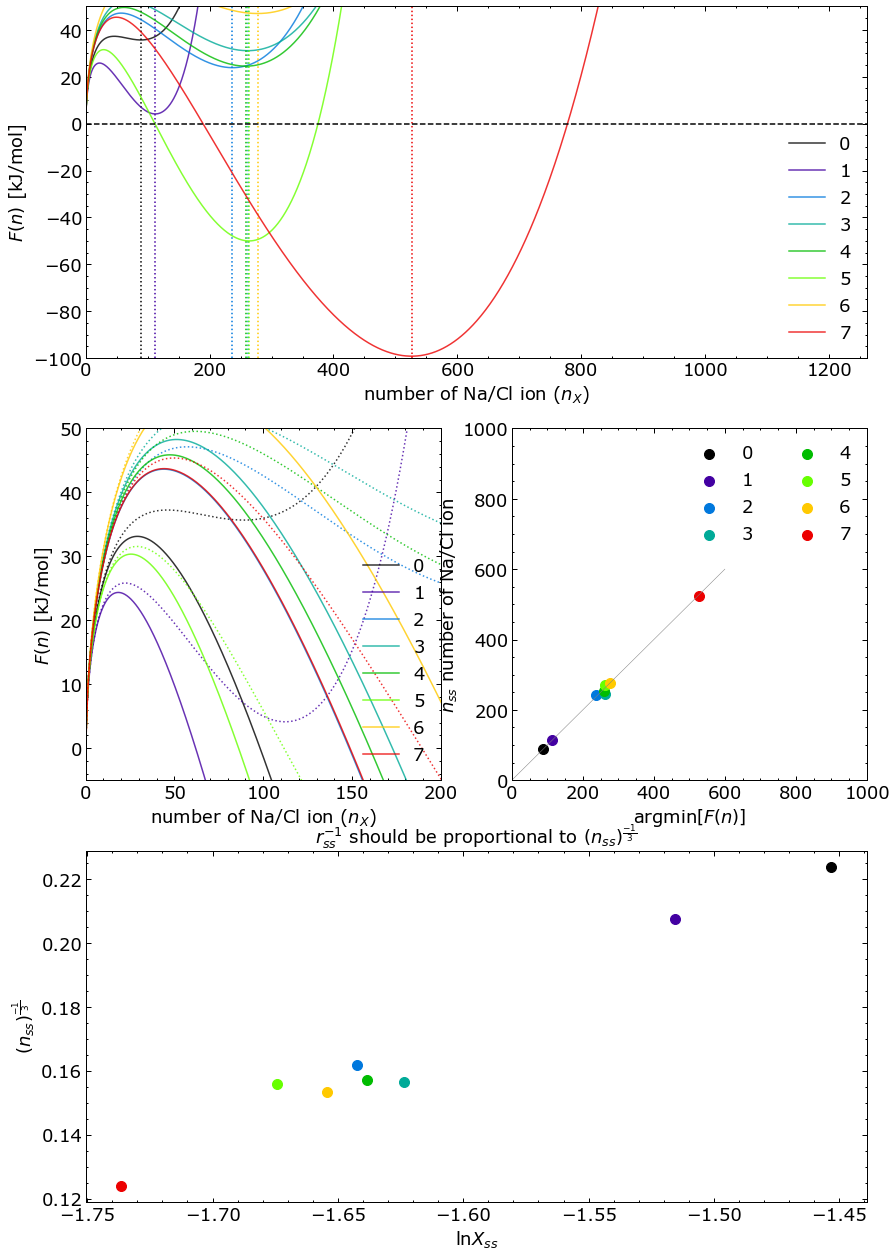

In [22]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "verdana"})
    #"font.verdana": ["computer modern roman"],
    #"font.size": 18})
    
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


#sigma_estimate1_used= #mole fraction 
#xstar_estimate1_used= #kT/nm2

## Plot sub-figures setup
fig = plt.figure(figsize=(14, 22))
sub1 = fig.add_subplot(3,2,(1,2))
sub2 = fig.add_subplot(3,2,3)
sub3 = fig.add_subplot(3,2,4)
sub4 = fig.add_subplot(3,2,(5,6))

## labels
sub1.set_xlabel('number of Na/Cl ion ($n_X$)')
sub1.set_ylabel('$F(n)$ [kJ/mol]')
sub2.set_xlabel('number of Na/Cl ion ($n_X$)')
sub2.set_ylabel('$F(n)$ [kJ/mol]')
sub3.set_xlabel('argmin$[F(n)]$')
sub3.set_ylabel('$n_{ss}$ number of Na/Cl ion')

fes=[]
nn_=[]
argminF=np.zeros(Nsimulations) 
argmaxF=np.zeros(Nsimulations) 
DF=np.zeros(Nsimulations)      
DF_steady=np.zeros(Nsimulations)
xss=np.zeros(Nsimulations)
xss_gamma=np.zeros(Nsimulations)
x_macro=np.zeros(Nsimulations)
rho_macro=np.zeros(Nsimulations)
rho_ss=np.zeros(Nsimulations)
S_ncrit_corr=np.zeros((Nsimulations,2))
S_ncrit_bkcal=np.zeros((Nsimulations,2))

color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))

#compute Free Energies in confined Volume (and plot panel 1)
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    nn=np.linspace(0, (data.Ntot[SIM])-1, num=1000)
    
    X_1=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM])
    print("%d Sss = %.2lf for %s with x*=%.4lf" % (SIM,X_1/xstar_estimate1,data.Simulation[SIM],xstar_estimate1))
    if X_1/xstar_estimate1 >= 1.0:
        FES=F(nn,kT, (data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        nn_.append(nn)    
        X_m=X(0,data.Ntot[SIM],data.Nstot[SIM])
        FESm=F_macro(nn,kT,(data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        if SIM>=0:
            argminF[SIM]=nn[FES==np.min(FES[150:])]
            argmaxF[SIM]=nn[FESm==np.max(FESm)]
        else:
            argminF[SIM]=nn[FES==np.min(FES[:])]
            argmaxF[SIM]=nn[FESm==np.max(FESm)]
    
        line,=sub1.plot(nn,FES,color=c,alpha=0.8,label="%d" % SIM)
        sub2.plot(nn,FESm,color=c,alpha=0.8,label="%d" % SIM)
        sub2.plot(nn,FES,color=c,alpha=0.8,ls=":")
        sub1.axvline(x=argminF[SIM],color=c,ls=":")
        sub3.scatter(argminF[SIM],data.Nss[SIM],color=c,s=100,label="%d" % SIM) 
        
        sub4.scatter(np.power(np.log(X_1),1),np.power(argminF[SIM],-1/3),color=c,s=100)
        #sub4.scatter(np.power(X_1,1),np.power(argminF[SIM],-1/3),color=c,s=100)
        
sub4.set_xlabel(r"ln$X_{ss}$")
#sub4.set_xlabel(r"$X_{ss}$")
sub4.set_title(r"$r_{ss}^{-1}$ should be proportional to $(n_{ss})^{\frac{-1}{3}}$")
sub4.set_ylabel(r'$(n_{ss})^{\frac{-1}{3}}$')
sub2.set_ylim([-5,50])
sub2.set_xlim([0,200])        
sub1.legend(frameon=False)
sub2.legend(frameon=False)
sub3.legend(ncol=2,frameon=False)
sub3.plot(np.linspace(0, 600, num=1000),np.linspace(0, 600, num=1000),color='grey',linewidth=0.5) 
sub3.set_xlim(0,1000)
sub3.set_ylim(0,1000)
#sub4.set_xlim(1,2.0)
sub4.legend(ncol=1,loc="upper right",frameon=False)

sub1.axhline(y=0,ls="--",color="black")
sub1.set_xlim(0,)
sub1.set_ylim(-100,50)
#sub1.set_title(r"using $\sigma_1$ and $x^*_1$ from including the extreme point")
plt.savefig('Test1.png', dpi=200, bbox_inches='tight',transparent=False)

In [23]:
print(xstar_estimate1)
print(sigma_estimate1)

0.1240065202889096
10.504791267248487


In [24]:
data

,Label,Simulation,Nstot,Ntot,Nss,Nss_in,f
0,1,b9-100fu-sphere-r8,616,276,88,64,523000000.0
1,2,b13.7-100fu-sphere-r6,405,228,114,88,587000000.0
2,3,b8-250fu-sphere-r9.5,1734,658,242,200,450000000.0
3,4,b9-350fu-sphere-r7,2158,776,246,206,444000000.0
4,5,b7-250fu-sphere-r11,1982,732,254,214,481000000.0
5,6,b5-100fu-sphere-r12,1110,528,272,230,487000000.0
6,7,b7-350fu-sphere-r11,2775,932,276,234,494000000.0
7,8,b7-400fu-sphere-r13,3171,1202,524,458,521000000.0


mole fraction of NaCl

In [25]:
print(xstar_estimate1/(2-xstar_estimate1))
print(0.0625)

0.06610178640280084
0.0625


In [26]:
#https://doi.org/10.1039/D1CP02093E
Lamas_seeded = pd.DataFrame([[2.16, 0], [2.7, 21], [3.24, 28]], columns=['S', 'J'])

#https://doi.org/10.1039/D1CP02093E NPT and NVT
Lamas_bruteforce_NPT = pd.DataFrame([[3.92, 30.85], [3.98, 31.04], [4.05, 31.48]], columns=['S', 'J'])
Lamas_bruteforce_NVT = pd.DataFrame([[3.78, 30.78], [3.92, 31.0], [4.05, 31.08]], columns=['S', 'J'])

#https://doi.org/10.1039/D1CP02093E
Jiang_FFS = pd.DataFrame([[2.16, -7.12], [2.7, 19.07], [3.24, 27.33], [4.16, 30.64]], columns=['S', 'J'])

#https://doi.org/10.1039/D1CP02093E
Jiang_bruteforce_2018 = pd.DataFrame([[4.14, 31.27], [4.49, 32.29]], columns=['S', 'J'])

#https://aip.scitation.org/doi/full/10.1063/1.5084248
Jiang_MFPT = pd.DataFrame([[3.58, 31.07], [3.75, 31.33], [3.95, 31.55], [4.05, 31.63], [4.32, 31.85], [4.59, 32.23], [5, 32.64]], columns=['S', 'J'])

#https://doi.org/10.1039/D1CP02093E
Lanaro_bruteforce = pd.DataFrame([[4.22, 30.64]], columns=['S', 'J'])

# https://doi.org/10.1039/D1FD00089F
Finney_MSM = pd.DataFrame([[3.7, 31.54]], columns=['S', 'J'])              

#https://academic.oup.com/pnasnexus/article/1/2/pgac033/6556021?login=true
Bulutoglu_MFPT = pd.DataFrame([[4.05, 28.75]], columns=['S', 'J'])   

# https://aip.scitation.org/doi/10.1063/1.5024009
Zimmerman_seeded = pd.DataFrame([[2.16, 28.14], [2.7, 31.63], [3.24, 33.9]], columns=['S', 'J'])
Zimmerman_CN4 = pd.DataFrame([[2.16, 12.68], [2.7, 17.97], [3.24, 25.92]], columns=['S', 'J'])
Zimmerman_CN5 = pd.DataFrame([[2.16, 24.21], [2.7, 27.55], [3.24, 30.52]], columns=['S', 'J'])
Zimmerman_CN1 = pd.DataFrame([[2.16, -7.3], [2.7, -0.93], [3.24, 12.87]], columns=['S', 'J'])

# https://pubs.acs.org/doi/10.1021/acs.jctc.9b00795
Karmakar_wtmetad = pd.DataFrame([[2.59, 9.4], [3.14, 20.79]], columns=['S', 'J'])


#https://doi.org/10.1039/D1CP02093E
Desarnaud_xpt = pd.DataFrame([[1.6, -2.42]], columns=['S', 'J'])
Gao_xpt = pd.DataFrame([[2.4, 19.58]], columns=['S', 'J'])
Na_xpt = pd.DataFrame([[2.3, 14.62]], columns=['S', 'J'])

In [27]:
G_macro4=lambda nX, kT, S, sigmaprime, : -nX*kT*(np.log(S))+sigmaprime*np.power(nX,2/3)
Z_macro4=lambda nstar, kT, S, :np.sqrt(kT*abs(np.log(S)/6/np.pi/kT/nstar))

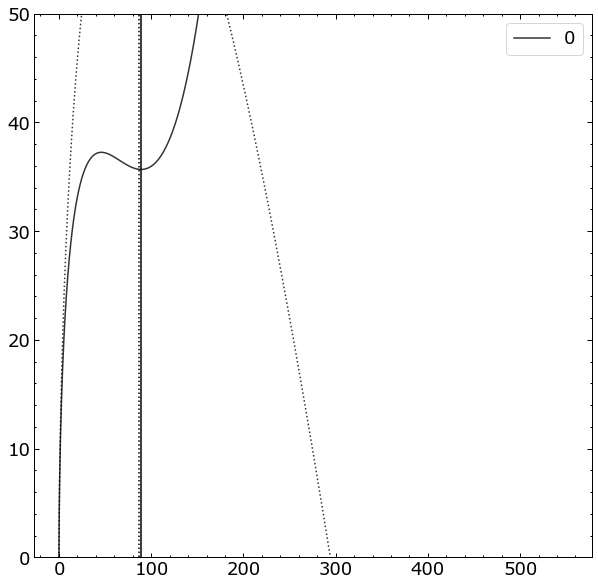

In [28]:
plt.rcParams["figure.figsize"] = (10,10)

#Initialise vectors for macroscopic quantitites
fes=[]
nn_=[]
argminF=np.zeros(Nsimulations) #Steady state nucleus size predicted by the MLD model
argmaxF=np.zeros(Nsimulations) #Critical nucleus size
DF=np.zeros(Nsimulations)      #Nucleation barrier
DF_steady=np.zeros(Nsimulations)
xss=np.zeros(Nsimulations)
xss_gamma=np.zeros(Nsimulations)
x_macro=np.zeros(Nsimulations)
rho_macro=np.zeros(Nsimulations)
rho_ss=np.zeros(Nsimulations)
S_ncrit_corr=np.zeros((Nsimulations,2))
S_ncrit_bkcal=np.zeros((Nsimulations,2))

color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))

#compute Free Energies in confined Volume (and plot panel 1)
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    nn=np.linspace(0, (data.Ntot[SIM])-1, num=1000)
    nm=np.linspace(0, ((data.Ntot[SIM])-1)*2, num=1000)
    #nn=np.linspace(0, 500, num=1000)
    
    #X=lambda nX, ntot, nstot,: (ntot-nX)/(ntot+nstot-nX)
    X_1=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM])
    #print("%d Sss = %.2lf for %s with x*=%.4lf" % (SIM,X_1/xstar_estimate1,data.Simulation[SIM],xstar_estimate1))
    
    if X_1/xstar_estimate1 >= 1.0:
        FES=F(nn,kT, (data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        #G_macro4=lambda nX, kT, S2, sigmaprime, : -nX*kT*(np.log(S2))+sigmaprime*np.power(nX,2/3)
        FESm_ss=G_macro4(nm,kT, X_1/xstar_estimate1,sigma_estimate1)
        
        if SIM==0:
            argminF[SIM]=nn[FES==np.min(FES[150:])]
            argmaxF[SIM]=nm[FESm_ss==np.max(FESm_ss)]

            plt.plot(nn,FES,color=c,alpha=0.8,label="%d" % SIM)
            plt.axvline(x=argminF[SIM],color=c)
        
            plt.plot(nm,FESm_ss,color=c,alpha=0.8,ls=":")
            plt.axvline(x=argmaxF[SIM],ls=":",color=c)
        
plt.axhline(y=0,ls="-",lw=1,color="black")
plt.ylim(-0,50)
plt.legend()
plt.show()
plt.rcParams["figure.figsize"] = (5,4)

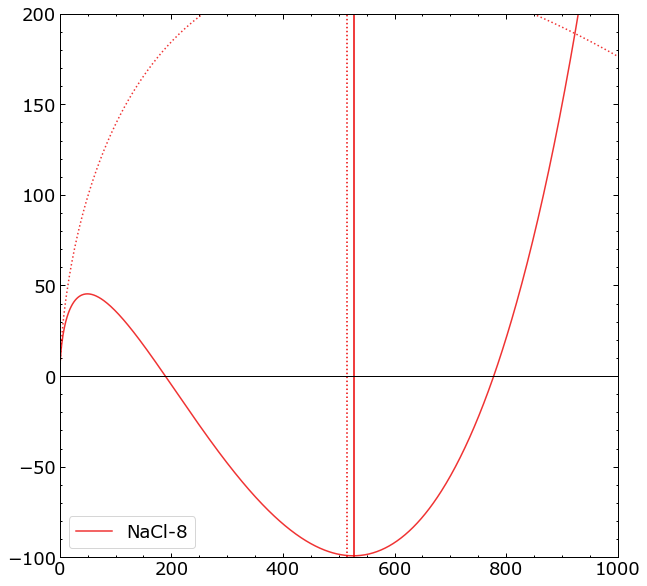

In [29]:
plt.rcParams["figure.figsize"] = (10,10)

argminF=np.zeros(Nsimulations) 
argmaxF=np.zeros(Nsimulations) 
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))

#compute Free Energies in confined Volume (and plot panel 1)
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    nn=np.linspace(0, (data.Ntot[SIM])-1, num=1000)
    nm=np.linspace(0, ((data.Ntot[SIM])-1)*2, num=1000)
    #nn=np.linspace(0, 500, num=1000)
    
    #X=lambda nX, ntot, nstot,: (ntot-nX)/(ntot+nstot-nX)
    X_1=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM])
    #print("%d Sss = %.2lf for %s with x*=%.4lf" % (SIM,X_1/xstar_estimate1,data.Simulation[SIM],xstar_estimate1))
    
    if X_1/xstar_estimate1 >= 1.0:
        FES=F(nn,kT, (data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        #G_macro4=lambda nX, kT, S2, sigmaprime, : -nX*kT*(np.log(S2))+sigmaprime*np.power(nX,2/3)
        FESm_ss=G_macro4(nm,kT, X_1/xstar_estimate1,sigma_estimate1)
        
        if SIM>=7:
            argminF[SIM]=nn[FES==np.min(FES[150:])]
            argmaxF[SIM]=nm[FESm_ss==np.max(FESm_ss)]

            plt.plot(nn,FES,color=c,alpha=0.8,label="NaCl-%d" % (SIM+1))
            plt.axvline(x=argminF[SIM],color=c)
        
            plt.plot(nm,FESm_ss,color=c,alpha=0.8,ls=":")
            plt.axvline(x=argmaxF[SIM],ls=":",color=c)
        
plt.axhline(y=0,ls="-",lw=1,color="black")
plt.ylim(-100,200)
plt.xlim(0,1000)
plt.legend()
plt.show()
plt.rcParams["figure.figsize"] = (5,4)

In [30]:
#output freuqnece =0.001*10000= 10 ps xtc in the mdp file 
space=0.001*10000/1000 #ns
#-skip 10 created too much noise fluctuation 
print(space) #in ns

0.01


In [31]:
dFdn=lambda nX, kT, ntot, nstot, xstar, sigmaprime,: \
                                -kT*np.log(X(nX,ntot,nstot)/xstar) \
                                +2/3*sigmaprime*np.power(nX,-1/3)

In [32]:
dGdn=lambda nX, kT, S, sigmaprime,: -kT*np.log(S)+2/3*sigmaprime*np.power(nX,-1/3)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
import matplotlib.patches as patches

In [34]:
print(xstar_estimate1)

0.1240065202889096


In [35]:
r_min_na = 3.25
r_min_cl = 4.05

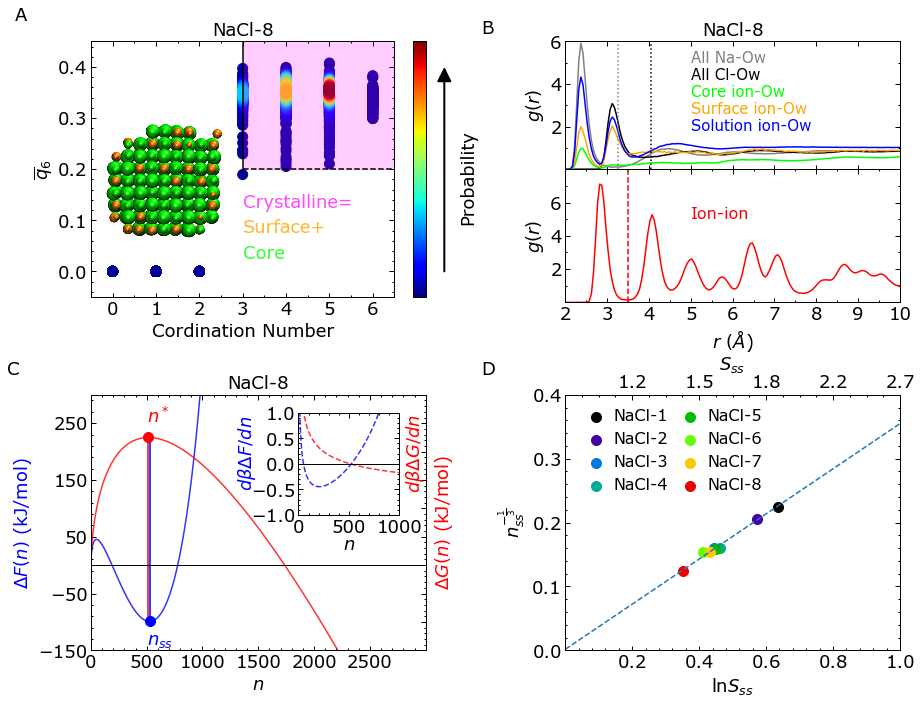

In [36]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[7000:11700,500:6500])
ax01 = plt.axes([1,1,1,1])
ip1 = InsetPosition(ax1, [0.62,0.53,0.3,0.4]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip1)

ax2 = fig.add_subplot(gs[7000:11700,9000:15000])

ax3 = fig.add_subplot(gs[500:5200,500:7300]) 

ax4 = fig.add_subplot(gs[500:2850,9000:15000]) 
ax5 = fig.add_subplot(gs[2850:5300,9000:15000])

#################################################################################
ax1.text(-0.25, 1.10, 'C', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.25, 1.10, 'D', transform=ax2.transAxes,verticalalignment='center')
ax3.text(-0.25, 1.10, 'A', transform=ax3.transAxes,verticalalignment='center')
ax4.text(-0.25, 1.10, 'B', transform=ax4.transAxes,verticalalignment='center')
#################################################################################
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
#################################################################################
#xstar_estimate1=np.mean(xstar1) #np.mean(xstar1)/(2-np.mean(xstar1))
#################################################################################
argminF=np.zeros(Nsimulations) 
argmaxF=np.zeros(Nsimulations) 
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    nn=np.linspace(0, (data.Ntot[SIM])-1, num=1000)
    nm=np.linspace(0, ((data.Ntot[SIM])-1)*2, num=1000)
    
    X_1=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM])
    if SIM >=0:       
        FES=F(nn, kT, (data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        FESm_ss=G_macro4(nm,kT, X_1/xstar_estimate1,sigma_estimate1)
        DF=dFdn(nn,kT,(data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        
        if SIM==7:
            ax1.set_title("NaCl-%d" % (SIM+1))
            ax3.set_title("NaCl-%d" % (SIM+1))
            ax4.set_title("NaCl-%d" % (SIM+1))
            argminF[SIM]=nn[FES==np.min(FES[150:])]
            argmaxF[SIM]=nm[FESm_ss==np.max(FESm_ss)]

            ax1.plot(nn,FES,alpha=0.8,ls="-",color="blue") 
            ax1.plot(nm,FESm_ss,alpha=0.8,ls="-",color="red")
            
            value1=G_macro4(argminF[SIM],kT, X_1/xstar_estimate1,sigma_estimate1)
            ax1.plot([argminF[SIM],argminF[SIM]],[np.min(FES[:]),value1],marker="o",
                     color="blue",markersize=0,markerfacecolor="none",zorder=-2)
            ax1.scatter(argminF[SIM],np.min(FES[:]),marker="o",color="blue",s=100,zorder=0)
            
            value1=F(argmaxF[SIM], kT, (data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
            ax1.plot([argmaxF[SIM],argmaxF[SIM]],[value1,np.max(FESm_ss[:])],marker="o",
                     color="red",markersize=0,markerfacecolor="none",zorder=-2)
            ax1.scatter(argmaxF[SIM],np.max(FESm_ss[:]),marker="o",color="red",s=100,zorder=0)
            
            #ax1.axvline(x=argminF[SIM],ls="-",color="blue") 
            #ax1.axvline(x=argmaxF[SIM],ls="-",color="red")
            
            DFm_ss=dGdn(nm, kT, X_1/xstar_estimate1, sigma_estimate1)
            ax01.plot(nn,DF, alpha=0.8,ls="--",color="blue")
            ax01.plot(nm,DFm_ss,alpha=0.8,ls="--",color="red")
            #ax01.axvline(x=argminF[SIM],ls="--",color="blue")
            #ax01.axvline(x=argmaxF[SIM],ls="--",color="red")
            
ax1.text(500,-140,r"$n_{ss}$",color="blue")
ax1.text(500,250,r"$n^*$",color="red")
ax1.axhline(y=0,ls="-",lw=1,color="black")
ax1.set_ylim(-150,300)
ax1.set_yticks(np.arange(-150,301,100))
ax1.set_xlim(0,3000)
ax1.set_xticks(np.arange(0,3000,500))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.set_ylabel('$\Delta F(n)$ (kJ/mol)',color="blue")
ax1.set_xlabel('$n$')
        
ax11 = ax1.twinx()
ax11.set_ylabel(r'$\Delta G(n)$ (kJ/mol)',color="r")
ax11.yaxis.set_minor_locator(AutoMinorLocator(5))
ax11.set_ylim(-150,300)
ax11.set_yticks(np.arange(-150,301,50))
ax11.set_yticklabels([])


ax01.axhline(y=0,ls="-",lw=1,color="black")
ax01.set_ylim(-1,1)
ax01.set_yticks(np.arange(-1,1.1,0.5))
ax01.set_xlim(0,1000)
ax01.set_xticks(np.arange(0,1001,500))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.set_ylabel(r'$d \beta \Delta F/dn$',color="blue")
ax01.set_xlabel('$n$')

ax31 = ax01.twinx()
ax31.set_ylabel(r'$d \beta \Delta G/dn$',color="red")
ax31.yaxis.set_minor_locator(AutoMinorLocator(5))
ax31.set_ylim(-1,1)
ax31.set_yticks(np.arange(-1,1.1,0.5))
ax31.set_yticklabels([])

ax01.yaxis.set_label_coords(-0.4, 0.6)
ax01.xaxis.set_label_coords(0.5, -0.2)
ax31.yaxis.set_label_coords(1.05, 0.6)
#################################################################################
#################################################################################
X2=np.zeros(Nsimulations)
ln_X2_list=[]
rev_nss_list=[]
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))

for SIM in np.arange(0,Nsimulations):
    c=next(color)

    X2[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) 
    ax2.scatter(np.log((X2[SIM]/xstar_estimate1)),np.power(data.Nss[SIM],-1/3),color=c,s=100,label="NaCl-%d" % (SIM+1))
    rev_nss_list.append(np.power(data.Nss[SIM],-1/3))
    ln_X2_list.append(np.log((X2[SIM]/xstar_estimate1)))
    
lnm,lnn=np.polyfit(ln_X2_list,rev_nss_list,1)

nn=np.linspace(0.0, 1.0,num=10)
ax2.legend(frameon=False,ncol=2,loc="upper left",handletextpad=0.1,columnspacing=0.4,fontsize=16)
ax2.plot(nn,nn*lnm+lnn,ls="--")
ax2.set_xlabel(r"ln$S_{ss}$")
ax2.set_ylabel(r'$n_{ss}^{-\frac{1}{3}}$')
ax2.set_xlim(0,1)
ax2.set_xticks(np.arange(0.2,1.1,0.2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.set_ylim(0,0.4)
ax2.set_yticks(np.arange(0,0.5,0.1))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))


def tick_function(X):
    V = np.exp(X) #X
    return ["%.1f" % z for z in V]
new_tick_locations = np.arange(0.2,1.1,0.2)
ax22 = ax2.twiny()
ax22.set_xlim(ax2.get_xlim())
ax22.set_xticks(new_tick_locations)
ax22.set_xticklabels(tick_function(new_tick_locations))
ax22.set_xlabel(r"$S_{ss}$")

#################################################################################
#################################################################################
all_CN=np.load("../Matteo/b7-400fu-sphere-r13/all_CN.npy")
all_nq6_guard=np.load("../Matteo/b7-400fu-sphere-r13/all_nq6_guard.npy")
mask_bad = (all_CN<5) & (all_nq6_guard>=0.4)
my_cmap = plt.cm.jet
x=all_CN[~mask_bad][0:-1:1000] 
y=all_nq6_guard[~mask_bad][0:-1:1000]

data_ax3,x_e,y_e=np.histogram2d(x, y, bins = [30,30], density = False)
z=interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1]) ), 
          data_ax3, np.vstack([x,y]).T, method = "splinef2d", bounds_error = False)
z[np.where(np.isnan(z))] = 0.0

idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax3.scatter(x,y,c=z,cmap=my_cmap,s=100)
norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap=my_cmap), ax=ax3)
#cbar.ax.set_ylabel('Number of data')
cbar.ax.set_yticks([])
ax3.text(8,0.1,"Probability",rotation=90)
#ax3.arrow(9, 0.1, 0, 0.1, width=0.05,color="black")
xyA = [7.65, 0.00]
xyB = [7.65, 0.40]
arrow = patches.ConnectionPatch(
    xyA,
    xyB,
    coordsA=ax3.transData,
    coordsB=ax3.transData,
    color="black",
    arrowstyle="-|>",  
    mutation_scale=30,
    linewidth=2)
fig.patches.append(arrow)


#ax3.annotate('', xy=(0, -0.1), xycoords='axes fraction', xytext=(1, -0.1), 
#            arrowprops=dict(arrowstyle="<-", color='black'))


ax3.axhline(y=0.2,ls="--",color="black",xmin=0.5)
ax3.axvline(x=3,ls="-",color="black",ymin=0.5)
ax3.axvspan(3, 8, ymin=0.5, ymax=1, alpha=0.2, facecolor="magenta", ls="-.", edgecolor='magenta')

ax3.xaxis.set_minor_locator(AutoMinorLocator(2))
ax3.set_xlim(-0.5,6.5)
ax3.set_xticks(np.arange(0,6.5,1))

ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_ylim(-0.05,0.45)
ax3.set_yticks(np.arange(0,0.45,0.1))

ax3.set_xlabel("Cordination Number")
ax3.set_ylabel(r"$\overline{q}_6$")

ax3.text(3,0.125,"Crystalline=",color="magenta",alpha=0.7)
ax3.text(3,0.075,"Surface+",color="orange",alpha=0.8)
ax3.text(3,0.025,"Core",color="lime",alpha=0.8)


import matplotlib.cbook as cbook
import matplotlib.patches as patches
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,TextArea)
arr_img = plt.imread('/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/2.png')
xy = (1.2, 0.18)
imagebox = OffsetImage(arr_img, zoom=0.25)
imagebox.image.axes = ax3
ab = AnnotationBbox(imagebox,xy,frameon=False)
ax3.add_artist(ab)
#################################################################################
#################################################################################
ion_ion=np.loadtxt("/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/Q6_analysis/Ion-Ion_gofr_q6skip100.dat")
ax5.plot(ion_ion.T[0],ion_ion.T[1],label="All ion-ion",c="Red")
ax5.axvline(x=3.5,ls="--",color="red")
#ax5.axhline(y=1,ls="-",color="black")
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.set_ylim(0,8)
ax5.set_yticks(np.arange(2,8,2))

ax5.set_xlim(2,10)
ax5.set_xticks(np.arange(2,11,1))
ax5.xaxis.set_minor_locator(AutoMinorLocator(2))
ax5.set_ylabel("$g(r)$")
ax5.set_xlabel("$r$ $(\AA$)")
ax5.text(5,5,"Ion-ion",color="red",fontsize=16)
############################################################
Na_water=np.loadtxt("/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/Q6_analysis/NaOw_gofr_q6skip100.dat")
Cl_water=np.loadtxt("/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/Q6_analysis/ClOw_gofr_q6skip100.dat")
Solution_water=np.loadtxt("/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/Q6_analysis/user01_Ow_gofr_q6skip100.dat")
Interior_water=np.loadtxt("/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/Q6_analysis/user45_Ow_gofr_q6skip100.dat")
Surface_water=np.loadtxt("/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/Q6_analysis/user23_Ow_gofr_q6skip100.dat")

ax4.plot(Na_water.T[0],Na_water.T[1],label="All Na-Ow",c="grey")
ax4.plot(Cl_water.T[0],Cl_water.T[1],label="All Cl-Ow",c="black")
ax4.plot(Interior_water.T[0],Interior_water.T[1],label="Core ion-Ow",c="lime")
ax4.plot(Surface_water.T[0],Surface_water.T[1],label="Surface ion-Ow",c="orange")
ax4.plot(Solution_water.T[0],Solution_water.T[1],label="Solution ion-Ow",c="blue")
ax4.axvline(x=r_min_na,ls=":",color="grey")
ax4.axvline(x=r_min_cl,ls=":",color="black")

ax4.text(5,5.0,"All Na-Ow",color="grey",fontsize=15)
ax4.text(5,4.2,"All Cl-Ow",color="black",fontsize=15)
ax4.text(5,3.4,"Core ion-Ow",color="lime",fontsize=15)
ax4.text(5,2.6,"Surface ion-Ow",color="orange",fontsize=15)
ax4.text(5,1.8,"Solution ion-Ow",color="blue",fontsize=15)


#ax4.legend(loc="upper right",frameon=False)
ax4.set_ylabel("$g(r)$")
ax4.yaxis.set_minor_locator(AutoMinorLocator(2))
ax4.set_ylim(0,6)
ax4.set_yticks(np.arange(2,6.1,2))

ax4.xaxis.set_minor_locator(AutoMinorLocator(1))
ax4.set_xlim(2,10)
ax4.set_xticks(np.arange(2,11,1))
ax4.set_xticklabels([])
#################################################################################
#################################################################################
#################################################################################


fig.savefig('nacl_3_maybeF1.png', dpi=200, bbox_inches='tight',transparent=False)

In [37]:
np.exp(0.2)

1.2214027581601699

In [38]:
len(all_nq6_guard[~mask_bad][0:-1:1000])

11015

In [39]:
len(all_CN[~mask_bad][0:-1:1000])

11015

In [40]:
frequency = 5.0e8 #s-1
print(frequency)

500000000.0


In [41]:
#1 mole fraction of NaCl to number density of NaCl ion pair 
# might be wrong 
mf_to_m3=3.3e28
mf_to_nm3=3.3e1
print(mf_to_m3)

3.3e+28


In [42]:
#to compare with 8 m Zimmermann data (critical paper)
mf_to_mole_per_l=37 #1 mole fraction unit to 37 mol/L?

In [43]:
sigma_estimate1

10.504791267248487

In [44]:
xstar_estimate1

0.1240065202889096

In [45]:
#sigma_err1=np.std(sigma1)
print(sigma_err1)

1.279463601132527


In [46]:
##########################################################################
##########################################################################
S4=np.linspace(1.5,4,15) #supersaturation of Na/Cl ions 
Ntest4=int(len(S4))

Stest4=np.zeros(Ntest4)      #mole fraction of Na/Cl ions 
Stest4_nacl=np.zeros(Ntest4) #mole fraction of NaCl pairs 
S4_nacl=np.zeros(Ntest4)

DG=np.zeros(Ntest4)
argmaxG=np.zeros(Ntest4) 
Zm=np.zeros(Ntest4)      

DG_up=np.zeros(Ntest4)
argmaxG_up=np.zeros(Ntest4) 
Zm_up=np.zeros(Ntest4)      

DG_low=np.zeros(Ntest4)
argmaxG_low=np.zeros(Ntest4) 
Zm_low=np.zeros(Ntest4)      


color=iter(cm.plasma(np.linspace(0,1,Ntest4+1)))
##########################################################################
##########################################################################
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000) #number of ions 
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
          
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])

In [47]:
S4

array([1.5       , 1.67857143, 1.85714286, 2.03571429, 2.21428571,
       2.39285714, 2.57142857, 2.75      , 2.92857143, 3.10714286,
       3.28571429, 3.46428571, 3.64285714, 3.82142857, 4.        ])

In [48]:
Stest4=S4*xstar_estimate1
Stest4

array([0.18600978, 0.2081538 , 0.23029782, 0.25244184, 0.27458587,
       0.29672989, 0.31887391, 0.34101793, 0.36316195, 0.38530597,
       0.40745   , 0.42959402, 0.45173804, 0.47388206, 0.49602608])

In [49]:
Stest4_nacl=Stest4/(2-Stest4)
Stest4_nacl

array([0.10254178, 0.11616723, 0.13013366, 0.14445405, 0.15914201,
       0.17421188, 0.18967876, 0.20555854, 0.22186798, 0.23862476,
       0.25584754, 0.27355602, 0.29177106, 0.3105147 , 0.32981029])

In [50]:
print((xstar_estimate1/(2-xstar_estimate1)))


0.06610178640280084


In [51]:
S4_nacl=Stest4_nacl/(xstar_estimate1/(2-xstar_estimate1)) 
S4_nacl

array([1.55127089, 1.75739919, 1.968686  , 2.1853274 , 2.40752958,
       2.6355094 , 2.86949519, 3.10972744, 3.35645968, 3.60995931,
       3.87050865, 4.13840592, 4.41396638, 4.69752363, 4.98943088])

S of NaCl is 4.14
S of NaCl is 4.41
S of NaCl is 4.70
S of NaCl is 4.99


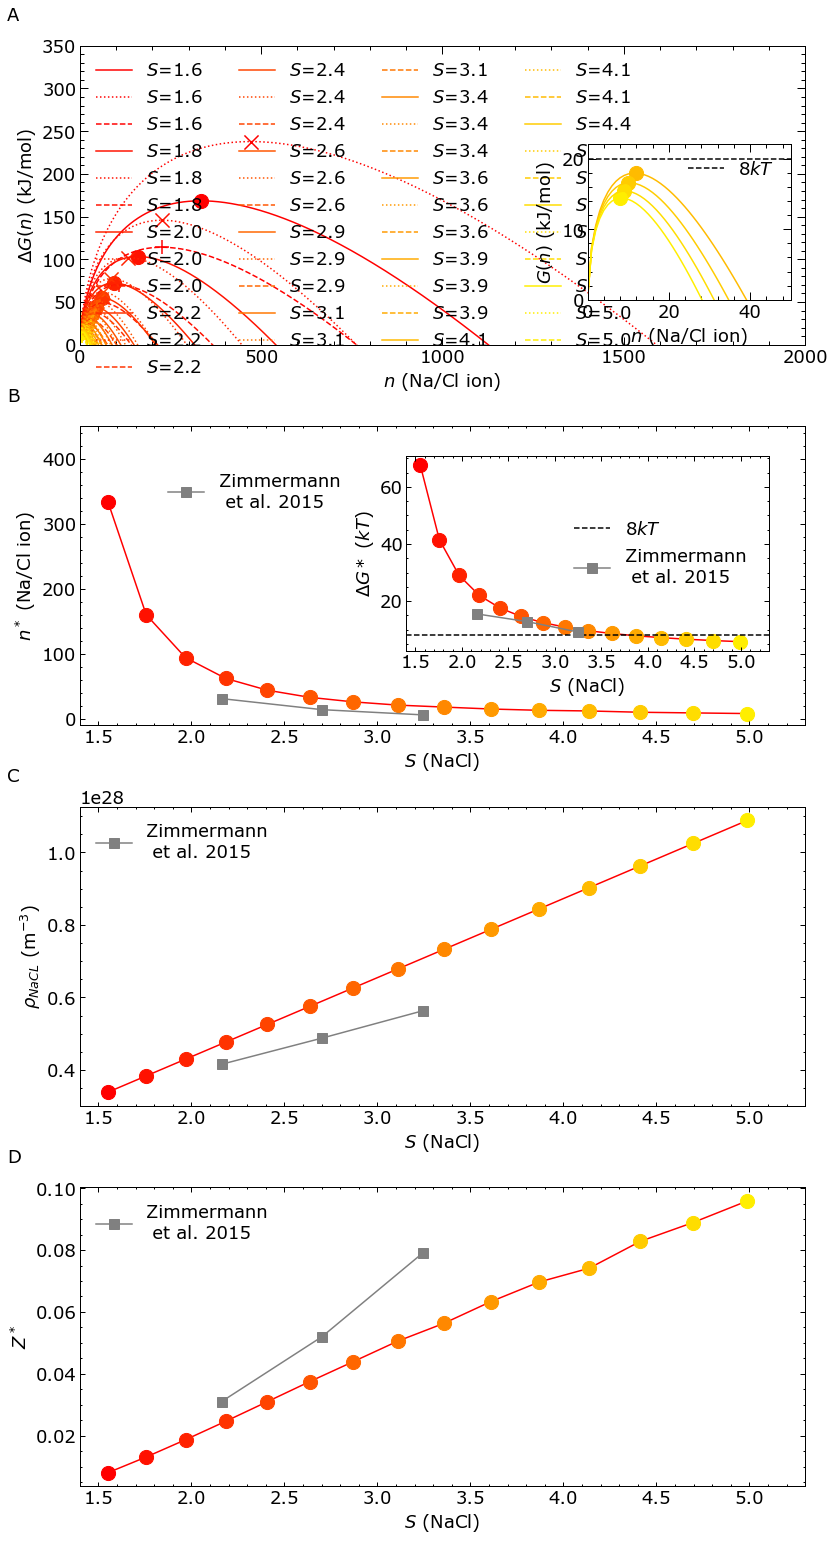

In [52]:
fig = plt.figure(figsize=(14, 40))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax0 = fig.add_subplot(gs[500:6000,500:13500])
ax01 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax0, [0.7,0.15,0.28,0.52]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip5)

ax3 = fig.add_subplot(gs[7500:13000,500:13500])
ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.45,0.25,0.50,0.65]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)

ax1 = fig.add_subplot(gs[14500:20000,500:13500])
ax2 = fig.add_subplot(gs[21500:27000,500:13500])

ax0.text(-0.1, 1.10, 'A', transform=ax0.transAxes,verticalalignment='center')
ax3.text(-0.1, 1.10, 'B', transform=ax3.transAxes,verticalalignment='center')
ax1.text(-0.1, 1.10, 'C', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.1, 1.10, 'D', transform=ax2.transAxes,verticalalignment='center')
##################################################################################################
##################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1))) #plasma
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
    Gm_up=G_macro4(nn,kT,S4[SIM],sigma_estimate1+sigma_err1)
    DG_up[SIM]=np.max(Gm_up)
    argmaxG_up[SIM]=nn[Gm_up==np.max(Gm_up)]
    Zm_up[SIM]=Z_macro4(int(argmaxG_up[SIM]),kT,S4[SIM])
    
    
    Gm_low=G_macro4(nn,kT,S4[SIM],sigma_estimate1-sigma_err1)
    DG_low[SIM]=np.max(Gm_low)
    argmaxG_low[SIM]=nn[Gm_low==np.max(Gm_low)]
    Zm_low[SIM]=Z_macro4(int(argmaxG_low[SIM]),kT,S4[SIM])
    
    
    ax3.scatter(S4_nacl[SIM],argmaxG[SIM],marker="o",s=200,color=c) #,facecolors="none"
    ax03.scatter(S4_nacl[SIM],DG[SIM]/kT,marker="o",s=200,color=c)
    
    ax1.scatter(S4_nacl[SIM],Stest4_nacl[SIM]*mf_to_m3,marker="o",s=200,color=c)
    ax2.scatter(S4_nacl[SIM],Zm[SIM],marker="o",s=200,color=c)
    
    if S4_nacl[SIM]>=3.9: #inset 
        print("S of NaCl is %.2f" % S4_nacl[SIM])
        ax01.plot(nn,Gm,color=c)
        ax01.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
    else:
        pass
    
    ax0.plot(nn,Gm,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM])
    ax0.plot(nn,Gm_up,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM],ls=":")
    ax0.plot(nn,Gm_low,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM],ls="--")
    
    ax0.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
    ax0.scatter(argmaxG_up[SIM],DG_up[SIM],marker="x",color=c,s=200)
    ax0.scatter(argmaxG_low[SIM],DG_low[SIM],marker="+",color=c,s=200)
        
#ax01.axhline(y=kT*5,label="5$kT$",color="black",ls=":")
ax01.axhline(y=kT*8,label="8$kT$",color="black",ls="--")


ax3.plot(S4_nacl,argmaxG,color="red",zorder=0) 
ax3.set_xlabel(r"$S$ (NaCl)")
ax03.plot(S4_nacl,DG/kT,color="red",zorder=0)
ax03.set_xlabel(r"$S$ (NaCl)")

ax1.plot(S4_nacl,Stest4_nacl*mf_to_m3,color="red",zorder=0)
ax2.plot(S4_nacl,Zm,color="red",zorder=0)

ax0.set_xlabel(r'$n$ (Na/Cl ion)')
ax0.set_ylabel(r'$\Delta G(n)$ (kJ/mol)')
ax0.set_xlim(0,2000)
ax0.set_xticks(np.arange(0,2500,500,dtype=int))
ax0.set_ylim(0,350)
ax0.set_yticks(np.arange(0,350.1,50,dtype=int))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.tick_params(which='major', length=8)
ax0.tick_params(which='minor', length=4)
ax0.tick_params(axis='both', which='major')
ax0.legend(loc='upper left', ncol=4, frameon=False) 

ax01.set_xlabel("$n$ (Na/Cl ion)")
ax01.set_ylabel('$G(n)$ (kJ/mol)')
ax01.set_ylim(0,22)
ax01.set_yticks(np.arange(0,22.5,10))
ax01.xaxis.set_minor_locator(AutoMinorLocator(5))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.tick_params(which='major', length=8)
ax01.tick_params(which='minor', length=4)
ax01.set_xlim(0,50)

ax3.set_ylabel(r"$n^*$ (Na/Cl ion)")
ax3.set_ylim(-10,450)
ax3.set_yticks(np.arange(0,450.1,100))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlim(1.4,5.3)
ax3.set_xticks(np.arange(1.5,5.1,0.5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))

ax03.axhline(y=8,label="8$kT$",color="black",ls="--")
ax03.set_ylabel('$\Delta G*$ ($kT$)')
ax03.set_xlim(1.4,5.3)
ax03.set_xticks(np.arange(1.5,5.1,0.5))
ax03.xaxis.set_minor_locator(AutoMinorLocator(5))

ax1.set_ylabel(r"$\rho_{NaCL}$ (m$^{-3}$)")
ax1.set_xlabel(r"$S$ (NaCl)")
ax1.set_xlim(1.4,5.3)
ax1.set_xticks(np.arange(1.5,5.1,0.5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel(r"$Z^*$")
ax2.set_xlabel(r"$S$ (NaCl)")
ax2.set_xlim(1.4,5.3)
ax2.set_xticks(np.arange(1.5,5.1,0.5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

###############################################################################
###############################################################################
Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
Zimmer_nc=[31,14,6]             #critical ion number 
Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
Zimmer_Z=[0.031,0.052,0.079]
ax3.plot(Zimmer_S,Zimmer_nc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
ax03.plot(Zimmer_S,Zimmer_Gc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
ax1.plot(Zimmer_S,Zimmer_IonPairC,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
ax2.plot(Zimmer_S,Zimmer_Z,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)

ax01.legend(loc='upper right', ncol=1, frameon=False) 
ax03.legend(loc="center right",frameon=False)
ax3.legend(bbox_to_anchor=(0.1, 0.9),ncol=1, frameon=False)
ax1.legend(loc="upper left",ncol=1, frameon=False)
ax2.legend(loc="upper left",ncol=1, frameon=False)

#fig.savefig('nacl_2.png', dpi=200, bbox_inches='tight',transparent=False)

In [53]:
Cedeno_0_5pl_ncriticl=np.loadtxt("reference_values/Cedeno_0.5pl_ncritical.txt")
print(Cedeno_0_5pl_ncriticl.T.shape)

Cedeno_1_5pl_ncriticl=np.loadtxt("reference_values/Cedeno_1.5pl_ncritical.txt")
print(Cedeno_1_5pl_ncriticl.T.shape)

Cedeno_5_5pl_ncriticl=np.loadtxt("reference_values/Cedeno_5.5pl_ncritical.txt")
print(Cedeno_5_5pl_ncriticl.T.shape)

Jiang2019_ncriticl=np.loadtxt("reference_values/Jiang2019_ncritical.txt")
print(Jiang2019_ncriticl.T.shape)

Jiang2019_Gcriticl=np.loadtxt("reference_values/Jiang2019_Gcritical.txt")
print(Jiang2019_Gcriticl.T.shape)

(2, 13)
(2, 13)
(2, 13)
(3, 6)
(3, 4)


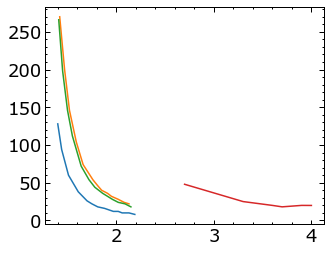

In [54]:
plt.plot(Cedeno_0_5pl_ncriticl.T[0],Cedeno_0_5pl_ncriticl.T[1]*2)
plt.plot(Cedeno_1_5pl_ncriticl.T[0],Cedeno_1_5pl_ncriticl.T[1]*2)
plt.plot(Cedeno_5_5pl_ncriticl.T[0],Cedeno_5_5pl_ncriticl.T[1]*2)
plt.plot(Jiang2019_ncriticl.T[2],Jiang2019_ncriticl.T[1])

In [55]:
S4

array([1.5       , 1.67857143, 1.85714286, 2.03571429, 2.21428571,
       2.39285714, 2.57142857, 2.75      , 2.92857143, 3.10714286,
       3.28571429, 3.46428571, 3.64285714, 3.82142857, 4.        ])

In [56]:
S4_nacl

array([1.55127089, 1.75739919, 1.968686  , 2.1853274 , 2.40752958,
       2.6355094 , 2.86949519, 3.10972744, 3.35645968, 3.60995931,
       3.87050865, 4.13840592, 4.41396638, 4.69752363, 4.98943088])

1.5512708884609652 334.04772110301474 1.9588311895774222
S of NaCl is 4.14
S of NaCl is 4.41
S of NaCl is 4.70
S of NaCl is 4.99
4.989430883622197 8.00114302043149 0.5646485066332262


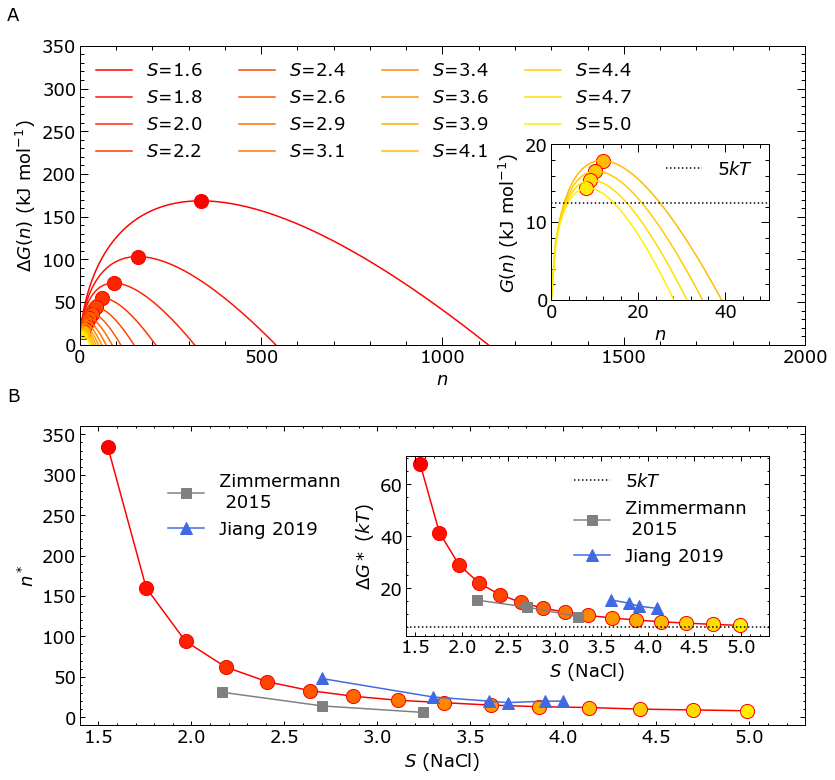

In [57]:
fig = plt.figure(figsize=(14, 20))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax0 = fig.add_subplot(gs[500:6000,500:13500]) #500:13500
ax01 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax0, [0.65,0.15,0.3,0.52]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip5)

ax3 = fig.add_subplot(gs[7500:13000,500:13500])
ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.45,0.3,0.5,0.6]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)

#ax1 = fig.add_subplot(gs[14500:20000,500:13500])
#ax2 = fig.add_subplot(gs[21500:27000,500:13500])

ax0.text(-0.1, 1.10, 'A', transform=ax0.transAxes,verticalalignment='center')
ax3.text(-0.1, 1.10, 'B', transform=ax3.transAxes,verticalalignment='center')
##################################################################################################
##################################################################################################
#color=iter(cm.plasma(np.linspace(0,1,Ntest4+1)))
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
##################################################################################################

for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
    
    ax3.scatter(S4_nacl[SIM],argmaxG[SIM],marker="o",s=200,color=c,edgecolor="red") #,facecolors="none"
    ax03.scatter(S4_nacl[SIM],DG[SIM]/kT,marker="o",s=200,color=c,edgecolor="red")

    #not good agreement
    #ax3.plot(Cedeno_0_5pl_ncriticl.T[0],Cedeno_0_5pl_ncriticl.T[1]*2,color="red")
    #ax3.plot(Cedeno_1_5pl_ncriticl.T[0],Cedeno_1_5pl_ncriticl.T[1]*2,color="blue")
    #ax3.plot(Cedeno_5_5pl_ncriticl.T[0],Cedeno_5_5pl_ncriticl.T[1]*2,color="green")
    
    #ax1.scatter(S4_nacl[SIM],Stest4_nacl[SIM]*mf_to_m3,marker="o",s=200,color=c)
    #ax2.scatter(S4_nacl[SIM],Zm[SIM],marker="o",s=200,color=c)
    
    
    if S4_nacl[SIM]>=3.9: #inset 
        print("S of NaCl is %.2f" % S4_nacl[SIM])
        ax01.plot(nn,Gm,color=c,markeredgecolor="red")
        ax01.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200,edgecolor="red")
    else:
        pass
    
    ax0.plot(nn,Gm,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM],markeredgecolor="red")
    ax0.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200,edgecolor="red")
    
    
    if S4[SIM]==1.5 or S4[SIM]==4:
        print(S4_nacl[SIM],argmaxG[SIM],np.power(v_na*argmaxG[SIM],1/3))
        #ax3.text(1.6,330,r"cube side $\approx$ %.1f nm" % (np.power(v_na*argmaxG[SIM],1/3)))
    
        
ax01.axhline(y=kT*5,label="5$kT$",color="black",ls=":")
#ax01.axhline(y=kT*8,label="8$kT$",color="black",ls="--")


ax3.plot(S4_nacl,argmaxG,color="red",zorder=0,markeredgecolor="red") 
ax3.set_xlabel(r"$S$ (NaCl)")
ax03.plot(S4_nacl,DG/kT,color="red",zorder=0,markeredgecolor="red")
ax03.set_xlabel(r"$S$ (NaCl)")

ax1.plot(S4_nacl,Stest4_nacl*mf_to_m3,color="red",zorder=0,markeredgecolor="red")
ax2.plot(S4_nacl,Zm,color="red",zorder=0,markeredgecolor="red")

ax0.set_xlabel(r'$n$')
ax0.set_ylabel(r'$\Delta G(n)$ (kJ mol$^{-1}$)')
ax0.set_xlim(0,2000)
ax0.set_xticks(np.arange(0,2500,500,dtype=int))
ax0.set_ylim(0,350)
ax0.set_yticks(np.arange(0,350.1,50,dtype=int))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.tick_params(which='major', length=8)
ax0.tick_params(which='minor', length=4)
ax0.tick_params(axis='both', which='major')
ax0.legend(loc='upper left', ncol=4, frameon=False) 

ax01.set_xlabel("$n$")
ax01.set_ylabel('$G(n)$ (kJ mol$^{-1}$)')
ax01.set_ylim(0,20)
ax01.set_yticks(np.arange(0,20.5,10))
ax01.xaxis.set_minor_locator(AutoMinorLocator(5))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.tick_params(which='major', length=8)
ax01.tick_params(which='minor', length=4)
ax01.set_xlim(0,50)

ax3.set_ylabel(r"$n^*$")
ax3.set_ylim(-10,360)
ax3.set_yticks(np.arange(0,360.1,50))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlim(1.4,5.3)
ax3.set_xticks(np.arange(1.5,5.1,0.5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))

ax03.axhline(y=5,label="5$kT$",color="black",ls=":")
ax03.set_ylabel('$\Delta G*$ ($kT$)')
ax03.set_xlim(1.4,5.3)
ax03.set_xticks(np.arange(1.5,5.1,0.5))
#ax03.set_xticks([1.5,2.5,3.5,4.5])
ax03.xaxis.set_minor_locator(AutoMinorLocator(5))

#ax1.set_ylabel(r"$\rho_{NaCL}$ (m$^{-3}$)")
#ax1.set_xlabel(r"$S$ (NaCl)")
#ax1.set_xlim(1.4,5.3)
#ax1.set_xticks(np.arange(1.5,5.1,0.5))
#ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

#ax2.set_ylabel(r"$Z^*$")
#ax2.set_xlabel(r"$S$ (NaCl)")
#ax2.set_xlim(1.4,5.3)
#ax2.set_xticks(np.arange(1.5,5.1,0.5))
#ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
###############################################################################
###############################################################################
Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
Zimmer_nc=[31,14,6]             #critical ion number 
Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
Zimmer_Z=[0.031,0.052,0.079]
ax3.plot(Zimmer_S,Zimmer_nc,label="Zimmermann \n 2015",color="grey",marker="s",markersize=10)
ax3.plot(Jiang2019_ncriticl.T[2],Jiang2019_ncriticl.T[1],label="Jiang 2019",
         color="royalblue",marker="^",markersize=12)
ax03.plot(Zimmer_S,Zimmer_Gc,label="Zimmermann \n 2015",color="grey",marker="s",markersize=10)
ax03.plot(Jiang2019_Gcriticl.T[2],Jiang2019_Gcriticl.T[1],label="Jiang 2019",
         color="royalblue",marker="^",markersize=12)
#ax1.plot(Zimmer_S,Zimmer_IonPairC,label="Zimmermann  2015",color="grey",marker="s",markersize=10)
#ax2.plot(Zimmer_S,Zimmer_Z,label="Zimmermann  2015",color="grey",marker="s",markersize=10)

ax01.legend(loc='upper right', ncol=1, frameon=False) 
ax03.legend(loc="upper right",frameon=False)
ax3.legend(bbox_to_anchor=(0.1, 0.9),ncol=1, frameon=False)
#ax1.legend(loc="upper left",ncol=1, frameon=False)
#ax2.legend(loc="upper left",ncol=1, frameon=False)

fig.savefig('nacl_2.png', dpi=200, bbox_inches='tight',transparent=False)

In [58]:
np.power(v_na*350,1/3) #nm3 cubic side in nm

1.9895286039481959

In [59]:
Zimmer_CN4=np.loadtxt("reference_values/Zimmer_CN4.txt")
Zimmer_CN5=np.loadtxt("reference_values/Zimmer_CN5.txt")
Zimmer_q0_43=np.loadtxt("reference_values/Zimmer_q0.43.txt")
print(Zimmer_CN4.T.shape)

ZCV=np.loadtxt("reference_values/ZCV.txt")
Lanaro_Patey=np.loadtxt("reference_values/Lanaro_Patey.txt")
print(ZCV.T.shape)

Cedeno_0_5pl=np.loadtxt("reference_values/Cedeno_0.5pl.txt")
Cedeno_1_5pl=np.loadtxt("reference_values/Cedeno_1.5pl.txt")
Cedeno_5_5pl=np.loadtxt("reference_values/Cedeno_5.5pl.txt")
print(Cedeno_5_5pl.T.shape)

Jiang_2019=np.loadtxt("reference_values/Jiang_2019.txt")
print(Jiang_2019.T.shape)
Jiang_2018=np.loadtxt("reference_values/Jiang_2018.txt")
print(Jiang_2018.T.shape)

Lamas_2021=np.loadtxt("reference_values/Lamas_2021.txt")
print(Lamas_2021.T.shape)

Desarnaud=np.loadtxt("reference_values/Desarnaud.txt")
print(Desarnaud.T.shape)

(3, 3)
(3,)
(3, 11)
(3, 7)
(2, 4)
(7, 3)
(2, 9)


S of NaCl is 4.14
S of NaCl is 4.41
S of NaCl is 4.70
S of NaCl is 4.99


Text(-0.1, 1.1, 'D')

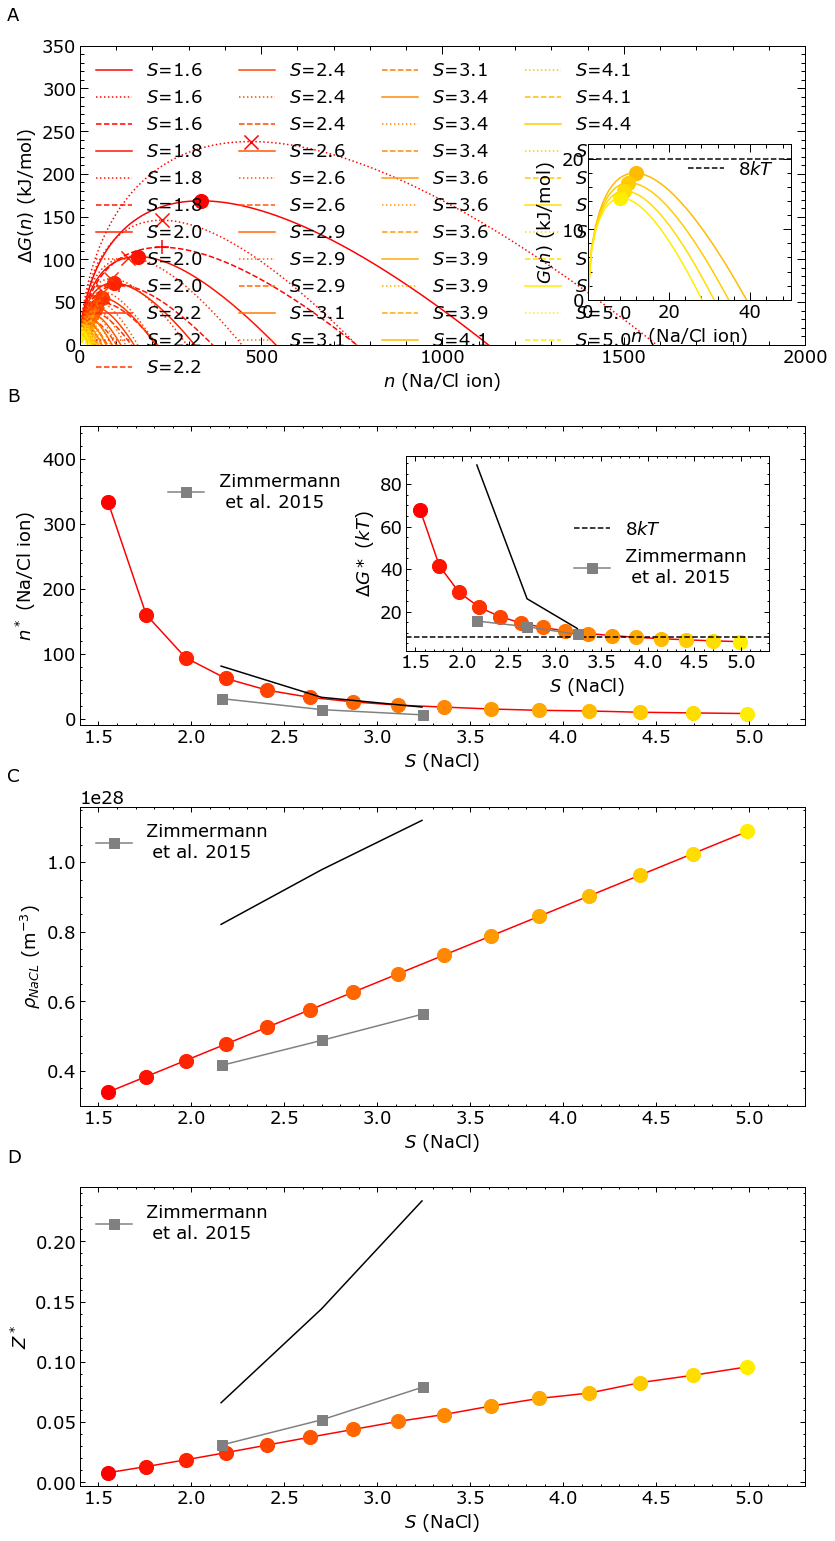

In [60]:
fig = plt.figure(figsize=(14, 40))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax0 = fig.add_subplot(gs[500:6000,500:13500])
ax01 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax0, [0.7,0.15,0.28,0.52]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip5)

ax3 = fig.add_subplot(gs[7500:13000,500:13500])
ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.45,0.25,0.50,0.65]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)

ax1 = fig.add_subplot(gs[14500:20000,500:13500])
ax2 = fig.add_subplot(gs[21500:27000,500:13500])
##################################################################################################
##################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1))) #plasma
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
    Gm_up=G_macro4(nn,kT,S4[SIM],sigma_estimate1+sigma_err1)
    DG_up[SIM]=np.max(Gm_up)
    argmaxG_up[SIM]=nn[Gm_up==np.max(Gm_up)]
    Zm_up[SIM]=Z_macro4(int(argmaxG_up[SIM]),kT,S4[SIM])
    
    
    Gm_low=G_macro4(nn,kT,S4[SIM],sigma_estimate1-sigma_err1)
    DG_low[SIM]=np.max(Gm_low)
    argmaxG_low[SIM]=nn[Gm_low==np.max(Gm_low)]
    Zm_low[SIM]=Z_macro4(int(argmaxG_low[SIM]),kT,S4[SIM])
    
    
    ax3.scatter(S4_nacl[SIM],argmaxG[SIM],marker="o",s=200,color=c) #,facecolors="none"
    ax03.scatter(S4_nacl[SIM],DG[SIM]/kT,marker="o",s=200,color=c)
    
    ax1.scatter(S4_nacl[SIM],Stest4_nacl[SIM]*mf_to_m3,marker="o",s=200,color=c)
    ax2.scatter(S4_nacl[SIM],Zm[SIM],marker="o",s=200,color=c)
    
    if S4_nacl[SIM]>=3.9: #inset 
        print("S of NaCl is %.2f" % S4_nacl[SIM])
        ax01.plot(nn,Gm,color=c)
        ax01.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
    else:
        pass
    
    ax0.plot(nn,Gm,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM])
    ax0.plot(nn,Gm_up,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM],ls=":")
    ax0.plot(nn,Gm_low,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM],ls="--")
    
    ax0.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
    ax0.scatter(argmaxG_up[SIM],DG_up[SIM],marker="x",color=c,s=200)
    ax0.scatter(argmaxG_low[SIM],DG_low[SIM],marker="+",color=c,s=200)
        
#ax01.axhline(y=kT*5,label="5$kT$",color="black",ls=":")
ax01.axhline(y=kT*8,label="8$kT$",color="black",ls="--")


ax3.plot(S4_nacl,argmaxG,color="red",zorder=0) 
ax3.set_xlabel(r"$S$ (NaCl)")
ax03.plot(S4_nacl,DG/kT,color="red",zorder=0)
ax03.set_xlabel(r"$S$ (NaCl)")

ax1.plot(S4_nacl,Stest4_nacl*mf_to_m3,color="red",zorder=0)
ax2.plot(S4_nacl,Zm,color="red",zorder=0)

ax0.set_xlabel(r'$n$ (Na/Cl ion)')
ax0.set_ylabel(r'$\Delta G(n)$ (kJ/mol)')
ax0.set_xlim(0,2000)
ax0.set_xticks(np.arange(0,2500,500,dtype=int))
ax0.set_ylim(0,350)
ax0.set_yticks(np.arange(0,350.1,50,dtype=int))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.tick_params(which='major', length=8)
ax0.tick_params(which='minor', length=4)
ax0.tick_params(axis='both', which='major')
ax0.legend(loc='upper left', ncol=4, frameon=False) 

ax01.set_xlabel("$n$ (Na/Cl ion)")
ax01.set_ylabel('$G(n)$ (kJ/mol)')
ax01.set_ylim(0,22)
ax01.set_yticks(np.arange(0,22.5,10))
ax01.xaxis.set_minor_locator(AutoMinorLocator(5))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.tick_params(which='major', length=8)
ax01.tick_params(which='minor', length=4)
ax01.set_xlim(0,50)

ax3.set_ylabel(r"$n^*$ (Na/Cl ion)")
ax3.set_ylim(-10,450)
ax3.set_yticks(np.arange(0,450.1,100))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlim(1.4,5.3)
ax3.set_xticks(np.arange(1.5,5.1,0.5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))

ax03.axhline(y=8,label="8$kT$",color="black",ls="--")
ax03.set_ylabel('$\Delta G*$ ($kT$)')
ax03.set_xlim(1.4,5.3)
ax03.set_xticks(np.arange(1.5,5.1,0.5))
ax03.xaxis.set_minor_locator(AutoMinorLocator(5))

ax1.set_ylabel(r"$\rho_{NaCL}$ (m$^{-3}$)")
ax1.set_xlabel(r"$S$ (NaCl)")
ax1.set_xlim(1.4,5.3)
ax1.set_xticks(np.arange(1.5,5.1,0.5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel(r"$Z^*$")
ax2.set_xlabel(r"$S$ (NaCl)")
ax2.set_xlim(1.4,5.3)
ax2.set_xticks(np.arange(1.5,5.1,0.5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

###############################################################################
###############################################################################
Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
Zimmer_nc=[31,14,6]             #critical ion number 
Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
Zimmer_Z=[0.031,0.052,0.079]
ax3.plot(Zimmer_S,Zimmer_nc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
ax03.plot(Zimmer_S,Zimmer_Gc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
ax1.plot(Zimmer_S,Zimmer_IonPairC,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
ax2.plot(Zimmer_S,Zimmer_Z,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)



ax3.plot(Lamas_2021.T[2],Lamas_2021.T[5],color="black")
ax03.plot(Lamas_2021.T[2],Lamas_2021.T[3],color="black")
ax1.plot(Lamas_2021.T[2],Lamas_2021.T[4],color="black")
ax2.plot(Lamas_2021.T[2],Lamas_2021.T[6],color="black")

##################################################################
##################################################################
ax01.legend(loc='upper right', ncol=1, frameon=False) 
ax03.legend(loc="center right",frameon=False)
ax3.legend(bbox_to_anchor=(0.1, 0.9),ncol=1, frameon=False)
ax1.legend(loc="upper left",ncol=1, frameon=False)
ax2.legend(loc="upper left",ncol=1, frameon=False)


ax0.text(-0.1, 1.10, 'A', transform=ax0.transAxes,verticalalignment='center')
ax3.text(-0.1, 1.10, 'B', transform=ax3.transAxes,verticalalignment='center')
ax1.text(-0.1, 1.10, 'C', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.1, 1.10, 'D', transform=ax2.transAxes,verticalalignment='center')


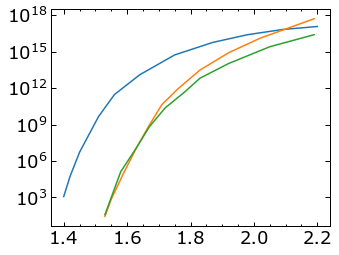

In [61]:
plt.plot(Cedeno_0_5pl.T[0],Cedeno_0_5pl.T[1])
plt.plot(Cedeno_1_5pl.T[0],Cedeno_1_5pl.T[1])
plt.plot(Cedeno_5_5pl.T[0],Cedeno_5_5pl.T[1])
plt.yscale("log")
plt.show()

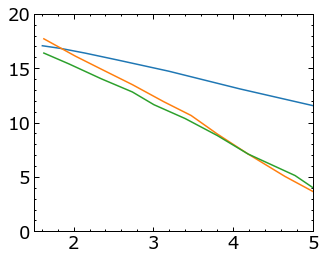

In [62]:
plt.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(Cedeno_0_5pl.T[1]))
plt.plot(1/np.power(np.log(Cedeno_1_5pl.T[0]),2),np.log10(Cedeno_1_5pl.T[1]))
plt.plot(1/np.power(np.log(Cedeno_5_5pl.T[0]),2),np.log10(Cedeno_5_5pl.T[1]))
plt.ylim(0,20)
plt.xlim(1.5,5)
plt.show()

In [63]:
S4

array([1.5       , 1.67857143, 1.85714286, 2.03571429, 2.21428571,
       2.39285714, 2.57142857, 2.75      , 2.92857143, 3.10714286,
       3.28571429, 3.46428571, 3.64285714, 3.82142857, 4.        ])

In [64]:
S4_nacl

array([1.55127089, 1.75739919, 1.968686  , 2.1853274 , 2.40752958,
       2.6355094 , 2.86949519, 3.10972744, 3.35645968, 3.60995931,
       3.87050865, 4.13840592, 4.41396638, 4.69752363, 4.98943088])

In [65]:
Stest4_nacl

array([0.10254178, 0.11616723, 0.13013366, 0.14445405, 0.15914201,
       0.17421188, 0.18967876, 0.20555854, 0.22186798, 0.23862476,
       0.25584754, 0.27355602, 0.29177106, 0.3105147 , 0.32981029])

In [66]:
Stest4

array([0.18600978, 0.2081538 , 0.23029782, 0.25244184, 0.27458587,
       0.29672989, 0.31887391, 0.34101793, 0.36316195, 0.38530597,
       0.40745   , 0.42959402, 0.45173804, 0.47388206, 0.49602608])

In [67]:
Zimmer_CN5.T[2]

array([3.24324324, 2.7027027 , 2.16216216])

In [68]:
np.log(Zimmer_CN5.T[2])

array([1.17657383, 0.99425227, 0.77110872])

In [69]:
1/np.power(np.log(Zimmer_CN5.T[2]),2)

array([0.72237321, 1.01159533, 1.6817784 ])

In [70]:
1/np.power(-np.log(Zimmer_CN5.T[2]),2)

array([0.72237321, 1.01159533, 1.6817784 ])

In [71]:
G_macro4_1=lambda S,: -(np.log(S))
Gm_1=np.zeros(Ntest4)
color=iter(cm.plasma(np.linspace(0,1,Ntest4+1)))


for SIM in np.arange(0,Ntest4):
    c=next(color)
    Gm_1[SIM]=G_macro4_1(S4_nacl[SIM])

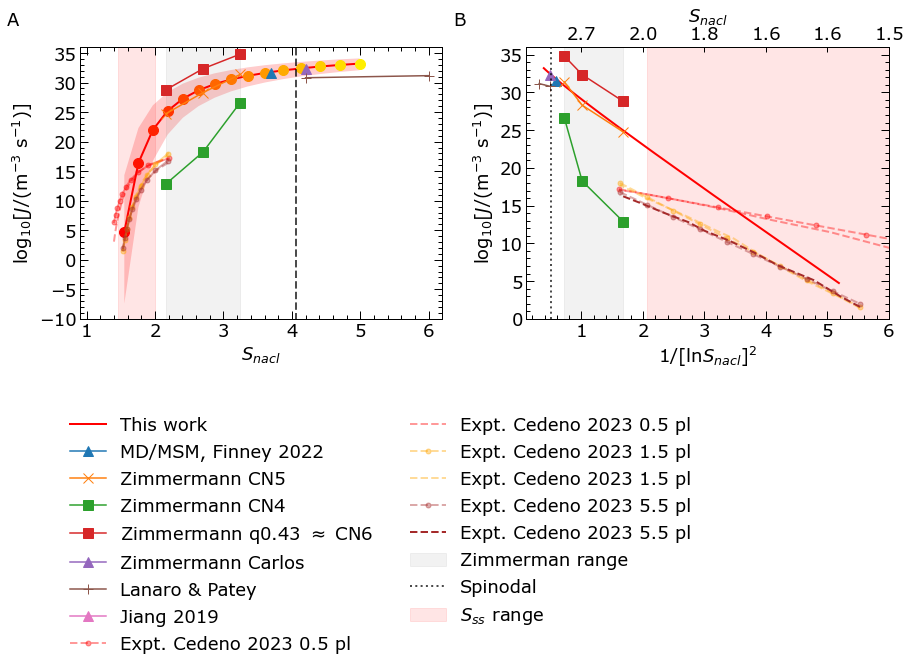

In [72]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:5500,500:7000])
ax2 = fig.add_subplot(gs[500:5500,8500:15000])
################################################################################################
#color=iter(cm.plasma(np.linspace(0,1,Ntest4+1)))
#frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)
ax1.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax1.fill_between(S4_nacl,
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.2,edgecolor="none",
                interpolate=True)
#ax1.plot(S4_nacl,np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),color="red",lw=2,#zorder=2,
#        label="This work",ls="--")
#ax1.plot(S4_nacl,np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),color="red",lw=2,#zorder=2,
#        label="This work",ls="--")
################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax1.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=10,color=c) #markerfacecolor="none"
################################################################################################
ax1.set_xlabel(r'$S_{nacl}$')
ax1.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax1.set_xlim(0.9,6.2)
ax1.set_xticks(np.arange(1,6.2,1,dtype=int))
ax1.set_ylim(-10,36)
ax1.set_yticks(np.arange(-10,36,5,dtype=int))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(axis='both', which='major')

ax1.plot(3.7,np.log10(10**31.54),marker="^",markersize=10,label='MD/MSM, Finney 2022')

ax1.plot(np.power(Zimmer_CN5.T[2],1),np.log10(10**6*Zimmer_CN5.T[1]),markersize=10,marker="x",label="Zimmermann CN5")
ax1.plot(np.power(Zimmer_CN4.T[2],1),np.log10(10**6*Zimmer_CN4.T[1]),markersize=10,marker="s",label="Zimmermann CN4")
ax1.plot(np.power(Zimmer_q0_43.T[2],1),np.log10(10**6*Zimmer_q0_43.T[1]),markersize=10,marker="s",label=r"Zimmermann q0.43 $\approx$ CN6")
ax1.plot(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),markersize=10,marker="^",label="Zimmermann Carlos")
ax1.plot(np.power(Lanaro_Patey.T[2],1),np.log10(10**6*Lanaro_Patey.T[1]),markersize=10,marker="+",label="Lanaro & Patey")
ax1.plot(np.power(Jiang_2019.T[2],1),np.log10(10**6*Jiang_2019.T[1]),markersize=10,marker="^",label="Jiang 2019")
ax1.plot(np.power(Cedeno_0_5pl.T[0],1),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
ax1.plot(np.power(Cedeno_1_5pl.T[0],1),np.log10(10**6*Cedeno_1_5pl.T[2]),'--',label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
ax1.plot(np.power(Cedeno_5_5pl.T[0],1),np.log10(10**6*Cedeno_5_5pl.T[2]),'--',label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0,alpha=0.4)

ax1.axvspan(8/3.7,12/3.7,alpha=0.1,color="grey",label="Zimmerman range")
#ax1.axvspan(1.4,2.2,alpha=0.1,color="yellow",label="Cedeno exp range")
ax1.plot([15/3.7, 15/3.7], [-30,50],ls="--",color="black",linewidth=2,alpha=0.7,label="Spinodal")

X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))

ax1.axvspan(np.min(S3_nacl),np.max(S3_nacl),alpha=0.1,color="red",label="$S_{ss}$ range")
#ax1.legend(loc="lower right",fontsize=10)
#ax1.legend(bbox_to_anchor=(0.6, -0.3),frameon=False,ncol=2)

####################################################################################
####################################################################################
ax2.plot(1/np.power(Gm_1,2),np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax2.plot(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",markersize=10,label='MD/MSM, Finney 2022')


ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
ax2.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax2.set_ylim(0,36)
ax2.set_yticks(np.arange(0,36,5,dtype=int))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.tick_params(which='major', length=8)
ax2.tick_params(which='minor', length=4)

ax2.plot(1/np.power(np.log(Zimmer_CN5.T[2]),2),np.log10(10**6*Zimmer_CN5.T[1]),markersize=10,marker="x",label="Zimmermann CN5")
ax2.plot(1/np.power(np.log(Zimmer_CN4.T[2]),2),np.log10(10**6*Zimmer_CN4.T[1]),markersize=10,marker="s",label="Zimmermann CN4")
ax2.plot(1/np.power(np.log(Zimmer_q0_43.T[2]),2),np.log10(10**6*Zimmer_q0_43.T[1]),markersize=10,marker="s",label=r"Zimmermann q0.43 $\approx$ CN6")
ax2.plot(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),markersize=10,marker="^",label="Zimmermann Carlos")
ax2.plot(1/np.power(np.log(Lanaro_Patey.T[2]),2),np.log10(10**6*Lanaro_Patey.T[1]),markersize=10,marker="+",label="Lanaro & Patey")
ax2.plot(1/np.power(np.log(Jiang_2019.T[2]),2),np.log10(10**6*Jiang_2019.T[1]),markersize=10,marker="^",label="Jiang 2019")

#the follow is not strictly staight we need to fit linear line 
Cedeno_0_5pl_x=1/np.power(np.log(Cedeno_0_5pl.T[0]),2)
Cedeno_0_5pl_y=np.log10(Cedeno_0_5pl.T[1])
Cedeno_0_5pl_a,Cedeno_0_5pl_b=np.polyfit(Cedeno_0_5pl_x[-4:-1],Cedeno_0_5pl_y[-4:-1],1)
nn=np.linspace(np.min(Cedeno_0_5pl_x), np.max(Cedeno_0_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",marker="o",markersize=5,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,
         marker="o",markersize=5,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
################################################
Cedeno_1_5pl_x=1/np.power(np.log(Cedeno_1_5pl.T[0]),2)
Cedeno_1_5pl_y=np.log10(Cedeno_1_5pl.T[1])
Cedeno_1_5pl_a,Cedeno_1_5pl_b=np.polyfit(Cedeno_1_5pl_x[:],Cedeno_1_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_1_5pl_x), np.max(Cedeno_1_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,ls="--",marker="o",markersize=5,label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,
         marker="o",markersize=5,label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
ax2.plot(1/np.power(np.log(Cedeno_1_5pl.T[0]),2),np.log10(10**6*Cedeno_1_5pl.T[2]),'--',label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
################################################
Cedeno_5_5pl_x=1/np.power(np.log(Cedeno_5_5pl.T[0]),2)
Cedeno_5_5pl_y=np.log10(Cedeno_5_5pl.T[1])
Cedeno_5_5pl_a,Cedeno_5_5pl_b=np.polyfit(Cedeno_5_5pl_x[:],Cedeno_5_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_5_5pl_x), np.max(Cedeno_5_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,ls="--",marker="o",markersize=5,label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0,alpha=0.4)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=5,label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0,alpha=0.4)
ax2.plot(1/np.power(np.log(Cedeno_5_5pl.T[0]),2),np.log10(10**6*Cedeno_5_5pl.T[2]),'--',label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0)
################################################
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(Cedeno_0_5pl.T[1]))
#ax2.plot(1/np.power(np.log(Cedeno_1_5pl.T[0]),2),np.log10(Cedeno_1_5pl.T[1]))
#ax2.plot(1/np.power(np.log(Cedeno_5_5pl.T[0]),2),np.log10(Cedeno_5_5pl.T[1]))
################################################


ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
ax2.set_xlim(0.1,6)
ax2.set_xticks(np.array([1, 2, 3, 4, 5, 6]))

def tick_function(X):
    V = np.exp(np.sqrt(1/X))  #X
    return ["%.1f" % z for z in V]
new_tick_locations = np.array([1, 2, 3, 4, 5, 6])
ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.set_xticks(new_tick_locations)
ax3.set_xticklabels(tick_function(new_tick_locations))
ax3.set_xlabel(r"$S_{nacl}$")
ax3.xaxis.minorticks_off()

#################################################################################
ax2.axvspan(1/np.power(np.log(8/3.7),2),1/np.power(np.log(12/3.7),2),alpha=0.1,color="grey",label="Zimmerman range")
#ax2.axvspan(1/np.power(np.log(1.4),2),1/np.power(np.log(2.2),2),alpha=0.1,color="yellow",label="Cedeno exp range")
ax2.axvline(1/np.power(np.log(15/3.7),2),c="black",ls=":",linewidth=2,alpha=0.7,label="Spinodal")
X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
lnS3_nacl2=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))
    lnS3_nacl2[SIM]=1/np.power(np.log(S3_nacl[SIM]),2)
ax2.axvspan(np.min(lnS3_nacl2),np.max(lnS3_nacl2),alpha=0.1,color="red",label="$S_{ss}$ range")
##################################################################################
ax1.text(-0.2, 1.10, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.10, 'B', transform=ax2.transAxes,verticalalignment='center')

ax2.legend(bbox_to_anchor=(0.5, -0.3),frameon=False,ncol=2)

#fig.savefig('rates_2.png', dpi=200, bbox_inches='tight',transparent=False)

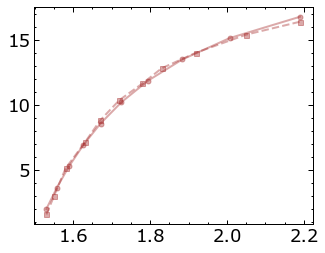

In [73]:
plt.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=5,label='Expt. Cedeno 2023 1.5 pl',c="brown",linewidth=2.0,alpha=0.4)
plt.plot(np.power(Cedeno_5_5pl.T[0],1),np.log10(Cedeno_5_5pl.T[1]),'--',marker="s",markersize=5,
         label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0,alpha=0.4)


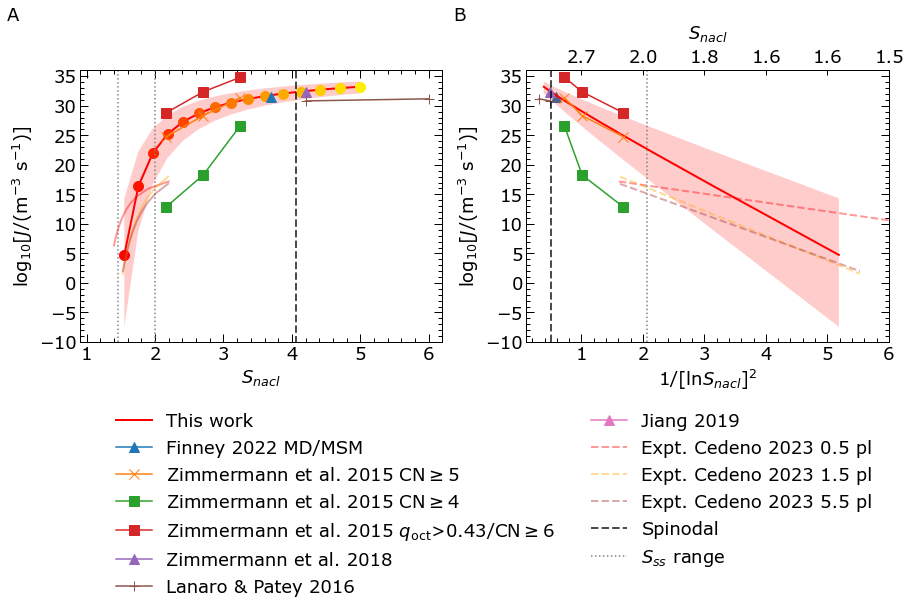

In [74]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:5500,500:7000])
ax2 = fig.add_subplot(gs[500:5500,8500:15000])
################################################################################################
#color=iter(cm.plasma(np.linspace(0,1,Ntest4+1)))
#frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)
ax1.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax1.fill_between(S4_nacl,
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.2,edgecolor="none",
                interpolate=True)
#ax1.plot(S4_nacl,np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),color="red",lw=2,#zorder=2,
#        label="This work",ls="--")
#ax1.plot(S4_nacl,np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),color="red",lw=2,#zorder=2,
#        label="This work",ls="--")
################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax1.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=10,color=c) #markerfacecolor="none"
################################################################################################
ax1.set_xlabel(r'$S_{nacl}$')
ax1.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax1.set_xlim(0.9,6.2)
ax1.set_xticks(np.arange(1,6.2,1,dtype=int))
ax1.set_ylim(-10,36)
ax1.set_yticks(np.arange(-10,36,5,dtype=int))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(axis='both', which='major')

ax1.plot(3.7,np.log10(10**31.54),marker="^",markersize=10,label='Finney 2022 MD/MSM')

ax1.plot(np.power(Zimmer_CN5.T[2],1),np.log10(10**6*Zimmer_CN5.T[1]),markersize=10,marker="x",label=r"Zimmermann et al. 2015 CN$\geq$5")
ax1.plot(np.power(Zimmer_CN4.T[2],1),np.log10(10**6*Zimmer_CN4.T[1]),markersize=10,marker="s",label=r"Zimmermann et al. 2015 CN$\geq$4")
ax1.plot(np.power(Zimmer_q0_43.T[2],1),np.log10(10**6*Zimmer_q0_43.T[1]),markersize=10,marker="s",
         label=r"Zimmermann et al. 2015 $q_\mathrm{oct}$>0.43/CN$\geq$6")
ax1.plot(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),markersize=10,marker="^",label="Zimmermann et al. 2018")
ax1.plot(np.power(Lanaro_Patey.T[2],1),np.log10(10**6*Lanaro_Patey.T[1]),markersize=10,marker="+",label="Lanaro & Patey")
ax1.plot(np.power(Jiang_2019.T[2],1),np.log10(10**6*Jiang_2019.T[1]),markersize=10,marker="^",label="Jiang 2019")
#ax1.plot(np.power(Cedeno_0_5pl.T[0],1),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
#ax1.plot(np.power(Cedeno_1_5pl.T[0],1),np.log10(10**6*Cedeno_1_5pl.T[2]),'--',label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
#ax1.plot(np.power(Cedeno_5_5pl.T[0],1),np.log10(10**6*Cedeno_5_5pl.T[2]),'--',label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0,alpha=0.4)

#ax1.axvspan(8/3.7,12/3.7,alpha=0.1,color="grey",label="Zimmerman range")
#ax1.axvspan(1.4,2.2,alpha=0.1,color="yellow",label="Cedeno exp range")
ax1.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal")

X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))

#ax1.axvspan(np.min(S3_nacl),np.max(S3_nacl),alpha=0.1,color="red",label="$S_{ss}$ range")
ax1.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax1.axvline(np.max(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")

#ax1.legend(loc="lower right",fontsize=10)
#ax1.legend(bbox_to_anchor=(0.6, -0.3),frameon=False,ncol=2)

####################################################################################
####################################################################################
ax2.plot(1/np.power(Gm_1,2),np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")

ax2.fill_between(1/np.power(Gm_1,2),
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.2,edgecolor="none",
                interpolate=True)

ax2.plot(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",markersize=10,label='Finney 2022 MD/MSM',zorder=0)


ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
ax2.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax2.set_ylim(-10,36)
ax2.set_yticks(np.arange(-10,36,5,dtype=int))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.tick_params(which='major', length=8)
ax2.tick_params(which='minor', length=4)

ax2.plot(1/np.power(np.log(Zimmer_CN5.T[2]),2),np.log10(10**6*Zimmer_CN5.T[1]),markersize=10,marker="x",label=r"Zimmermann et al. 2015 CN$\geq$5")
ax2.plot(1/np.power(np.log(Zimmer_CN4.T[2]),2),np.log10(10**6*Zimmer_CN4.T[1]),markersize=10,marker="s",label=r"Zimmermann et al. 2015 CN$\geq$4")
ax2.plot(1/np.power(np.log(Zimmer_q0_43.T[2]),2),np.log10(10**6*Zimmer_q0_43.T[1]),markersize=10,marker="s",
         label=r"Zimmermann et al. 2015 $q_\mathrm{oct}$>0.43/CN$\geq$6")
ax2.plot(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),markersize=10,marker="^",label="Zimmermann et al. 2018")
ax2.plot(1/np.power(np.log(Lanaro_Patey.T[2]),2),np.log10(10**6*Lanaro_Patey.T[1]),markersize=10,marker="+",label="Lanaro & Patey 2016")
ax2.plot(1/np.power(np.log(Jiang_2019.T[2]),2),np.log10(10**6*Jiang_2019.T[1]),markersize=10,marker="^",label="Jiang 2019")

#the follow is not strictly staight we need to fit linear line 
Cedeno_0_5pl_x=1/np.power(np.log(Cedeno_0_5pl.T[0]),2)
Cedeno_0_5pl_y=np.log10(Cedeno_0_5pl.T[1])
Cedeno_0_5pl_a,Cedeno_0_5pl_b=np.polyfit(Cedeno_0_5pl_x[-4:-1],Cedeno_0_5pl_y[-4:-1],1)
nn=np.linspace(np.min(Cedeno_0_5pl_x), np.max(Cedeno_0_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
################################################
Cedeno_1_5pl_x=1/np.power(np.log(Cedeno_1_5pl.T[0]),2)
Cedeno_1_5pl_y=np.log10(Cedeno_1_5pl.T[1])
Cedeno_1_5pl_a,Cedeno_1_5pl_b=np.polyfit(Cedeno_1_5pl_x[:],Cedeno_1_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_1_5pl_x), np.max(Cedeno_1_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
#ax2.plot(1/np.power(np.log(Cedeno_1_5pl.T[0]),2),np.log10(10**6*Cedeno_1_5pl.T[2]),'--',label='Expt. Cedeno 2023 1.5 pl',c="orange",linewidth=2.0,alpha=0.4)
################################################
Cedeno_5_5pl_x=1/np.power(np.log(Cedeno_5_5pl.T[0]),2)
Cedeno_5_5pl_y=np.log10(Cedeno_5_5pl.T[1])
Cedeno_5_5pl_a,Cedeno_5_5pl_b=np.polyfit(Cedeno_5_5pl_x[:],Cedeno_5_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_5_5pl_x), np.max(Cedeno_5_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0,alpha=0.4)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0,alpha=0.4)
#ax2.plot(1/np.power(np.log(Cedeno_5_5pl.T[0]),2),np.log10(10**6*Cedeno_5_5pl.T[2]),'--',label='Expt. Cedeno 2023 5.5 pl',c="brown",linewidth=2.0)
################################################
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(Cedeno_0_5pl.T[1]))
#ax2.plot(1/np.power(np.log(Cedeno_1_5pl.T[0]),2),np.log10(Cedeno_1_5pl.T[1]))
#ax2.plot(1/np.power(np.log(Cedeno_5_5pl.T[0]),2),np.log10(Cedeno_5_5pl.T[1]))
################################################


ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
ax2.set_xlim(0.1,6)
ax2.set_xticks(np.array([1, 2, 3, 4, 5, 6]))

def tick_function(X):
    V = np.exp(np.sqrt(1/X))  #X
    return ["%.1f" % z for z in V]
new_tick_locations = np.array([1, 2, 3, 4, 5, 6])
ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.set_xticks(new_tick_locations)
ax3.set_xticklabels(tick_function(new_tick_locations))
ax3.set_xlabel(r"$S_{nacl}$",labelpad=10)
ax3.xaxis.minorticks_off()

#################################################################################
#ax2.axvspan(1/np.power(np.log(8/3.7),2),1/np.power(np.log(12/3.7),2),alpha=0.1,color="grey",label="Zimmerman range")
#ax2.axvspan(1/np.power(np.log(1.4),2),1/np.power(np.log(2.2),2),alpha=0.1,color="yellow",label="Cedeno exp range")
ax2.axvline(1/np.power(np.log(15/3.7),2),c="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal")
X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
lnS3_nacl2=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))
    lnS3_nacl2[SIM]=1/np.power(np.log(S3_nacl[SIM]),2)
#ax2.axvspan(np.min(lnS3_nacl2),np.max(lnS3_nacl2),alpha=0.1,color="red",label="$S_{ss}$ range",edgecolor="grey",ls="--")
ax2.axvline(np.min(lnS3_nacl2),ls=":",color="grey",label="$S_{ss}$ range")
ax2.axvline(np.max(lnS3_nacl2),ls=":",color="grey")

##################################################################################
ax1.text(-0.2, 1.20, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.20, 'B', transform=ax2.transAxes,verticalalignment='center')

ax2.legend(bbox_to_anchor=(1.0, -0.2),frameon=False,ncol=2)

#fig.savefig('rates_2.png', dpi=200, bbox_inches='tight',transparent=False)

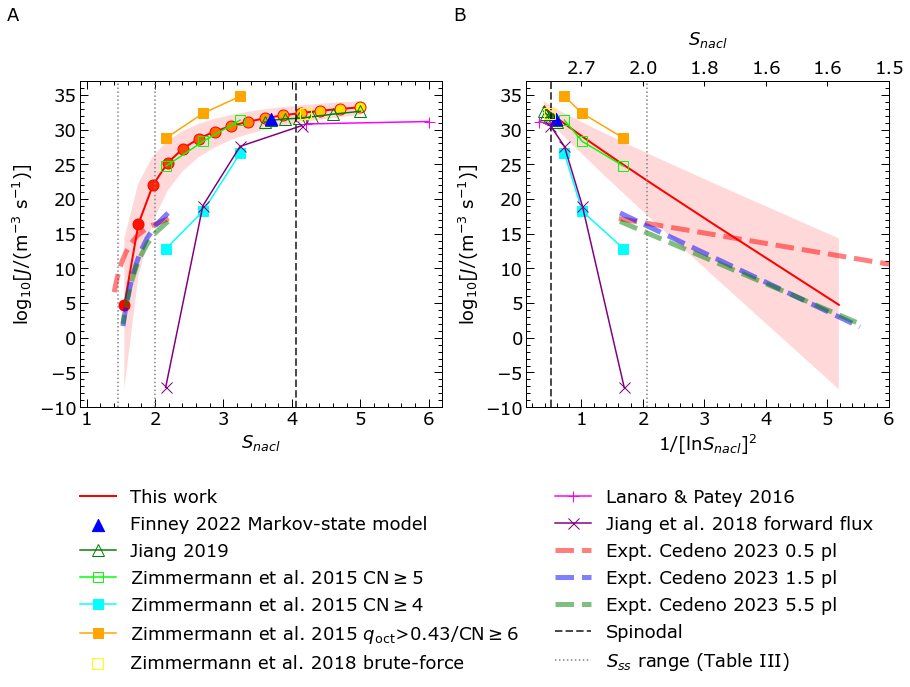

In [75]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:6500,500:7000])
ax2 = fig.add_subplot(gs[500:6500,8500:15000])
################################################################################################
ax1.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax1.fill_between(S4_nacl,
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)
################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax1.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=11,color=c,markeredgecolor="red") #color=c markerfacecolor="none"
################################################################################################
ax1.set_xlabel(r'$S_{nacl}$')
ax1.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax1.set_xlim(0.9,6.2)
ax1.set_xticks(np.arange(1,6.2,1,dtype=int))
ax1.set_ylim(-10,37)
ax1.set_yticks(np.arange(-10,37,5,dtype=int))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(axis='both', which='major')

#ax1.plot(3.7,np.log10(10**31.54),marker="^",markersize=10,color="blue",label='Finney 2022 Markov-state model')
ax1.scatter(3.7,np.log10(10**31.54),marker="^",s=150,color="blue",label='Finney 2022 Markov-state model',zorder=3)
ax1.plot(np.power(Jiang_2019.T[2],1),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="green",label="Jiang 2019",markerfacecolor='none')

ax1.plot(np.power(Zimmer_CN5.T[2],1),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann et al. 2015 CN$\geq$5",markerfacecolor='none')
ax1.plot(np.power(Zimmer_CN4.T[2],1),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="cyan",label=r"Zimmermann et al. 2015 CN$\geq$4")
ax1.plot(np.power(Zimmer_q0_43.T[2],1),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann et al. 2015 $q_\mathrm{oct}$>0.43/CN$\geq$6")
#ax1.plot(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="yellow",label="Zimmermann et al. 2018",markerfacecolor='none')
ax1.scatter(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
         s=120,marker="s",color="yellow",label="Zimmermann et al. 2018 brute-force",facecolor='none',zorder=3)

ax1.plot(np.power(Lanaro_Patey.T[2],1),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta", label="Lanaro & Patey 2016")
#Jiang_2018.T #S
ax1.plot(np.power(Jiang_2018.T[0],1),np.log10(Jiang_2018.T[1]),color="purple",marker="x",markersize=11,zorder=3)

ax1.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang et al. 2019)")

X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))

ax1.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax1.axvline(np.max(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
####################################################################################
####################################################################################
####################################################################################
ax2.plot(1/np.power(Gm_1,2),np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax2.fill_between(1/np.power(Gm_1,2),
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)

#ax2.plot(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",markersize=10,label='Finney 2022 Markov-state model')
ax2.scatter(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",s=150,label='Finney 2022 Markov-state model',zorder=3)



ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
ax2.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax2.set_ylim(-10,37)
ax2.set_yticks(np.arange(-10,37,5,dtype=int))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.tick_params(which='major', length=8)
ax2.tick_params(which='minor', length=4)

ax2.plot(1/np.power(np.log(Jiang_2019.T[2]),2),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="green",label="Jiang 2019",markerfacecolor='none')

ax2.plot(1/np.power(np.log(Zimmer_CN5.T[2]),2),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann et al. 2015 CN$\geq$5",markerfacecolor='none')
ax2.plot(1/np.power(np.log(Zimmer_CN4.T[2]),2),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="cyan",label=r"Zimmermann et al. 2015 CN$\geq$4")
ax2.plot(1/np.power(np.log(Zimmer_q0_43.T[2]),2),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann et al. 2015 $q_\mathrm{oct}$>0.43/CN$\geq$6")
#ax2.plot(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="yellow",label="Zimmermann et al. 2018",markerfacecolor='none')
ax2.scatter(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
           marker="s",s=120,color="yellow",label="Zimmermann et al. 2018 brute-force",facecolor='none',zorder=3)

ax2.plot(1/np.power(np.log(Lanaro_Patey.T[2]),2),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta",label="Lanaro & Patey 2016")

ax2.plot(1/np.power(np.log(Jiang_2018.T[0]),2),np.log10(Jiang_2018.T[1]),
         color="purple",marker="x",markersize=11,zorder=3,label="Jiang et al. 2018 forward flux")


#the follow is not strictly staight we need to fit linear line 
Cedeno_0_5pl_x=1/np.power(np.log(Cedeno_0_5pl.T[0]),2)
Cedeno_0_5pl_y=np.log10(Cedeno_0_5pl.T[1])
Cedeno_0_5pl_a,Cedeno_0_5pl_b=np.polyfit(Cedeno_0_5pl_x[-4:-1],Cedeno_0_5pl_y[-4:-1],1)
nn=np.linspace(np.min(Cedeno_0_5pl_x), np.max(Cedeno_0_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',
         c="red",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",
         marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=5.0,alpha=0.5)
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
################################################
Cedeno_1_5pl_x=1/np.power(np.log(Cedeno_1_5pl.T[0]),2)
Cedeno_1_5pl_y=np.log10(Cedeno_1_5pl.T[1])
Cedeno_1_5pl_a,Cedeno_1_5pl_b=np.polyfit(Cedeno_1_5pl_x[:],Cedeno_1_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_1_5pl_x), np.max(Cedeno_1_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',
         c="blue",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',c="blue",ls="--",linewidth=5.0,alpha=0.5)
################################################
Cedeno_5_5pl_x=1/np.power(np.log(Cedeno_5_5pl.T[0]),2)
Cedeno_5_5pl_y=np.log10(Cedeno_5_5pl.T[1])
Cedeno_5_5pl_a,Cedeno_5_5pl_b=np.polyfit(Cedeno_5_5pl_x[:],Cedeno_5_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_5_5pl_x), np.max(Cedeno_5_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',
         c="green",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',c="green",ls="--",linewidth=5.0,alpha=0.5)

ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
ax2.set_xlim(0.1,6)
ax2.set_xticks(np.array([1, 2, 3, 4, 5, 6]))

def tick_function(X):
    V = np.exp(np.sqrt(1/X))  #X
    return ["%.1f" % z for z in V]
new_tick_locations = np.array([1, 2, 3, 4, 5, 6])
ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.set_xticks(new_tick_locations)
ax3.set_xticklabels(tick_function(new_tick_locations))
ax3.set_xlabel(r"$S_{nacl}$",labelpad=15)
ax3.xaxis.minorticks_off()

#################################################################################
ax2.axvline(1/np.power(np.log(15/3.7),2),c="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal")
X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
lnS3_nacl2=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))
    lnS3_nacl2[SIM]=1/np.power(np.log(S3_nacl[SIM]),2)
ax2.axvline(np.min(lnS3_nacl2),ls=":",color="grey",label="$S_{ss}$ range (Table III)")
ax2.axvline(np.max(lnS3_nacl2),ls=":",color="grey")

##################################################################################
ax1.text(-0.2, 1.20, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.20, 'B', transform=ax2.transAxes,verticalalignment='center')

ax2.legend(bbox_to_anchor=(1.0, -0.2),frameon=False,ncol=2)

#fig.savefig('rates_2.png', dpi=200, bbox_inches='tight',transparent=False)

In [76]:
S4_nacl

array([1.55127089, 1.75739919, 1.968686  , 2.1853274 , 2.40752958,
       2.6355094 , 2.86949519, 3.10972744, 3.35645968, 3.60995931,
       3.87050865, 4.13840592, 4.41396638, 4.69752363, 4.98943088])

In [77]:
X3

array([0.23383085, 0.21965318, 0.19348837, 0.19717262, 0.19430894,
       0.18740849, 0.1911979 , 0.17614965])

In [78]:
S3_nacl

array([2.00288636, 1.86646428, 1.62032045, 1.65454759, 1.62793157,
       1.56414182, 1.59911196, 1.46109813])

1.8856334749686279
1.771303465971022
1.5603080518849757
1.590018158627849
1.5669252119705572
1.5112793384627539
1.541837485972475
1.4204869941447886


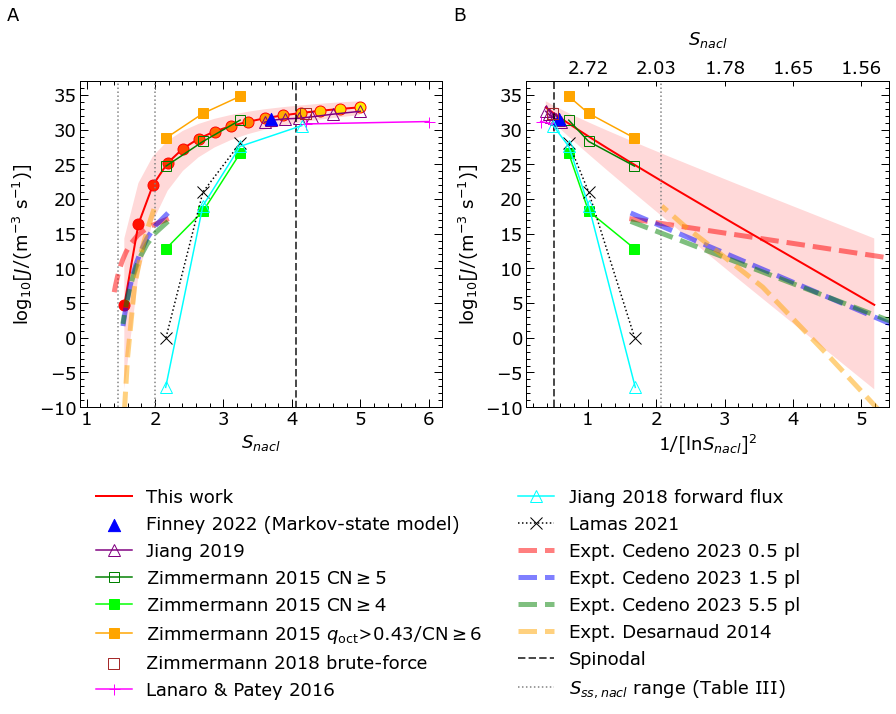

In [79]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:6500,500:7000])
ax2 = fig.add_subplot(gs[500:6500,8500:15000])
################################################################################################
ax1.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax1.fill_between(S4_nacl,
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)
################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax1.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=11,color=c,markeredgecolor="red") #color=c markerfacecolor="none"
################################################################################################
ax1.set_xlabel(r'$S_{nacl}$')
ax1.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax1.set_xlim(0.9,6.2)
ax1.set_xticks(np.arange(1,6.2,1,dtype=int))
ax1.set_ylim(-10,37)
ax1.set_yticks(np.arange(-10,37,5,dtype=int))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(axis='both', which='major')

#ax1.plot(3.7,np.log10(10**31.54),marker="^",markersize=10,color="blue",label='Finney 2022 Markov-state model')
ax1.scatter(3.7,np.log10(10**31.54),marker="^",s=150,color="blue",label='Finney 2022 (Markov-state model)',zorder=3)
ax1.plot(np.power(Jiang_2019.T[2],1),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="purple",label="Jiang 2019",markerfacecolor='none')

ax1.plot(np.power(Zimmer_CN5.T[2],1),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="green",label=r"Zimmermann 2015 CN$\geq$5",markerfacecolor='none')
ax1.plot(np.power(Zimmer_CN4.T[2],1),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann 2015 CN$\geq$4")
ax1.plot(np.power(Zimmer_q0_43.T[2],1),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann 2015 $q_\mathrm{oct}$>0.43/CN$\geq$6")
#ax1.plot(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="brown",label="Zimmermann 2018",markerfacecolor='none')
ax1.scatter(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
         s=120,marker="s",color="brown",label="Zimmermann 2018 brute-force",facecolor='none',zorder=3)

ax1.plot(np.power(Lanaro_Patey.T[2],1),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta", label="Lanaro & Patey 2016")
#Jiang_2018.T #S
ax1.plot(np.power(Jiang_2018.T[0],1),np.log10(Jiang_2018.T[1]),color="cyan",
         marker="^",markerfacecolor='none',markersize=12,zorder=3)

ax1.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")

X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    print(X3[SIM]/xstar_estimate1)
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))

ax1.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax1.axvline(np.max(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
####################################################################################
####################################################################################
####################################################################################
ax2.plot(1/np.power(Gm_1,2),np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax2.fill_between(1/np.power(Gm_1,2),
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)
#ax2.plot(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",markersize=10,label='Finney 2022 Markov-state model')
ax2.scatter(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",s=150,label='Finney 2022 (Markov-state model)',zorder=3)

ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
ax2.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]')
ax2.set_ylim(-10,37)
ax2.set_yticks(np.arange(-10,37,5,dtype=int))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.tick_params(which='major', length=8)
ax2.tick_params(which='minor', length=4)

ax2.plot(1/np.power(np.log(Jiang_2019.T[2]),2),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="purple",label="Jiang 2019",markerfacecolor='none')

ax2.plot(1/np.power(np.log(Zimmer_CN5.T[2]),2),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="green",label=r"Zimmermann 2015 CN$\geq$5",markerfacecolor='none')
ax2.plot(1/np.power(np.log(Zimmer_CN4.T[2]),2),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann 2015 CN$\geq$4")
ax2.plot(1/np.power(np.log(Zimmer_q0_43.T[2]),2),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann 2015 $q_\mathrm{oct}$>0.43/CN$\geq$6")
#ax2.plot(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="brown",label="Zimmermann 2018",markerfacecolor='none')
ax2.scatter(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
           marker="s",s=120,color="brown",label="Zimmermann 2018 brute-force",facecolor='none',zorder=3)

ax2.plot(1/np.power(np.log(Lanaro_Patey.T[2]),2),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta",label="Lanaro & Patey 2016")

ax2.plot(1/np.power(np.log(Jiang_2018.T[0]),2),np.log10(Jiang_2018.T[1]),
         color="cyan",marker="^",markersize=12,markerfacecolor='none',zorder=3,label="Jiang 2018 forward flux")
##################################################################################
##################################################################################
##################################################################################
ax1.plot(Lamas_2021.T[2],Lamas_2021.T[1],marker="x",markersize=12,
         color="black",ls=":",markerfacecolor="none")
ax2.plot(1/np.power(np.log(Lamas_2021.T[2]),2),Lamas_2021.T[1],marker="x",markersize=12,color="black",ls=":",
         markerfacecolor="none",label="Lamas 2021")
##################################################################################
##################################################################################
##################################################################################
#the follow is not strictly staight we need to fit linear line 
Cedeno_0_5pl_x=1/np.power(np.log(Cedeno_0_5pl.T[0]),2)
Cedeno_0_5pl_y=np.log10(Cedeno_0_5pl.T[1])
Cedeno_0_5pl_a,Cedeno_0_5pl_b=np.polyfit(Cedeno_0_5pl_x[-4:-1],Cedeno_0_5pl_y[-4:-1],1)
nn=np.linspace(np.min(Cedeno_0_5pl_x), np.max(Cedeno_0_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',
         c="red",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",
         marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=5.0,alpha=0.5)
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
################################################
Cedeno_1_5pl_x=1/np.power(np.log(Cedeno_1_5pl.T[0]),2)
Cedeno_1_5pl_y=np.log10(Cedeno_1_5pl.T[1])
Cedeno_1_5pl_a,Cedeno_1_5pl_b=np.polyfit(Cedeno_1_5pl_x[:],Cedeno_1_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_1_5pl_x), np.max(Cedeno_1_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',
         c="blue",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',c="blue",ls="--",linewidth=5.0,alpha=0.5)
################################################
Cedeno_5_5pl_x=1/np.power(np.log(Cedeno_5_5pl.T[0]),2)
Cedeno_5_5pl_y=np.log10(Cedeno_5_5pl.T[1])
Cedeno_5_5pl_a,Cedeno_5_5pl_b=np.polyfit(Cedeno_5_5pl_x[:],Cedeno_5_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_5_5pl_x), np.max(Cedeno_5_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',
         c="green",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',c="green",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
ax1.plot(Desarnaud.T[0],np.log10(Desarnaud.T[1]),color="orange",
         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
ax2.plot(1/np.power(np.log(Desarnaud.T[0]),2),np.log10(Desarnaud.T[1]),color="orange",
         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
ax2.set_xlabel(r"1/[ln$S_{nacl}$]$^2$")
#ax2.set_xscale("log")
ax2.set_xlim(0.1,5.4)
ax2.set_xticks(np.array([1, 2, 3, 4, 5]))

def tick_function(X):
    V = np.exp(np.sqrt(1/X))  #X
    return ["%.2f" % z for z in V]
new_tick_locations = np.array([1, 2, 3, 4, 5])
ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.set_xticks(new_tick_locations)
ax3.set_xticklabels(tick_function(new_tick_locations))
ax3.set_xlabel(r"$S_{nacl}$",labelpad=15)
ax3.xaxis.minorticks_off()
#################################################################################
ax2.axvline(1/np.power(np.log(15/3.7),2),c="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal")
X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
lnS3_nacl2=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))
    lnS3_nacl2[SIM]=1/np.power(np.log(S3_nacl[SIM]),2)
ax2.axvline(np.min(lnS3_nacl2),ls=":",color="grey",label="$S_{ss,nacl}$ range (Table III)")
ax2.axvline(np.max(lnS3_nacl2),ls=":",color="grey")
##################################################################################
ax1.text(-0.2, 1.20, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.20, 'B', transform=ax2.transAxes,verticalalignment='center')

ax2.legend(bbox_to_anchor=(0.8, -0.2),frameon=False,ncol=2,columnspacing=2)

#fig.savefig('rates_2.png', dpi=200, bbox_inches='tight',transparent=False)

1.8856334749686279
1.771303465971022
1.5603080518849757
1.590018158627849
1.5669252119705572
1.5112793384627539
1.541837485972475
1.4204869941447886


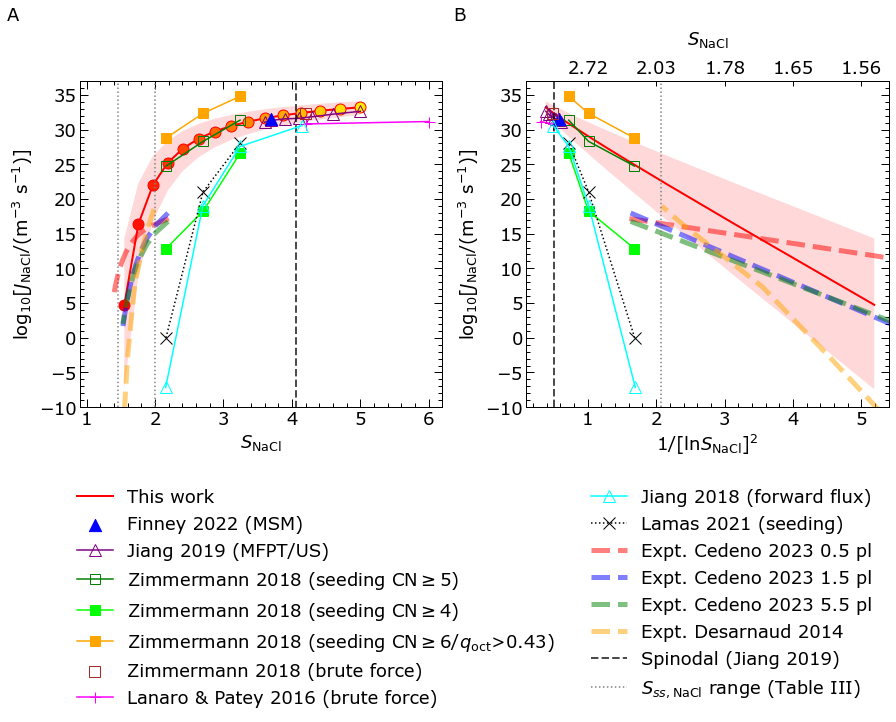

In [80]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:6500,500:7000])
ax2 = fig.add_subplot(gs[500:6500,8500:15000])
################################################################################################
ax1.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax1.fill_between(S4_nacl,
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)
################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax1.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=11,color=c,markeredgecolor="red") #color=c markerfacecolor="none"
################################################################################################
ax1.set_xlabel(r'$S_{\mathrm{NaCl}}$')
ax1.set_ylabel(r'log$_{10}$[$J_{\mathrm{NaCl}}$/(m$^{-3}$ s$^{-1}$)]')
ax1.set_xlim(0.9,6.2)
ax1.set_xticks(np.arange(1,6.2,1,dtype=int))
ax1.set_ylim(-10,37)
ax1.set_yticks(np.arange(-10,37,5,dtype=int))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(axis='both', which='major')

#ax1.plot(3.7,np.log10(10**31.54),marker="^",markersize=10,color="blue",label='Finney 2022 MSM')
ax1.scatter(3.7,np.log10(10**31.54),marker="^",s=150,color="blue",label='Finney 2022 (MSM)',zorder=3)
ax1.plot(np.power(Jiang_2019.T[2],1),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="purple",label="Jiang 2019 (MFPT/US)",markerfacecolor='none')

ax1.plot(np.power(Zimmer_CN5.T[2],1),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="green",label=r"Zimmermann 2018 (seeding CN$\geq$5)",markerfacecolor='none')
ax1.plot(np.power(Zimmer_CN4.T[2],1),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann 2018 (seeding CN$\geq$4)")
ax1.plot(np.power(Zimmer_q0_43.T[2],1),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann 2018 (seeding CN$\geq$6/$q_\mathrm{oct}$>0.43)")
#ax1.plot(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="brown",label="Zimmermann 2018",markerfacecolor='none')
ax1.scatter(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
         s=120,marker="s",color="brown",label="Zimmermann 2018 (brute force)",facecolor='none',zorder=3)

ax1.plot(np.power(Lanaro_Patey.T[2],1),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta", label="Lanaro & Patey 2016 (brute force)")
#Jiang_2018.T #S
ax1.plot(np.power(Jiang_2018.T[0],1),np.log10(Jiang_2018.T[1]),color="cyan",
         marker="^",markerfacecolor='none',markersize=12,zorder=3)

ax1.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")

X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    print(X3[SIM]/xstar_estimate1)
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))

ax1.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax1.axvline(np.max(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
####################################################################################
####################################################################################
####################################################################################
ax2.plot(1/np.power(Gm_1,2),np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax2.fill_between(1/np.power(Gm_1,2),
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)
#ax2.plot(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",markersize=10,label='Finney 2022 MSM')
ax2.scatter(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",s=150,label='Finney 2022 (MSM)',zorder=3)

ax2.set_xlabel(r"1/[ln$S_{\mathrm{NaCl}}$]$^2$")
ax2.set_ylabel(r'log$_{10}$[$J_{\mathrm{NaCl}}$/(m$^{-3}$ s$^{-1}$)]')
ax2.set_ylim(-10,37)
ax2.set_yticks(np.arange(-10,37,5,dtype=int))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
ax2.tick_params(which='major', length=8)
ax2.tick_params(which='minor', length=4)

ax2.plot(1/np.power(np.log(Jiang_2019.T[2]),2),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="purple",label="Jiang 2019 (MFPT/US)",markerfacecolor='none')

ax2.plot(1/np.power(np.log(Zimmer_CN5.T[2]),2),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="green",label=r"Zimmermann 2018 (seeding CN$\geq$5)",markerfacecolor='none')
ax2.plot(1/np.power(np.log(Zimmer_CN4.T[2]),2),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann 2018 (seeding CN$\geq$4)")
ax2.plot(1/np.power(np.log(Zimmer_q0_43.T[2]),2),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann 2018 (seeding CN$\geq$6/$q_\mathrm{oct}$>0.43)")
#ax2.plot(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="brown",label="Zimmermann 2018",markerfacecolor='none')
ax2.scatter(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
           marker="s",s=120,color="brown",label="Zimmermann 2018 (brute force)",facecolor='none',zorder=3)

ax2.plot(1/np.power(np.log(Lanaro_Patey.T[2]),2),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta",label="Lanaro & Patey 2016 (brute force)")

ax2.plot(1/np.power(np.log(Jiang_2018.T[0]),2),np.log10(Jiang_2018.T[1]),
         color="cyan",marker="^",markersize=12,markerfacecolor='none',zorder=3,label="Jiang 2018 (forward flux)")
##################################################################################
##################################################################################
##################################################################################
ax1.plot(Lamas_2021.T[2],Lamas_2021.T[1],marker="x",markersize=12,
         color="black",ls=":",markerfacecolor="none")
ax2.plot(1/np.power(np.log(Lamas_2021.T[2]),2),Lamas_2021.T[1],marker="x",markersize=12,color="black",ls=":",
         markerfacecolor="none",label="Lamas 2021 (seeding)")
##################################################################################
##################################################################################
##################################################################################
#the follow is not strictly staight we need to fit linear line 
Cedeno_0_5pl_x=1/np.power(np.log(Cedeno_0_5pl.T[0]),2)
Cedeno_0_5pl_y=np.log10(Cedeno_0_5pl.T[1])
Cedeno_0_5pl_a,Cedeno_0_5pl_b=np.polyfit(Cedeno_0_5pl_x[-4:-1],Cedeno_0_5pl_y[-4:-1],1)
nn=np.linspace(np.min(Cedeno_0_5pl_x), np.max(Cedeno_0_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',
         c="red",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",
         marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=5.0,alpha=0.5)
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
################################################
Cedeno_1_5pl_x=1/np.power(np.log(Cedeno_1_5pl.T[0]),2)
Cedeno_1_5pl_y=np.log10(Cedeno_1_5pl.T[1])
Cedeno_1_5pl_a,Cedeno_1_5pl_b=np.polyfit(Cedeno_1_5pl_x[:],Cedeno_1_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_1_5pl_x), np.max(Cedeno_1_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',
         c="blue",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',c="blue",ls="--",linewidth=5.0,alpha=0.5)
################################################
Cedeno_5_5pl_x=1/np.power(np.log(Cedeno_5_5pl.T[0]),2)
Cedeno_5_5pl_y=np.log10(Cedeno_5_5pl.T[1])
Cedeno_5_5pl_a,Cedeno_5_5pl_b=np.polyfit(Cedeno_5_5pl_x[:],Cedeno_5_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_5_5pl_x), np.max(Cedeno_5_5pl_x),num=10)
ax2.plot(nn,nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',
         c="green",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',c="green",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
ax1.plot(Desarnaud.T[0],np.log10(Desarnaud.T[1]),color="orange",
         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
ax2.plot(1/np.power(np.log(Desarnaud.T[0]),2),np.log10(Desarnaud.T[1]),color="orange",
         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
ax2.set_xlabel(r"1/[ln$S_{\mathrm{NaCl}}$]$^2$")
#ax2.set_xscale("log")
ax2.set_xlim(0.1,5.4)
ax2.set_xticks(np.array([1, 2, 3, 4, 5]))

def tick_function(X):
    V = np.exp(np.sqrt(1/X))  #X
    return ["%.2f" % z for z in V]
new_tick_locations = np.array([1, 2, 3, 4, 5])
ax3 = ax2.twiny()
ax3.set_xlim(ax2.get_xlim())
ax3.set_xticks(new_tick_locations)
ax3.set_xticklabels(tick_function(new_tick_locations))
ax3.set_xlabel(r"$S_{\mathrm{NaCl}}$",labelpad=15)
ax3.xaxis.minorticks_off()
#################################################################################
ax2.axvline(1/np.power(np.log(15/3.7),2),c="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")
X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
lnS3_nacl2=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))
    lnS3_nacl2[SIM]=1/np.power(np.log(S3_nacl[SIM]),2)
ax2.axvline(np.min(lnS3_nacl2),ls=":",color="grey",label="$S_{ss,\mathrm{NaCl}}$ range (Table III)")
ax2.axvline(np.max(lnS3_nacl2),ls=":",color="grey")
##################################################################################
ax1.text(-0.2, 1.20, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.20, 'B', transform=ax2.transAxes,verticalalignment='center')

ax2.legend(bbox_to_anchor=(1, -0.2),frameon=False,ncol=2,columnspacing=2)

fig.savefig('rates_2.png', dpi=200, bbox_inches='tight',transparent=False)

In [81]:
np.log10(0.004) #desarnard text for S_nacl ~ 1.6 

-2.3979400086720375

In [82]:
data

,Label,Simulation,Nstot,Ntot,Nss,Nss_in,f
0,1,b9-100fu-sphere-r8,616,276,88,64,523000000.0
1,2,b13.7-100fu-sphere-r6,405,228,114,88,587000000.0
2,3,b8-250fu-sphere-r9.5,1734,658,242,200,450000000.0
3,4,b9-350fu-sphere-r7,2158,776,246,206,444000000.0
4,5,b7-250fu-sphere-r11,1982,732,254,214,481000000.0
5,6,b5-100fu-sphere-r12,1110,528,272,230,487000000.0
6,7,b7-350fu-sphere-r11,2775,932,276,234,494000000.0
7,8,b7-400fu-sphere-r13,3171,1202,524,458,521000000.0


In [83]:
S3_nacl

array([2.00288636, 1.86646428, 1.62032045, 1.65454759, 1.62793157,
       1.56414182, 1.59911196, 1.46109813])

In [84]:
X3/xstar_estimate1

array([1.88563347, 1.77130347, 1.56030805, 1.59001816, 1.56692521,
       1.51127934, 1.54183749, 1.42048699])

In [85]:
xstar_estimate1/(2-xstar_estimate1)

0.06610178640280084

In [86]:
xstar_estimate1/(2-xstar_estimate1)/0.0625

1.0576285824448135

In [87]:
np.log10(Jiang_2019.T[1])

array([31.05690485, 31.33645973, 31.54406804, 31.62117628, 31.84941941,
       32.22271647, 32.63346846])

In [88]:
Cedeno_0_5pl_x

array([8.83286372, 8.13271011, 7.24325505, 5.88808987, 5.05700561,
       4.08622972, 3.19315561, 2.55232965, 2.14306548, 1.84022822,
       1.60858338])

In [89]:
np.min(lnS3_nacl2),np.max(lnS3_nacl2)

(2.072735084675559, 6.954888123039657)

In [90]:
Finney_MSM

,S,J
0,3.7,31.54


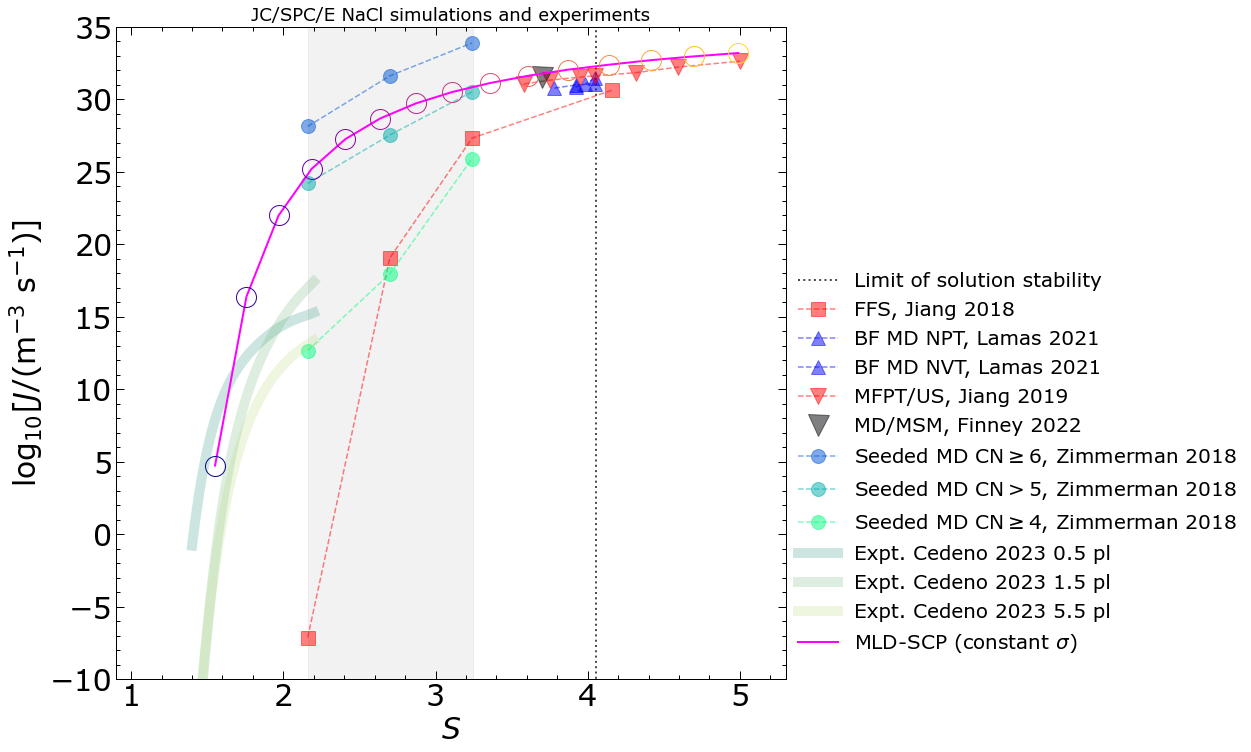

In [91]:
msp=14

fig,ax = plt.subplots(1,1,figsize=(12,12))
ax.plot([4.054, 4.054], [-30,50],"k:",linewidth=2,alpha=0.7,label="Limit of solution stability")

Jiang_FFS.plot(ax=ax, x="S", y = "J", label='FFS, Jiang 2018', legend = False, style="rs--", ms=msp, alpha=0.5) 

#Jiang_bruteforce_2018.plot(ax=ax, x="S", y = "J", label='BF MD, Jiang 2018', legend = False, style="r^--", ms=msp, alpha=0.5) 
Lamas_bruteforce_NPT.plot(ax=ax, x="S", y = "J", label='BF MD NPT, Lamas 2021', legend = False, style="b^--", ms=msp, alpha=0.5) 
Lamas_bruteforce_NVT.plot(ax=ax, x="S", y = "J", label='BF MD NVT, Lamas 2021', legend = False, style="b^--", ms=msp, alpha=0.5) 
#Lanaro_bruteforce.plot(ax=ax, x="S", y = "J", label='BF MD, Lanaro 2016', legend = False, style="C7^", ms=1.5*msp , alpha=0.5) 

Jiang_MFPT.plot(ax=ax, x="S", y = "J", label='MFPT/US, Jiang 2019', legend = False, style="rv--", ms=1.1*msp, alpha=0.5) 
color=iter(cm.magma(np.linspace(0,1,5)))
Finney_MSM.plot(ax=ax, x="S", y = "J", label='MD/MSM, Finney 2022', legend = False, style="v", ms=1.5*msp, alpha=0.5, c=next(color)) 
#Bulutoglu_MFPT.plot(ax=ax, x="S", y = "J", label='MFPT, Bulutoglu 2022', legend = False, style="v", ms=1.5*msp, alpha=0.5, c=next(color)) 
#Karmakar_wtmetad.plot(ax=ax, x="S", y = "J", label='WTmetaD, Karmakar 2019', legend = False, style="v--", ms=1.5*msp, alpha=0.5, c=next(color))

#Lamas_seeded.plot(ax=ax, x="S", y = "J", label='Seeded MD, Lamas 2021', legend = False, style="bs--", ms=msp , alpha=0.5) 

color=iter(cm.winter(np.linspace(0,1,4)))
c=next(color)
Zimmerman_seeded.plot(ax=ax, x="S", y = "J", label='Seeded MD CN$\geq$6, Zimmerman 2018', legend = False, style="o--", ms=msp , c=next(color),alpha=0.5) 
Zimmerman_CN5.plot(ax=ax, x="S", y = "J", label='Seeded MD CN$>$5, Zimmerman 2018', legend = False, style="o--", ms=msp, c=next(color), alpha=0.5)
Zimmerman_CN4.plot(ax=ax, x="S", y = "J", label='Seeded MD CN$\geq$4, Zimmerman 2018', legend = False, style="o--", ms=msp, c=next(color), alpha=0.5) 
#Zimmerman_CN1.plot(ax=ax, x="S", y = "J", label='Seeded MD CN$>$1, Zimmerman 2018', legend = False, style="o--", ms=msp, c=next(color), alpha=0.5) 

color=iter(cm.copper(np.linspace(0,1,4)))
#Gao_xpt.plot(ax=ax, x="S", y = "J", label='Expt., Gao 2007', legend = False, style="X", ms=1.5*msp , c=next(color), alpha=0.5) 
#Na_xpt.plot(ax=ax, x="S", y = "J", label='Expt., Na 1994', legend = False, style="X", ms=1.5*msp , c=next(color), alpha=0.5) 
#Desarnaud_xpt.plot(ax=ax, x="S", y = "J", label='Expt., Desarnaud 2014', legend = False, style="X", ms=1.5*msp, c=next(color), alpha=0.5) 



#https://arxiv.org/abs/2301.11088
S = np.linspace(1.4,2.2,500)
Cedeno_05 = 160.12*S**5 - 1551.3*S**4 + 6011.9*S**3 - 11662*S**2 + 11343*S - 4421.8
Cedeno_15 = 165.73*S**5 - 1671.6*S**4 + 6763.7*S**3 - 13743*S**2 + 14056*S - 5792.4
Cedeno_55 = 154.05*S**5 - 1542.7*S**4 + 6199.9*S**3 - 12519*S**2 + 12731*S - 5219.9

color=iter(cm.summer(np.linspace(0,1,4)))
ax.plot(S,Cedeno_05,'-',label='Expt. Cedeno 2023 0.5 pl',c=next(color),linewidth=10.0,alpha=0.2)
ax.plot(S,Cedeno_15,'-',label='Expt. Cedeno 2023 1.5 pl',c=next(color),linewidth=10.0,alpha=0.2)
ax.plot(S,Cedeno_55,'-',label='Expt. Cedeno 2023 5.5 pl',c=next(color),linewidth=10.0,alpha=0.2)




###########################################################################
###########################################################################
color=iter(cm.plasma(np.linspace(0,1,Ntest4+1)))

for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 3500, num=3500)
    
    #Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1) #sigma_estimate1_i 12.2
    #tpl[0]/(1+tpl[1]*(X(nX,ntot,nstot)/tpl0))
    #Gm2=G_macro4(nn,kT,S4[SIM],np.mean(sigma1_T2)/(1+np.mean(sigma2_T2)*np.log(S4[SIM])))
    #print(S4[SIM],np.mean(sigma1_T2)/(1+np.mean(sigma2_T2)*np.log(S4[SIM])))
          
    #DG[SIM]=np.max(Gm)
    #argmaxG[SIM]=nn[Gm==np.max(Gm)]
    #Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])

    #DG2[SIM]=np.max(Gm2)
    #argmaxG2[SIM]=nn[Gm2==np.max(Gm2)]
    #Zm2[SIM]=Z_macro4(int(argmaxG2[SIM]),kT,S4[SIM])
    
    #print(S4[SIM],argmaxG[SIM],argmaxG2[SIM])
    
ax.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="magenta",lw=2,#zorder=2,
        label="MLD-SCP (constant $\sigma$)")
################################################################################################
color=iter(cm.plasma(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=20,color=c,markerfacecolor="none")
################################################################################################

ax.set_xlabel(r'$S$',fontsize=30)
ax.set_ylabel(r'log$_{10}$[$J$/(m$^{-3}$ s$^{-1}$)]',fontsize=30)
ax.set_xlim(0.9,5.3)
ax.set_xticks(np.arange(1,5.1,1,dtype=int))
#ax.set_ylim(-25,35)
ax.set_ylim(-10,35)
ax.set_yticks(np.arange(-10,36,5,dtype=int))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

ax.tick_params(axis='both', which='major', labelsize=30)
ax.legend(loc='lower right', bbox_to_anchor=(1.7, 0.01),frameon=False, fontsize=20)
#ax.text(2.0,-18,"solution stability limit",fontsize=28,color="grey")
#ax.text(5.45,30,"JC/SPC/E model for simulations",fontsize=20,color="black")

ax.set_title("JC/SPC/E NaCl simulations and experiments")

#ax.axvspan(np.min(X2/xstar_estimate1_i),np.max(X2/xstar_estimate1_i),alpha=0.1,color="red")

ax.axvspan(8/3.7,12/3.7,alpha=0.1,color="grey")


#ax.plot(cedeno_0_5pl.T[0],cedeno_0_5pl.T[1],marker="o")

plt.savefig('rates_1.png', dpi=200, bbox_inches='tight',transparent=False)

In [92]:
data

,Label,Simulation,Nstot,Ntot,Nss,Nss_in,f
0,1,b9-100fu-sphere-r8,616,276,88,64,523000000.0
1,2,b13.7-100fu-sphere-r6,405,228,114,88,587000000.0
2,3,b8-250fu-sphere-r9.5,1734,658,242,200,450000000.0
3,4,b9-350fu-sphere-r7,2158,776,246,206,444000000.0
4,5,b7-250fu-sphere-r11,1982,732,254,214,481000000.0
5,6,b5-100fu-sphere-r12,1110,528,272,230,487000000.0
6,7,b7-350fu-sphere-r11,2775,932,276,234,494000000.0
7,8,b7-400fu-sphere-r13,3171,1202,524,458,521000000.0


In [93]:
v_na

0.0225

In [94]:
#input nX and nX_in as ions directly from excel anyway 
ERR_cube=lambda tpl, kT, nX, ntot, nstot: -kT*np.log(X(nX,ntot,nstot)/(tpl[0])) \
                                        +(2/3)*6*tpl[1]*np.power(v_na,2/3)*np.power(nX,-1/3)

In [95]:
xstar1_cube=np.zeros(REPS)
sigma1_cube=np.zeros(REPS)

REP=0
print('Running Booststrap fitting with', REPS, 'repetitions')
while REP < REPS:
    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR_cube,guess,args=(kT, data.Nss[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),
                              full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)

    print_progress(REP, REPS-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0: 
        #tplFitted[0]>=0.11 and tplFitted[0]<=0.14
        #tplFitted[0]>0 and tplFitted[1]>0: also works but threshold tydier
        if success > 0 :
            xstar1_cube[int(REP)]=tplFitted[0]
            sigma1_cube[int(REP)]=tplFitted[1]
            REP+=1

Running Booststrap fitting with 1000 repetitions
|**************************************************| 100%


The estimated solubility of is: 0.1235664520295448 +/- 0.007279796208861552 [-] (molar fraction of ions)
The estimated surface energy is: 22.214326328082148 +/- 3.8569478663635213 kJ/mol/nm2


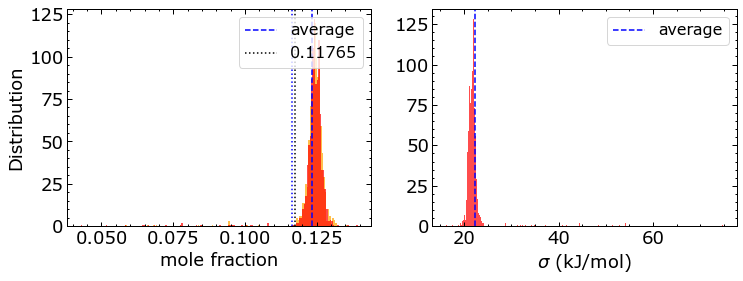

In [96]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(xstar1, bins = 'auto',alpha=0.7,color='orange',density=False)

ax[0].hist(xstar1_cube, bins = 'auto',alpha=0.7,color='red',density=False)
ax[0].set_xlabel('mole fraction')
ax[0].set_ylabel('Distribution')

xstar_estimate1_cube=np.mean(xstar1_cube) #np.mean(xstar1)/(2-np.mean(xstar1))
xstar_err1_cube=np.std(xstar1_cube) #np.std(xstar1)/(2-np.std(xstar1))

ax[0].axvline(x=xstar_estimate1_cube, color='b', linestyle='--',label='average')
ax[0].axvline(x=xstar_estimate1_cube-xstar_err1_cube, color='b', linestyle=':')
ax[0].axvline(x=2*0.0625/(1+0.0625), color='black', linestyle=':',label='%.5f' % (2*0.0625/(1+0.0625)))
ax[0].legend(loc="upper right",frameon=True, fontsize=16)

ax[1].hist(sigma1_cube, bins = 'auto',alpha=0.7,color='red',density=False)
ax[1].set_xlabel('$\\sigma$ (kJ/mol)') #('$\\sigma$ (kT/nm$^2$)')
a,b=np.histogram(sigma1, bins = 'auto')
sigma_estimate1_cube=np.mean(sigma1_cube)
sigma_err1_cube=np.std(sigma1_cube) #standard deviation 

ax[1].axvline(x=sigma_estimate1_cube, color='b', linestyle='--',label='average')
#ax[1].axvline(x=37.9, color='black', linestyle=':',label='37.9')

ax[1].legend(loc="upper right",frameon=True,fontsize=16)

#ax[0].set_xlim(0.055,0.08)
#ax[1].set_xlim(6,12)


print('\nThe estimated solubility of is:',xstar_estimate1_cube,'+/-',xstar_err1_cube,'[-] (molar fraction of ions)')
print('The estimated surface energy is:',sigma_estimate1_cube,'+/-',sigma_err1_cube,'kJ/mol/nm2') #it was kT/nm2 in the origina script
#fig.savefig('NaCl_test1.png', dpi=100, bbox_inches='tight')

In [97]:
sigma_estimate1_cube*1.67

37.097924967897185

In [98]:
sigma_err1_cube*1.67

6.441102936827081

In [99]:
print(xstar_estimate1)
print(xstar_estimate1_cube)

0.1240065202889096
0.1235664520295448


In [100]:
0.0625/(0.0625/3.7)

3.7000000000000006

In [101]:
DT_interface=np.load("/home/lunna/Desktop/Windows/LJ_rate/NaCl_2/Matteo/b7-400fu-sphere-r13/DT_interface.npy")

In [102]:
space

0.01

In [103]:
v_na

0.0225

In [104]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_DT_interface = ECDF(DT_interface)
#################################################
p=ecdf_DT_interface.y[1:-1] #P0
test=np.empty((2,len(p)),float)
for i in range(len(p)):
    test[0][i]=-np.log(1-p[i]) #-ln(1-p0)
#########################################################
m_interface, c_interface = np.polyfit(ecdf_DT_interface.x[1:-1], test[0], 1) 
#########################################################
#########################################################
time_threshold=0
x2_interface=[]
test2_interface=[]
for i in range(len(ecdf_DT_interface.x[1:-1])):
    if ecdf_DT_interface.x[i]>=time_threshold and ecdf_DT_interface.x[i]<=np.max(ecdf_DT_interface.x[1:-5]):
        x2_interface.append(ecdf_DT_interface.x[1:-1][i])
        test2_interface.append(test[0][i])
m2_DT_interface, c2_DT_interface = np.polyfit(x2_interface, test2_interface, 1) 
#########################################################
x3_interface=np.arange(0.0,np.max(ecdf_DT_interface.x[:]),0.01)
###############################################################
x_interface=np.arange(0,np.max(ecdf_DT_interface.x[1:-1]),0.001)
y1=np.exp(-x_interface*m2_DT_interface)
y2=np.exp(-x_interface*m2_DT_interface)*(1-c2_DT_interface)
###########################################################

In [105]:
xstar_estimate1

0.1240065202889096

In [106]:
DT_interface.shape

(4024,)

In [107]:
ecdf_DT_interface.x

array([-inf,  0. ,  0. , ..., 11.1, 11.5, 12.5])

In [108]:
print(ecdf_DT_interface.x.shape)
ecdf_DT_interface_x=np.zeros(len(ecdf_DT_interface.x))
print(ecdf_DT_interface_x.shape)

for i in range(len(ecdf_DT_interface_x)):
    if i==0:
        ecdf_DT_interface_x[i]=0
    else:
        ecdf_DT_interface_x[i]=ecdf_DT_interface.x[i]

(4025,)
(4025,)


In [109]:
ecdf_DT_interface.x[1:-1]

array([ 0. ,  0. ,  0. , ..., 10.4, 11.1, 11.5])

In [110]:
ecdf_DT_interface.y

array([0.00000000e+00, 2.48508946e-04, 4.97017893e-04, ...,
       9.99502982e-01, 9.99751491e-01, 1.00000000e+00])

In [111]:
ecdf_DT_interface.y[1:-1]

array([2.48508946e-04, 4.97017893e-04, 7.45526839e-04, ...,
       9.99254473e-01, 9.99502982e-01, 9.99751491e-01])

In [112]:
ecdf_DT_interface.y[1:]

array([2.48508946e-04, 4.97017893e-04, 7.45526839e-04, ...,
       9.99502982e-01, 9.99751491e-01, 1.00000000e+00])

In [113]:
print(ecdf_DT_interface.y[1:-1].shape)
print(ecdf_DT_interface.y[1:].shape)

(4023,)
(4024,)


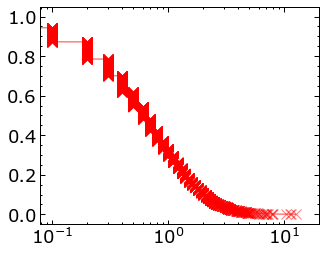

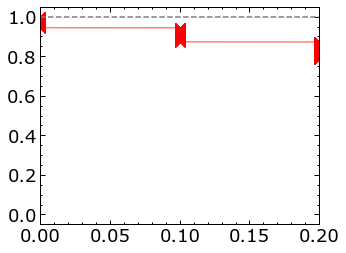

In [114]:
plt.plot(ecdf_DT_interface.x, 1-ecdf_DT_interface.y,marker="x",markersize=10,label="ECDF",color="red",alpha=0.5)
#plt.plot(ecdf_DT_interface.x[1:-1], 1-ecdf_DT_interface.y[1:-1],marker="x",markersize=10,label="ECDF",color="blue",
#         alpha=0.5)
#plt.plot(ecdf_DT_interface_x, 1-ecdf_DT_interface.y,marker="x",markersize=10,label="ECDF",color="blue",alpha=0.5)

#plt.xlim(-0.1,0.15)
#plt.ylim(0,)
plt.xscale("log")
plt.xlim(0,20)
plt.show()

plt.plot(ecdf_DT_interface.x, 1-ecdf_DT_interface.y,marker="x",markersize=10,label="ECDF",color="red",alpha=0.5)
plt.xlim(0,0.2)
plt.axhline(y=1,color="grey",ls="--")
plt.show()

In [115]:
ecdf_DT_interface_x[1:250]

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [116]:
1-ecdf_DT_interface.y[1:250]

array([0.99975149, 0.99950298, 0.99925447, 0.99900596, 0.99875746,
       0.99850895, 0.99826044, 0.99801193, 0.99776342, 0.99751491,
       0.9972664 , 0.99701789, 0.99676938, 0.99652087, 0.99627237,
       0.99602386, 0.99577535, 0.99552684, 0.99527833, 0.99502982,
       0.99478131, 0.9945328 , 0.99428429, 0.99403579, 0.99378728,
       0.99353877, 0.99329026, 0.99304175, 0.99279324, 0.99254473,
       0.99229622, 0.99204771, 0.9917992 , 0.9915507 , 0.99130219,
       0.99105368, 0.99080517, 0.99055666, 0.99030815, 0.99005964,
       0.98981113, 0.98956262, 0.98931412, 0.98906561, 0.9888171 ,
       0.98856859, 0.98832008, 0.98807157, 0.98782306, 0.98757455,
       0.98732604, 0.98707753, 0.98682903, 0.98658052, 0.98633201,
       0.9860835 , 0.98583499, 0.98558648, 0.98533797, 0.98508946,
       0.98484095, 0.98459245, 0.98434394, 0.98409543, 0.98384692,
       0.98359841, 0.9833499 , 0.98310139, 0.98285288, 0.98260437,
       0.98235586, 0.98210736, 0.98185885, 0.98161034, 0.98136

0.1240065202889096
0.1240065202889096
0.1240065202889096
0.1240065202889096
0.1240065202889096
0.1240065202889096
0.1240065202889096
0.1240065202889096


Text(0.5, 1.0, 'NaCl-8')

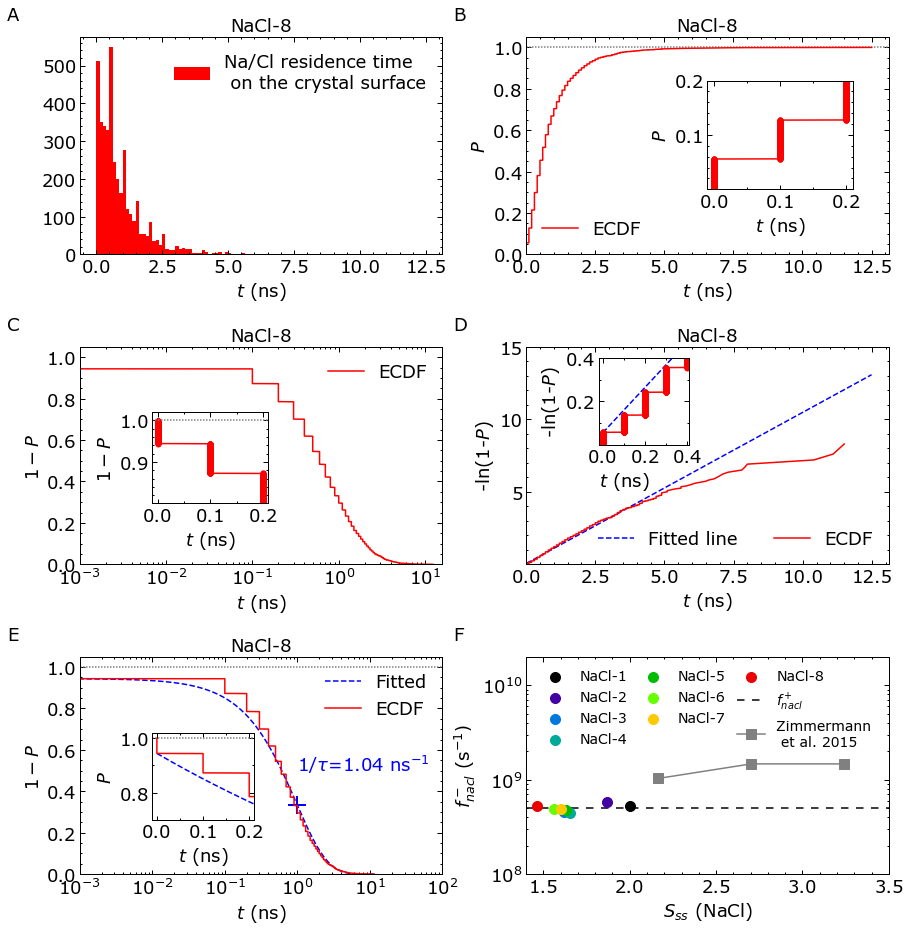

In [117]:
fig = plt.figure(figsize=(16, 20))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:4500,500:7000])
ax2 = fig.add_subplot(gs[500:4500,8500:15000])
ax3 = fig.add_subplot(gs[6200:10200,500:7000])
ax4 = fig.add_subplot(gs[6200:10200,8500:15000])
ax5 = fig.add_subplot(gs[11900:15900,500:7000])
ax6 = fig.add_subplot(gs[11900:15900,8500:15000])


ax1.hist(DT_interface,label="Na/Cl residence time \n on the crystal surface",alpha=1.0,bins=100,color="red",density=False)
ax1.set_xlabel("$t$ (ns)")
ax1.legend(frameon=False)
################################################
from statsmodels.distributions.empirical_distribution import ECDF
ecdf_DT_interface = ECDF(DT_interface)
ax2.axhline(y=1,color="grey",ls=(0,(1,1)))
ax2.plot(ecdf_DT_interface.x, ecdf_DT_interface.y,marker="+",markersize=0,label="ECDF",color="red")
ax2.set_xlabel("$t$ (ns)")
ax2.set_ylabel(r"$P$")
ax2.set_xlim(0,)
ax2.set_ylim(0,)
ax2.legend(frameon=False,loc="lower left")


ax02 = plt.axes([1,1,1,1])
ip2 = InsetPosition(ax2, [0.5,0.3,0.4,0.5]) #left edge, bottom edge, width, and height 
ax02.set_axes_locator(ip2)
ax02.plot(ecdf_DT_interface.x, ecdf_DT_interface.y,marker="o",markersize=5,label="ECDF",color="red")
ax02.set_xlabel("$t$ (ns)")
ax02.set_ylabel(r"$P$")
ax02.set_xlim(-0.01,0.21)
ax02.set_xticks(np.arange(0,0.21,0.1))
ax02.xaxis.set_minor_locator(AutoMinorLocator(2))
ax02.set_ylim(0,0.2)
ax02.set_yticks(np.arange(0.1,0.21,0.1))
ax02.yaxis.set_minor_locator(AutoMinorLocator(5))

#1-P0
ax3.plot(ecdf_DT_interface.x, 1-ecdf_DT_interface.y,marker="+",markersize=0,ls="-",label="ECDF",color="red")
ax3.set_xlabel("$t$ (ns)")
ax3.set_xscale("log")
ax3.set_ylim(0,)
ax3.set_ylabel(r"$1-P$")
ax3.set_xlim(0.001,)
ax3.legend(frameon=False,loc="upper right")

ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.2,0.28,0.32,0.42]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)
ax03.plot(ecdf_DT_interface.x, 1-ecdf_DT_interface.y,marker="o",markersize=5,label="ECDF",color="red")
ax03.axhline(y=1,color="grey",ls=(0,(1,1)))
ax03.set_xlabel("$t$ (ns)")
ax03.set_ylabel(r"$1-P$")
ax03.set_xlim(-0.01,0.21)
ax03.set_xticks(np.arange(0,0.21,0.1))
ax03.xaxis.set_minor_locator(AutoMinorLocator(2))
ax03.set_ylim(0.8,1.02)
ax03.set_yticks(np.arange(0.9,1.02,0.1))
ax03.yaxis.set_minor_locator(AutoMinorLocator(5))
############################################################################################
############################################################################################
#find out what is m2_DT_interface and c2_DT_interface
ax4.plot(x3_interface,m2_DT_interface*x3_interface+c2_DT_interface,
         marker="o",markersize=0,color="b",ls="--",label="Fitted line")
ax4.plot(ecdf_DT_interface.x[1:-1],test[0],marker="x",markersize=0,color="r",label="ECDF")
ax4.set_xlim(0,)
ax4.set_xlabel("$t$ (ns)")
ax4.set_ylabel("-ln(1-$P$)")
ax4.set_ylim(0.0,15)
ax4.set_yticks(np.arange(5,15.1,5))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))

ax04 = plt.axes([1,1,1,1])
ip4 = InsetPosition(ax4, [0.2,0.55,0.25,0.4]) #left edge, bottom edge, width, and height 
ax04.set_axes_locator(ip4)
ax04.plot(x3_interface,m2_DT_interface*x3_interface+c2_DT_interface,
         marker="o",markersize=0,color="b",ls="--",label="Fitted line",zorder=0)
ax04.plot(ecdf_DT_interface.x[1:-1],test[0],marker="o",markersize=5,color="r",label="ECDF")
ax04.set_xlim(-0.02,0.41)
ax04.set_xticks(np.arange(0,0.41,0.2))
ax04.xaxis.set_minor_locator(AutoMinorLocator(2))
ax04.set_ylim(0.0,0.4)
ax04.set_yticks(np.arange(0.2,0.41,0.2))
ax04.yaxis.set_minor_locator(AutoMinorLocator(2))
ax04.set_xlabel("$t$ (ns)",loc="left")
ax04.set_ylabel("-ln(1-$P$)")

ax4.legend(frameon=False,loc="lower right",ncol=2)
#ax4.text(6.5,13,r"slope=$1/\tau$=%.2f" % m2_DT_interface,color="blue")
############################################################################################
############################################################################################
#ax5.plot(x_interface,y1,marker="x",markersize=0,label="Fitted",ls="--",color="orange")
ax5.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=0)
ax5.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax5.axhline(y=1,color="grey",ls=(0,(1,1)))

ax5.set_xscale("log")
ax5.set_xlim(0.001,100)
ax5.set_xlabel("$t$ (ns)")
ax5.set_ylim(0,)
ax5.scatter(1,np.exp(-(1*m2_DT_interface+c2_DT_interface)),marker="+",s=300,linewidth=2,color="blue")

ax5.text(1,0.5,r"1/$\tau$=%.2f ns$^{-1}$" % (m2_DT_interface),color="blue")
#ax5.text(2,0.3,r"$f^-_{nacl}=\frac{1}{2\tau}$",color="blue")
ax5.set_ylabel("$1-P$")
ax5.legend(frameon=False,loc="upper right")


ax05 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax5, [0.2,0.25,0.28,0.4]) #left edge, bottom edge, width, and height 
ax05.set_axes_locator(ip5)
ax05.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=0)
ax05.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax05.axhline(y=1,color="grey",ls=(0,(1,1)))
ax05.set_xlabel("$t$ (ns)")
ax05.set_ylabel(r"$P$")

ax05.set_xlim(-0.01,0.21)
ax05.set_xticks(np.arange(0,0.21,0.1))
ax05.xaxis.set_minor_locator(AutoMinorLocator(2))
ax05.set_ylim(0.7,1.02)
ax05.set_yticks(np.arange(0.8,1.02,0.2))
ax05.yaxis.set_minor_locator(AutoMinorLocator(2))
############################################################################################
############################################################################################
Zimmer_f=[1.03*1e9,1.47*1e9,1.47*1e9]
X2_i=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))

for SIM in np.arange(0,Nsimulations):
    c=next(color)
    
    X2_i[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    print(xstar_estimate1)
    ax6.scatter((X2_i[SIM]/(2-X2_i[SIM]))/(xstar_estimate1/(2-xstar_estimate1)),data.f[SIM],color=c,s=100,label="NaCl-%d" % (SIM+1))
    
ax6.axhline(y=frequency,color="black",ls=(0,(5,5)),label="$f^+_{nacl}$",zorder=-2)
#ax6.axvspan(np.min(X2_i/xstar_estimate1_i),np.max(X2_i/xstar_estimate1_i),alpha=0.1,color="red")
ax6.plot(Zimmer_S,Zimmer_f,color="grey",marker="s",markersize=10,label="Zimmermann \n et al. 2015")

ax6.set_ylabel(r"$f^-_{nacl}$ (s$^{-1})$")
ax6.set_xlabel(r"$S_{ss}$ (NaCl)")
ax6.set_xlim(0.9,5.3)
ax6.set_xticks(np.arange(1,5.1,1,dtype=int))

ax6.set_yscale("log")
ax6.set_ylim(1e8,2e10)
ax6.set_xlim(1.4,3.5)
ax6.set_xticks(np.arange(1.5,3.6,0.5))
ax6.xaxis.set_minor_locator(AutoMinorLocator(5))
ax6.legend(loc="upper right",frameon=False, ncol=3,fontsize=14,columnspacing=0.8)

#################################################################################
#################################################################################
#################################################################################
ax1.text(-0.2, 1.10, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.10, 'B', transform=ax2.transAxes,verticalalignment='center')
ax3.text(-0.2, 1.10, 'C', transform=ax3.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.10, 'D', transform=ax4.transAxes,verticalalignment='center')
ax5.text(-0.2, 1.10, 'E', transform=ax5.transAxes,verticalalignment='center')
ax6.text(-0.2, 1.10, 'F', transform=ax6.transAxes,verticalalignment='center')
#################################################################################

ax1.set_title(r"NaCl-8")
ax2.set_title(r"NaCl-8")
ax3.set_title(r"NaCl-8")
ax4.set_title(r"NaCl-8")
ax5.set_title(r"NaCl-8")

#fig.savefig('nacl_4.png', dpi=200, bbox_inches='tight',transparent=False)

In [118]:
np.exp(-1)

0.36787944117144233

Text(-0.2, 1.1, 'D')

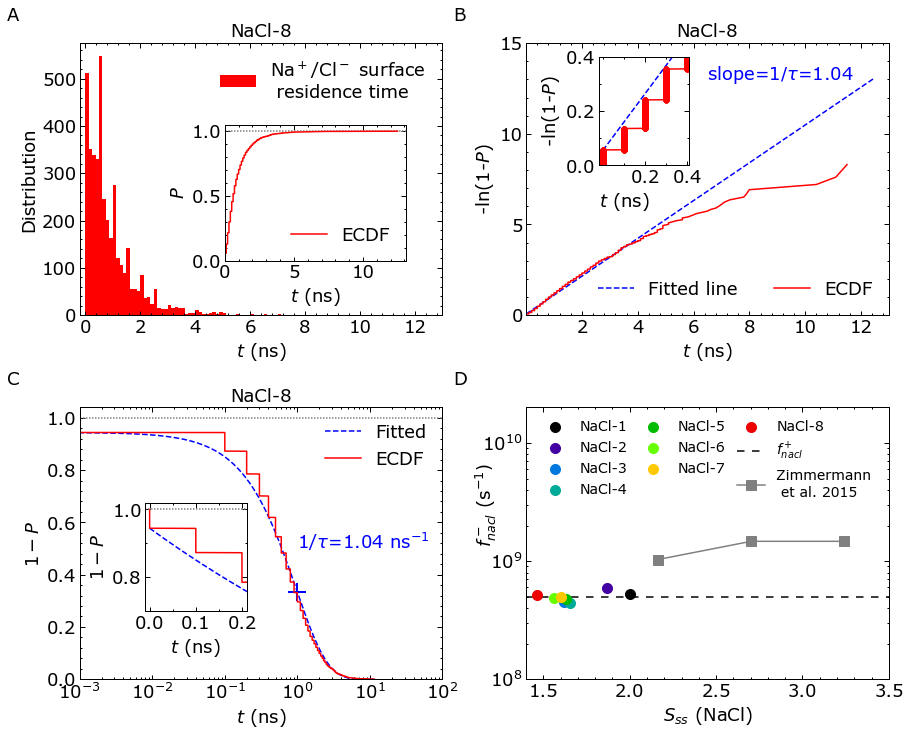

In [119]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax1 = fig.add_subplot(gs[500:5500,500:7000])
ax2 = fig.add_subplot(gs[500:5500,8500:15000])
ax3 = fig.add_subplot(gs[7200:12200,500:7000])
ax4 = fig.add_subplot(gs[7200:12200,8500:15000])

##############################################################################
##############################################################################
##############################################################################
ax1.hist(DT_interface,label="Na$^+$/Cl$^-$ surface \n residence time",
         alpha=1.0,bins=100,color="red",density=False)
ax1.set_xlabel("$t$ (ns)")
ax1.set_ylabel("Distribution")
ax1.legend(frameon=False)

ax1.set_xlim(-0.2,13)
ax1.set_xticks(np.arange(0,13,2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

ax01 = plt.axes([1,1,1,1])
ip01 = InsetPosition(ax1, [0.4,0.2,0.5,0.5]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip01)

ax01.axhline(y=1,color="grey",ls=(0,(1,1)))
ax01.plot(ecdf_DT_interface.x, ecdf_DT_interface.y,marker="+",markersize=0,label="ECDF",color="red")
ax01.set_xlabel("$t$ (ns)")
ax01.set_ylabel(r"$P$")
ax01.set_xlim(0,)
ax01.set_ylim(0,)
ax01.legend(frameon=False,loc="lower right")
##############################################################################
##############################################################################
##############################################################################
ax2.plot(x3_interface,m2_DT_interface*x3_interface+c2_DT_interface,
         marker="o",markersize=0,color="b",ls="--",label="Fitted line")
ax2.plot(ecdf_DT_interface.x[1:-1],test[0],marker="x",markersize=0,color="r",label="ECDF")
ax2.set_xlabel("$t$ (ns)")
ax2.set_xlim(0,13)
ax2.set_xticks(np.arange(2,13,2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel("-ln(1-$P$)")
ax2.set_ylim(0.0,15)
ax2.set_yticks(np.arange(0,15.1,5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))

ax02 = plt.axes([1,1,1,1])
ip2 = InsetPosition(ax2, [0.2,0.55,0.25,0.4]) #left edge, bottom edge, width, and height 
ax02.set_axes_locator(ip2)
ax02.plot(x3_interface,m2_DT_interface*x3_interface+c2_DT_interface,
         marker="o",markersize=0,color="b",ls="--",label="Fitted line",zorder=0)
ax02.plot(ecdf_DT_interface.x[1:-1],test[0],marker="o",markersize=5,color="r",label="ECDF")
ax02.set_xlim(-0.02,0.41)
ax02.set_xticks(np.arange(0.2,0.41,0.2))
ax02.xaxis.set_minor_locator(AutoMinorLocator(2))
ax02.set_ylim(0.0,0.4)
ax02.set_yticks(np.arange(0,0.41,0.2))
ax02.yaxis.set_minor_locator(AutoMinorLocator(2))
ax02.set_xlabel("$t$ (ns)",loc="left")
ax02.set_ylabel("-ln(1-$P$)")

ax2.legend(frameon=False,loc="lower right",ncol=2)
ax2.text(6.5,13,r"slope=$1/\tau$=%.2f" % m2_DT_interface,color="blue")
##############################################################################
##############################################################################
##############################################################################
ax3.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=0)
ax3.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax3.axhline(y=1,color="grey",ls=(0,(1,1)))

ax3.set_xscale("log")
ax3.set_xlim(0.001,100)
ax3.set_xlabel("$t$ (ns)")
ax3.set_ylim(0,1.04)
ax3.set_yticks(np.arange(0,1.1,0.2))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))

ax3.scatter(1,np.exp(-(1*m2_DT_interface+c2_DT_interface)),marker="+",s=300,linewidth=2,color="blue")

ax3.text(1,0.5,r"1/$\tau$=%.2f ns$^{-1}$" % (m2_DT_interface),color="blue")
ax3.set_ylabel("$1-P$")
ax3.legend(frameon=False,loc="upper right")


ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.18,0.25,0.28,0.4]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)
ax03.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=0)
ax03.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax03.axhline(y=1,color="grey",ls=(0,(1,1)))
ax03.set_xlabel("$t$ (ns)")
ax03.set_ylabel(r"$1-P$")

ax03.set_xlim(-0.01,0.21)
ax03.set_xticks(np.arange(0,0.21,0.1))
ax03.xaxis.set_minor_locator(AutoMinorLocator(2))
ax03.set_ylim(0.7,1.02)
ax03.set_yticks(np.arange(0.8,1.02,0.2))
ax03.yaxis.set_minor_locator(AutoMinorLocator(2))
##############################################################################
##############################################################################
##############################################################################
Zimmer_f=[1.03*1e9,1.47*1e9,1.47*1e9]
X2_i=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))

for SIM in np.arange(0,Nsimulations):
    c=next(color)
    
    X2_i[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    #print(xstar_estimate1)
    ax4.scatter((X2_i[SIM]/(2-X2_i[SIM]))/(xstar_estimate1/(2-xstar_estimate1)),data.f[SIM],color=c,s=100,label="NaCl-%d" % (SIM+1))
    
ax4.axhline(y=frequency,color="black",ls=(0,(5,5)),label="$f^+_{nacl}$",zorder=-2)
ax4.plot(Zimmer_S,Zimmer_f,color="grey",marker="s",markersize=10,label="Zimmermann \n et al. 2015")

#ax4.set_ylabel(r"$f^-_{nacl}$ (s$^{-1})$") #labelpad=1
#ax4.yaxis.label.set_position((1.5, 0.5))

ax4.text(1.1,1.5e9,"$f^-_{nacl}$ (s$^{-1})$",rotation=90)
ax4.set_xlabel(r"$S_{ss}$ (NaCl)")
ax4.set_xlim(0.9,5.3)
ax4.set_xticks(np.arange(1,5.1,1,dtype=int))

ax4.set_yscale("log")
ax4.set_ylim(1e8,2e10)
ax4.set_xlim(1.4,3.5)
ax4.set_xticks(np.arange(1.5,3.6,0.5))
ax4.xaxis.set_minor_locator(AutoMinorLocator(5))
ax4.legend(loc="upper right",frameon=False, ncol=3,fontsize=14,columnspacing=0.8)

#################################################################################
#################################################################################
#################################################################################
ax1.set_title(r"NaCl-8")
ax2.set_title(r"NaCl-8")
ax3.set_title(r"NaCl-8")

ax1.text(-0.2, 1.10, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.10, 'B', transform=ax2.transAxes,verticalalignment='center')
ax3.text(-0.2, 1.10, 'C', transform=ax3.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.10, 'D', transform=ax4.transAxes,verticalalignment='center')

#fig.savefig('nacl_4.png', dpi=200, bbox_inches='tight',transparent=False)

1.5512708884609652 334.04772110301474 1.9588311895774222
S of NaCl is 4.14
S of NaCl is 4.41
S of NaCl is 4.70
S of NaCl is 4.99
4.989430883622197 8.00114302043149 0.5646485066332262


Text(-0.18, 1.1, 'D')

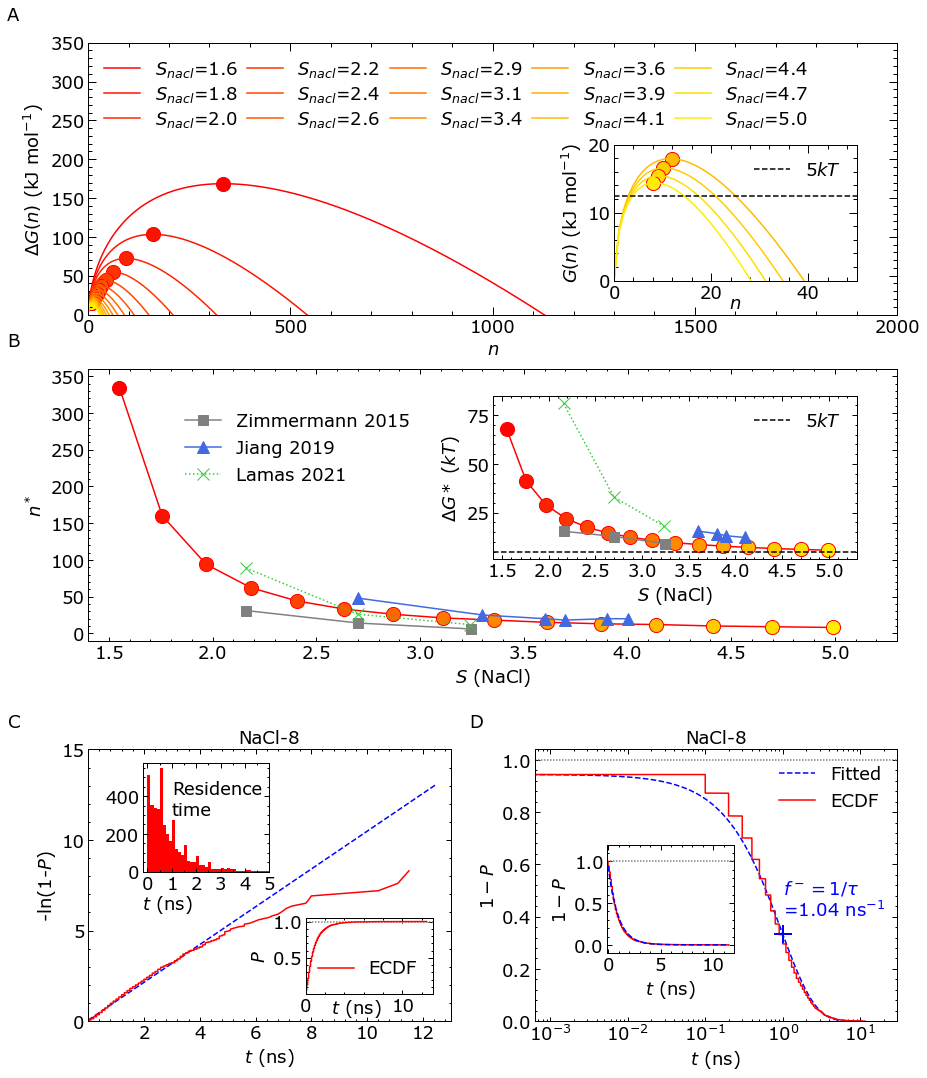

In [120]:
fig = plt.figure(figsize=(16, 20))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax2 = fig.add_subplot(gs[13500:18500,500:7000])
ax4 = fig.add_subplot(gs[13500:18500,8500:15000])
##############################################################################
##############################################################################
##############################################################################
ax0 = fig.add_subplot(gs[500:5500,500:15000]) #500:13500
ax01 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax0, [0.65,0.125,0.3,0.5]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip5)

ax3 = fig.add_subplot(gs[6500:11500,500:15000])
ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.5,0.3,0.45,0.6]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)
##############################################################################
##############################################################################
##############################################################################
ax2.plot(x3_interface,m2_DT_interface*x3_interface+c2_DT_interface,
         marker="o",markersize=0,color="b",ls="--",label="Fitted line")
ax2.plot(ecdf_DT_interface.x[1:-1],test[0],marker="x",markersize=0,color="r")
ax2.set_xlabel("$t$ (ns)")
ax2.set_xlim(0,13)
ax2.set_xticks(np.arange(2,13,2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel("-ln(1-$P$)")
ax2.set_ylim(0.0,15)
ax2.set_yticks(np.arange(0,15.1,5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))


ax02 = plt.axes([1,1,1,1])
ip2 = InsetPosition(ax2, [0.15,0.55,0.35,0.4]) #left edge, bottom edge, width, and height 
ax02.set_axes_locator(ip2)
ax02.hist(DT_interface,alpha=1.0,bins=100,color="red",density=False,label="\nresidence \n time")
ax02.set_xlabel("$t$ (ns)")
ax02.set_xlim(-0.2,5)
ax02.set_xticks(np.arange(0,6,1))
ax02.xaxis.set_minor_locator(AutoMinorLocator(2))
ax02.xaxis.set_label_coords(0.2, -0.2)
ax02.annotate(f'Residence\ntime', xy=(1, 300))

ax12 = plt.axes([1,1,1,1])
ip12 = InsetPosition(ax2, [0.6,0.1,0.35,0.28]) #left edge, bottom edge, width, and height 
ax12.set_axes_locator(ip12)
ax12.axhline(y=1,color="grey",ls=(0,(1,1))) 
ax12.plot(ecdf_DT_interface.x, ecdf_DT_interface.y,marker="+",markersize=0,label="ECDF",color="red")
ax12.set_xlabel("$t$ (ns)")
ax12.xaxis.set_label_coords(0.4, -0.05)
ax12.set_ylabel(r"$P$")
ax12.set_xlim(0,)
ax12.set_ylim(0,)
ax12.set_yticks(np.arange(0.5,1.1,0.5))
ax12.yaxis.set_minor_locator(AutoMinorLocator(5))
ax12.legend(frameon=False,loc="lower right")
##############################################################################
##############################################################################
##############################################################################
ax4.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=0)
ax4.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax4.axhline(y=1,color="grey",ls=(0,(1,1)))
ax4.scatter(1,np.exp(-(1*m2_DT_interface+c2_DT_interface)),marker="+",s=300,linewidth=2,color="blue",zorder=3)

ax4.set_xscale("log")
ax4.set_xlim(0.0,30) #100
ax4.set_xlabel("$t$ (ns)")
ax4.set_ylim(0,1.04)
ax4.set_yticks(np.arange(0,1.1,0.2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))


#ax4.text(1,0.5,r"1/$\tau$=%.2f ns$^{-1}$" % (m2_DT_interface),color="blue")
ax4.annotate(r"$f^-=1/\tau$"+f"\n"+r"=%.2f ns$^{-1}$" % (m2_DT_interface), color="blue", xy=(1, 0.4))

ax4.set_ylabel("$1-P$")
ax4.legend(frameon=False,loc="upper right")


ax04 = plt.axes([1,1,1,1])
ip4 = InsetPosition(ax4, [0.2,0.25,0.35,0.4]) #left edge, bottom edge, width, and height 
ax04.set_axes_locator(ip4)
ax04.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=3)
ax04.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax04.axhline(y=1,color="grey",ls=(0,(1,1)))
ax04.set_xlabel("$t$ (ns)")
ax04.set_ylabel(r"$1-P$")

#ax04.set_xlim(-0.01,0.21)
#ax04.set_xticks(np.arange(0,0.21,0.1))
#ax04.xaxis.set_minor_locator(AutoMinorLocator(2))
#ax04.set_ylim(0.8,1.02)
#ax04.set_yticks(np.arange(0.9,1.02,0.1))
#ax04.yaxis.set_minor_locator(AutoMinorLocator(2))
ax04.set_ylim(-0.1,1.2)
ax04.set_yticks(np.arange(0,1.2,0.5))
ax04.yaxis.set_minor_locator(AutoMinorLocator(5))

ax04.set_xlim(-0.1,12)
ax04.set_xticks(np.arange(0,12,5))
ax04.xaxis.set_minor_locator(AutoMinorLocator(5))
##############################################################################
##############################################################################
##############################################################################
##################################################################################################
##################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
##################################################################################################
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
    
    ax3.scatter(S4_nacl[SIM],argmaxG[SIM],marker="o",s=200,color=c,edgecolor="red") #,facecolors="none"
    ax03.scatter(S4_nacl[SIM],DG[SIM]/kT,marker="o",s=200,color=c,edgecolor="red")

    
    if S4_nacl[SIM]>=3.9: #inset 
        print("S of NaCl is %.2f" % S4_nacl[SIM])
        ax01.plot(nn,Gm,color=c,markeredgecolor="red")
        ax01.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200,edgecolor="red")
    else:
        pass
    
    ax0.plot(nn,Gm,color=c,label=r"$S_{nacl}$=%.1lf" % S4_nacl[SIM],markeredgecolor="red")
    ax0.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200,edgecolor="red")
    
    
    if S4[SIM]==1.5 or S4[SIM]==4:
        print(S4_nacl[SIM],argmaxG[SIM],np.power(v_na*argmaxG[SIM],1/3))
        
ax01.axhline(y=kT*5,label="5$kT$",color="black",ls="--")

ax3.plot(S4_nacl,argmaxG,color="red",zorder=0,markeredgecolor="red") 
ax3.set_xlabel(r"$S$ (NaCl)")
ax03.plot(S4_nacl,DG/kT,color="red",zorder=0,markeredgecolor="red")
ax03.set_xlabel(r"$S$ (NaCl)")

ax0.set_xlabel(r'$n$')
ax0.set_ylabel(r'$\Delta G(n)$ (kJ mol$^{-1}$)')
ax0.set_xlim(0,2000)
ax0.set_xticks(np.arange(0,2500,500,dtype=int))
ax0.set_ylim(0,350)
ax0.set_yticks(np.arange(0,350.1,50,dtype=int))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.tick_params(which='major', length=8)
ax0.tick_params(which='minor', length=4)
ax0.tick_params(axis='both', which='major')
ax0.legend(loc='upper left', ncol=5, frameon=False,columnspacing=0.5,labelspacing = 0.3) 

ax01.set_xlabel("$n$")
ax01.set_ylabel('$G(n)$ (kJ mol$^{-1}$)')
ax01.set_ylim(0,20)
ax01.set_yticks(np.arange(0,20.5,10))
ax01.xaxis.set_minor_locator(AutoMinorLocator(5))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.tick_params(which='major', length=8)
ax01.tick_params(which='minor', length=4)
ax01.set_xlim(0,50)
ax01.xaxis.set_label_coords(0.5, -0.1)

ax3.set_ylabel(r"$n^*$")
ax3.set_ylim(-10,360)
ax3.set_yticks(np.arange(0,360.1,50))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlim(1.4,5.3)
ax3.set_xticks(np.arange(1.5,5.1,0.5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))

ax03.axhline(y=5,label="5$kT$",color="black",ls="--")
ax03.set_ylabel('$\Delta G*$ ($kT$)')
ax03.set_xlim(1.4,5.3)
ax03.set_xticks(np.arange(1.5,5.1,0.5))
ax03.xaxis.set_minor_locator(AutoMinorLocator(5))
###############################################################################
###############################################################################
Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
Zimmer_nc=[31,14,6]             #critical ion number 
Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
Zimmer_Z=[0.031,0.052,0.079]
ax3.plot(Zimmer_S,Zimmer_nc,label="Zimmermann 2015",color="grey",marker="s",markersize=10)
ax3.plot(Jiang2019_ncriticl.T[2],Jiang2019_ncriticl.T[1],label="Jiang 2019",
         color="royalblue",marker="^",markersize=12)
ax03.plot(Zimmer_S,Zimmer_Gc,color="grey",marker="s",markersize=10)
ax03.plot(Jiang2019_Gcriticl.T[2],Jiang2019_Gcriticl.T[1],
         color="royalblue",marker="^",markersize=12)


ax03.plot(Lamas_2021.T[2],Lamas_2021.T[5],color="limegreen",marker="x",markersize=12,ls=":")
ax3.plot(Lamas_2021.T[2],Lamas_2021.T[3],color="limegreen",marker="x",markersize=12,ls=":",label="Lamas 2021")


ax01.legend(loc='upper right', ncol=1, frameon=False) 
ax03.legend(loc="upper right",frameon=False)
ax3.legend(bbox_to_anchor=(0.1, 0.9),ncol=1, frameon=False)

###############################################################################
###############################################################################
ax2.set_title(r"NaCl-8")
ax4.set_title(r"NaCl-8")

ax0.text(-0.1, 1.10, 'A', transform=ax0.transAxes,verticalalignment='center')
ax3.text(-0.1, 1.10, 'B', transform=ax3.transAxes,verticalalignment='center')
ax2.text(-0.22, 1.10, 'C', transform=ax2.transAxes,verticalalignment='center')
ax4.text(-0.18, 1.10, 'D', transform=ax4.transAxes,verticalalignment='center')

#fig.savefig('nacl_5.png', dpi=200, bbox_inches='tight',transparent=False)

In [121]:
Na1994_ncritical=np.loadtxt("reference_values/Na1994_ncritical.txt")
print(Na1994_ncritical.T.shape)


(3, 14)


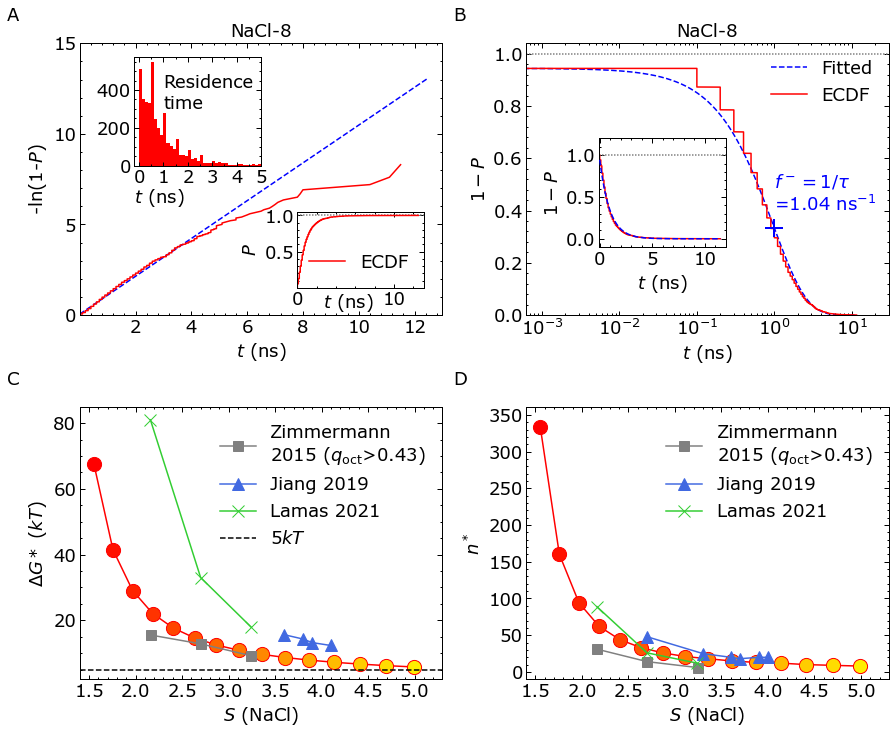

In [122]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax2 = fig.add_subplot(gs[500:5500,500:7000])
ax4 = fig.add_subplot(gs[500:5500,8500:15000])

ax03 = fig.add_subplot(gs[7200:12200,500:7000])
ax3 = fig.add_subplot(gs[7200:12200,8500:15000])
##############################################################################
##############################################################################
##############################################################################
ax2.plot(x3_interface,m2_DT_interface*x3_interface+c2_DT_interface,
         marker="o",markersize=0,color="b",ls="--",label="Fitted line")
ax2.plot(ecdf_DT_interface.x[1:-1],test[0],marker="x",markersize=0,color="r")
ax2.set_xlabel("$t$ (ns)")
ax2.set_xlim(0,13)
ax2.set_xticks(np.arange(2,13,2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel("-ln(1-$P$)")
ax2.set_ylim(0.0,15)
ax2.set_yticks(np.arange(0,15.1,5))
ax2.yaxis.set_minor_locator(AutoMinorLocator(5))


ax02 = plt.axes([1,1,1,1])
ip2 = InsetPosition(ax2, [0.15,0.55,0.35,0.4]) #left edge, bottom edge, width, and height 
ax02.set_axes_locator(ip2)
ax02.hist(DT_interface,alpha=1.0,bins=100,color="red",density=False,label="\nresidence \n time")
ax02.set_xlabel("$t$ (ns)")
ax02.set_xlim(-0.2,5)
ax02.set_xticks(np.arange(0,6,1))
ax02.xaxis.set_minor_locator(AutoMinorLocator(2))
ax02.xaxis.set_label_coords(0.2, -0.2)
ax02.annotate(f'Residence\ntime', xy=(1, 300))

ax12 = plt.axes([1,1,1,1])
ip12 = InsetPosition(ax2, [0.6,0.1,0.35,0.28]) #left edge, bottom edge, width, and height 
ax12.set_axes_locator(ip12)
ax12.axhline(y=1,color="grey",ls=(0,(1,1))) 
ax12.plot(ecdf_DT_interface.x, ecdf_DT_interface.y,marker="+",markersize=0,label="ECDF",color="red")
ax12.set_xlabel("$t$ (ns)")
ax12.xaxis.set_label_coords(0.4, -0.05)
ax12.set_ylabel(r"$P$")
ax12.set_xlim(0,)
ax12.set_ylim(0,)
ax12.set_yticks(np.arange(0.5,1.1,0.5))
ax12.yaxis.set_minor_locator(AutoMinorLocator(5))
ax12.legend(frameon=False,loc="lower right")
##############################################################################
##############################################################################
##############################################################################
ax4.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=0)
ax4.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax4.axhline(y=1,color="grey",ls=(0,(1,1)))
ax4.scatter(1,np.exp(-(1*m2_DT_interface+c2_DT_interface)),marker="+",s=300,linewidth=2,color="blue",zorder=3)

ax4.set_xscale("log")
ax4.set_xlim(0.0,30) #100
ax4.set_xlabel("$t$ (ns)")
ax4.set_ylim(0,1.04)
ax4.set_yticks(np.arange(0,1.1,0.2))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))


#ax4.text(1,0.5,r"1/$\tau$=%.2f ns$^{-1}$" % (m2_DT_interface),color="blue")
ax4.annotate(r"$f^-=1/\tau$"+f"\n"+r"=%.2f ns$^{-1}$" % (m2_DT_interface), color="blue", xy=(1, 0.4))

ax4.set_ylabel("$1-P$")
ax4.legend(frameon=False,loc="upper right")


ax04 = plt.axes([1,1,1,1])
ip4 = InsetPosition(ax4, [0.2,0.25,0.35,0.4]) #left edge, bottom edge, width, and height 
ax04.set_axes_locator(ip4)
ax04.plot(x_interface,y2,marker="x",markersize=0,label="Fitted",ls="--",color="blue",zorder=3)
ax04.plot(ecdf_DT_interface.x[:-1], 1-ecdf_DT_interface.y[:-1],marker="+",markersize=0,label="ECDF",color="r")
ax04.axhline(y=1,color="grey",ls=(0,(1,1)))
ax04.set_xlabel("$t$ (ns)")
ax04.set_ylabel(r"$1-P$")

#ax04.set_xlim(-0.01,0.21)
#ax04.set_xticks(np.arange(0,0.21,0.1))
#ax04.xaxis.set_minor_locator(AutoMinorLocator(2))
#ax04.set_ylim(0.8,1.02)
#ax04.set_yticks(np.arange(0.9,1.02,0.1))
#ax04.yaxis.set_minor_locator(AutoMinorLocator(2))
ax04.set_ylim(-0.1,1.2)
ax04.set_yticks(np.arange(0,1.2,0.5))
ax04.yaxis.set_minor_locator(AutoMinorLocator(5))

ax04.set_xlim(-0.1,12)
ax04.set_xticks(np.arange(0,12,5))
ax04.xaxis.set_minor_locator(AutoMinorLocator(5))
##################################################################################################
##################################################################################################
##################################################################################################
##################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
        
    ax3.scatter(S4_nacl[SIM],argmaxG[SIM],marker="o",s=200,color=c,edgecolor="red") #,facecolors="none"
    ax03.scatter(S4_nacl[SIM],DG[SIM]/kT,marker="o",s=200,color=c,edgecolor="red")


ax3.plot(S4_nacl,argmaxG,color="red",zorder=0,markeredgecolor="red") 
ax3.set_xlabel(r"$S$ (NaCl)")
ax03.plot(S4_nacl,DG/kT,color="red",zorder=0,markeredgecolor="red")
ax03.set_xlabel(r"$S$ (NaCl)")

ax3.set_ylabel(r"$n^*$")
ax3.set_ylim(-10,360)
ax3.set_yticks(np.arange(0,360.1,50))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlim(1.4,5.3)
ax3.set_xticks(np.arange(1.5,5.1,0.5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))

ax03.set_ylabel('$\Delta G*$ ($kT$)')
ax03.set_xlim(1.4,5.3)
ax03.set_xticks(np.arange(1.5,5.1,0.5))
ax03.xaxis.set_minor_locator(AutoMinorLocator(5))
###############################################################################
###############################################################################
Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
Zimmer_nc=[31,14,6]             #critical ion number 
Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
Zimmer_Z=[0.031,0.052,0.079]
ax3.plot(Zimmer_S,Zimmer_nc,label="Zimmermann\n2015 ($q_\mathrm{oct}$>0.43)",color="grey",marker="s",markersize=10)
ax3.plot(Jiang2019_ncriticl.T[2],Jiang2019_ncriticl.T[1],label="Jiang 2019",
         color="royalblue",marker="^",markersize=12)
ax03.plot(Zimmer_S,Zimmer_Gc,color="grey",marker="s",markersize=10,label="Zimmermann\n2015 ($q_\mathrm{oct}$>0.43)")
ax03.plot(Jiang2019_Gcriticl.T[2],Jiang2019_Gcriticl.T[1],
         color="royalblue",marker="^",markersize=12,label="Jiang 2019")

ax03.plot(Lamas_2021.T[2],Lamas_2021.T[5],color="limegreen",marker="x",markersize=12,ls="-",label="Lamas 2021")
ax3.plot(Lamas_2021.T[2],Lamas_2021.T[3],color="limegreen",marker="x",markersize=12,ls="-",label="Lamas 2021",zorder=3)

#ax3.plot(Na1994_ncritical.T[2],Na1994_ncritical.T[1],marker="+",
#         color="magenta",markersize=12,label="Na 1994 (Expt.)") #too low

ax03.axhline(y=5,label="5$kT$",color="black",ls="--")

ax3.legend(loc="upper right",frameon=False)
ax03.legend(loc="upper right",frameon=False)
##############################################################################
##############################################################################
###############################################################################
###############################################################################
ax2.set_title(r"NaCl-8")
ax4.set_title(r"NaCl-8")

ax03.text(-0.2, 1.10, 'C', transform=ax03.transAxes,verticalalignment='center')
ax3.text(-0.2, 1.10, 'D', transform=ax3.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.10, 'A', transform=ax2.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.10, 'B', transform=ax4.transAxes,verticalalignment='center')
##############################################################################
fig.savefig('nacl_5.png', dpi=200, bbox_inches='tight',transparent=False)

<span style="color: blue;"> <font size="4"> Experimental data seems to have a lower estimate of n* at low S

    Na1994_ncritical.T
    Cedeno_5_5pl_ncriticl.T
    Cedeno_1_5pl_ncriticl.T
    Cedeno_0_5pl_ncriticl.T

Text(0, 0.5, '$n^*$')

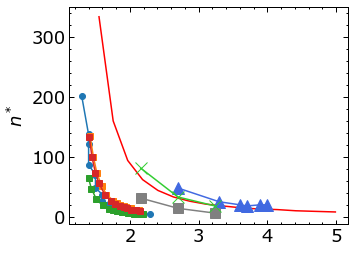

In [123]:
plt.plot(Na1994_ncritical.T[2],Na1994_ncritical.T[1],marker="o")
plt.plot(Cedeno_1_5pl_ncriticl.T[0],Cedeno_1_5pl_ncriticl.T[1],marker="s")
plt.plot(Cedeno_0_5pl_ncriticl.T[0],Cedeno_0_5pl_ncriticl.T[1],marker="s")
plt.plot(Cedeno_5_5pl_ncriticl.T[0],Cedeno_5_5pl_ncriticl.T[1],marker="s")


plt.plot(Jiang2019_ncriticl.T[2],Jiang2019_ncriticl.T[1],label="Jiang 2019",
         color="royalblue",marker="^",markersize=12)

plt.plot(Zimmer_S,Zimmer_nc,label="Zimmermann\n2015 ($q_\mathrm{oct}$>0.43)",color="grey",marker="s",markersize=10)

plt.plot(Lamas_2021.T[2],Lamas_2021.T[5],color="limegreen",marker="x",markersize=12,ls="-",label="Lamas 2021")

plt.plot(S4_nacl,argmaxG,color="red",zorder=0,markeredgecolor="red") 

plt.ylabel("$n^*$")

S of NaCl is 4.14
S of NaCl is 4.41
S of NaCl is 4.70
S of NaCl is 4.99


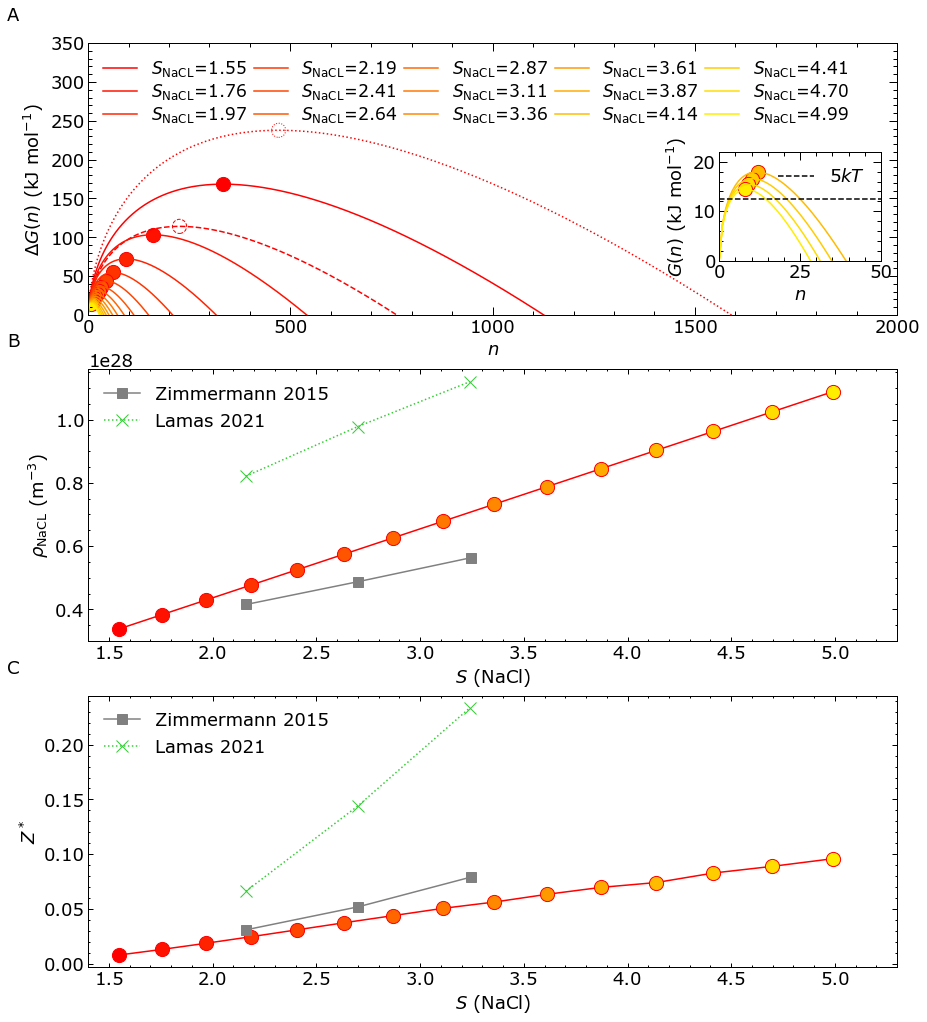

In [124]:
fig = plt.figure(figsize=(16, 20))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax1 = fig.add_subplot(gs[6500:11500,500:15000])
ax2 = fig.add_subplot(gs[12500:17500,500:15000])
##############################################################################
##############################################################################
##############################################################################
ax0 = fig.add_subplot(gs[500:5500,500:15000]) #500:13500
ax01 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax0, [0.78,0.2,0.2,0.4]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip5)
##############################################################################
##############################################################################
##############################################################################
##################################################################################################
##################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1))) #plasma
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
    Gm_up=G_macro4(nn,kT,S4[SIM],sigma_estimate1+sigma_err1)
    DG_up[SIM]=np.max(Gm_up)
    argmaxG_up[SIM]=nn[Gm_up==np.max(Gm_up)]
    Zm_up[SIM]=Z_macro4(int(argmaxG_up[SIM]),kT,S4[SIM])
    
    
    Gm_low=G_macro4(nn,kT,S4[SIM],sigma_estimate1-sigma_err1)
    DG_low[SIM]=np.max(Gm_low)
    argmaxG_low[SIM]=nn[Gm_low==np.max(Gm_low)]
    Zm_low[SIM]=Z_macro4(int(argmaxG_low[SIM]),kT,S4[SIM])
    
       
    ax1.scatter(S4_nacl[SIM],Stest4_nacl[SIM]*mf_to_m3,marker="o",s=200,color=c,edgecolor="red")
    ax2.scatter(S4_nacl[SIM],Zm[SIM],marker="o",s=200,color=c,edgecolor="red")
    
    if S4_nacl[SIM]>=3.9: #inset 
        print("S of NaCl is %.2f" % S4_nacl[SIM])
        ax01.plot(nn,Gm,color=c)
        ax01.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200,edgecolor="red")
    else:
        pass
    
    ax0.plot(nn,Gm,color=c,label=r"$S_{\mathrm{NaCL}}$=%.2lf" % S4_nacl[SIM])
    ax0.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200,edgecolor="red")
    
    if S4_nacl[SIM]<1.7:
        ax0.plot(nn,Gm_up,color=c,ls=":")
        ax0.plot(nn,Gm_low,color=c,ls="--")
        ax0.scatter(argmaxG_up[SIM],DG_up[SIM],marker="o",color=c,s=200,fc="none",ls=":",edgecolor="red")
        ax0.scatter(argmaxG_low[SIM],DG_low[SIM],marker="o",color=c,s=200,fc="none",ls="--",edgecolor="red")
        
ax01.axhline(y=kT*5,label="5$kT$",color="black",ls="--")

ax1.plot(S4_nacl,Stest4_nacl*mf_to_m3,color="red",zorder=0)
ax2.plot(S4_nacl,Zm,color="red",zorder=0)

ax0.set_xlabel(r'$n$')
ax0.set_ylabel(r'$\Delta G(n)$ (kJ mol$^{-1}$)')
ax0.set_xlim(0,2000)
ax0.set_xticks(np.arange(0,2500,500,dtype=int))
ax0.set_ylim(0,350)
ax0.set_yticks(np.arange(0,350.1,50,dtype=int))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.tick_params(which='major', length=8)
ax0.tick_params(which='minor', length=4)
ax0.tick_params(axis='both', which='major')
ax0.legend(loc='upper left', ncol=5, frameon=False,columnspacing=0.4,labelspacing=0.2,fontsize=17) 

ax01.set_xlabel("$n$")
ax01.set_ylabel('$G(n)$ (kJ mol$^{-1}$)')
ax01.set_ylim(0,22)
ax01.set_yticks(np.arange(0,22.5,10))
ax01.xaxis.set_minor_locator(AutoMinorLocator(5))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.tick_params(which='major', length=8)
ax01.tick_params(which='minor', length=4)
ax01.set_xlim(0,50)

ax1.set_ylabel(r"$\rho_{\mathrm{NaCL}}$ (m$^{-3}$)")
ax1.set_xlabel(r"$S$ (NaCl)")
ax1.set_xlim(1.4,5.3)
ax1.set_xticks(np.arange(1.5,5.1,0.5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel(r"$Z^*$")
ax2.set_xlabel(r"$S$ (NaCl)")
ax2.set_xlim(1.4,5.3)
ax2.set_xticks(np.arange(1.5,5.1,0.5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

###############################################################################
###############################################################################
Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
Zimmer_nc=[31,14,6]             #critical ion number 
Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
Zimmer_Z=[0.031,0.052,0.079]
ax1.plot(Zimmer_S,Zimmer_IonPairC,label="Zimmermann 2015",color="grey",marker="s",markersize=10)
ax2.plot(Zimmer_S,Zimmer_Z,label="Zimmermann 2015",color="grey",marker="s",markersize=10)
ax1.plot(Lamas_2021.T[2],Lamas_2021.T[4],color="limegreen",marker="x",markersize=12,ls=":",label="Lamas 2021")
ax2.plot(Lamas_2021.T[2],Lamas_2021.T[6],color="limegreen",marker="x",markersize=12,ls=":",label="Lamas 2021")
##################################################################
##################################################################
ax01.legend(loc='upper right', ncol=1, frameon=False) 
ax1.legend(loc="upper left",ncol=1, frameon=False)
ax2.legend(loc="upper left",ncol=1, frameon=False)

ax0.text(-0.1, 1.10, 'A', transform=ax0.transAxes,verticalalignment='center')
ax1.text(-0.1, 1.10, 'B', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.1, 1.10, 'C', transform=ax2.transAxes,verticalalignment='center')
fig.savefig('/home/lunna/Desktop/Windows/LJ_rate//SI_7.png', dpi=200, bbox_inches='tight')

using 0.11 and 0.14 

In [125]:
#Nsimulations=np.shape(data.Nstot)[0]
xstar1_cap=np.zeros(REPS)
sigma1_cap=np.zeros(REPS)

REP=0
print('Running Booststrap fitting with', REPS, 'repetitions')
while REP < REPS:

    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    

    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR,guess,args=(kT, data.Nss[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)
    
    print_progress(REP, REPS-1)
    
    if tplFitted[0]>=0.11 and tplFitted[0]<=0.14:  
        #tplFitted[0]>=0.11 and tplFitted[0]<=0.14
        #tplFitted[0]>0 and tplFitted[1]>0: works too 
        if success > 0:
            xstar1_cap[int(REP)]=tplFitted[0]
            sigma1_cap[int(REP)]=tplFitted[1]
            REP+=1
            
xstar_estimate1_cap=np.mean(xstar1_cap) 
xstar_err1_cap=np.std(xstar1_cap) 
sigma_estimate1_cap=np.mean(sigma1_cap)
sigma_err1_cap=np.std(sigma1_cap) 

Running Booststrap fitting with 1000 repetitions
|**************************************************| 100%

In [ ]:
xstar1_cube_cap=np.zeros(REPS)
sigma1_cube_cap=np.zeros(REPS)

REP=0
print('Running Booststrap fitting with', REPS, 'repetitions')
while REP < REPS:
    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR_cube,guess,args=(kT, data.Nss[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),
                              full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)

    print_progress(REP, REPS-1)
    
    if tplFitted[0]>=0.11 and tplFitted[0]<=0.14: 
        #tplFitted[0]>=0.11 and tplFitted[0]<=0.14
        #tplFitted[0]>0 and tplFitted[1]>0: also works but threshold tydier
        if success > 0 :
            xstar1_cube_cap[int(REP)]=tplFitted[0]
            sigma1_cube_cap[int(REP)]=tplFitted[1]
            REP+=1

xstar_estimate1_cube_cap=np.mean(xstar1_cube_cap) 
xstar_err1_cube_cap=np.std(xstar1_cube_cap) 
sigma_estimate1_cube_cap=np.mean(sigma1_cube_cap)
sigma_err1_cube_cap=np.std(sigma1_cube_cap) 

Running Booststrap fitting with 1000 repetitions
|********                                          | 15%

In [ ]:
fig = plt.figure(figsize=(16, 14))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax1 = fig.add_subplot(gs[500:5000,500:6500])
ax2 = fig.add_subplot(gs[500:5000,8000:14000])
ax3 = fig.add_subplot(gs[6500:11000,500:6500])
ax4 = fig.add_subplot(gs[6500:11000,8000:14000])
################################################
xstar1_cap_nacl=np.zeros(REPS)
sigma1_cap_nacl=np.zeros(REPS)
xstar1_cube_cap_nacl=np.zeros(REPS)
sigma1_cube_cap_nacl=np.zeros(REPS)
########################################################
########################################################
xstar1_cap_nacl=xstar1_cap/(2-xstar1_cap)
ax1.hist(xstar1_cap_nacl/(0.0625/3.7), bins = 50 ,alpha=0.7,color='red',density=False)
ax1.set_xlabel(r'$m^*$ (mol kg$^{-1}$)')
#ax1.set_ylabel('Distribution')

xstar_estimate1_cap_nacl=np.mean(xstar1_cap_nacl/(0.0625/3.7))  
xstar_err1_nacl=np.std(xstar1_cap_nacl/(0.0625/3.7))        

ax1.axvline(x=xstar_estimate1_cap/(2-xstar_estimate1_cap)/(0.0625/3.7), color='blue', linestyle='-',
            label='%.1f' % (xstar_estimate1_cap/(2-xstar_estimate1_cap)/(0.0625/3.7)))
ax1.axvline(x=0.0625/(0.0625/3.7), color='grey', linestyle='--',label='%.1f' % (3.7))
     
ax1.set_xlim(3.6,4.2)
ax1.set_xticks(np.arange(3.7,4.2,0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc="upper left",frameon=False)
########################################################
########################################################
ax2.hist(sigma1_cap, bins = 50 ,alpha=0.7,color='red',density=False)
ax2.set_xlabel('$\sigma^{\prime}$ (kJ mol$^{-1}$)') 

ax2.axvline(x=sigma_estimate1_cap, color='blue', linestyle='-',label='%.1f' % sigma_estimate1_cap)

ax2.set_xlim(8.5,12.0)
ax2.set_xticks(np.arange(9,12,1))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
ax2.legend(loc="upper left",frameon=False)
########################################################
########################################################
xstar1_cube_cap_nacl=xstar1_cube_cap/(2-xstar1_cube_cap)

ax3.hist(xstar1_cube_cap_nacl/(0.0625/3.7), bins = 50 ,alpha=0.7,color='orange',density=False)
ax3.set_xlabel(r'$m^*$ (mol kg$^{-1}$)')
#ax3.set_ylabel('Distribution')

xstar_estimate1_cube_cap_nacl=np.mean(xstar1_cube_cap_nacl/(0.0625/3.7))  
xstar_err1_cube_nacl=np.std(xstar1_cube_cap_nacl/(0.0625/3.7))        

ax3.axvline(x=xstar_estimate1_cube_cap/(2-xstar_estimate1_cube_cap)/(0.0625/3.7), color='limegreen', linestyle='-',
            label='%.1f' % (xstar_estimate1_cube_cap/(2-xstar_estimate1_cube_cap)/(0.0625/3.7)))
ax3.axvline(x=0.0625/(0.0625/3.7), color='grey', linestyle='--',label='%.1f' % (3.7))
     
ax3.set_xlim(3.6,4.2)
ax3.set_xticks(np.arange(3.7,4.2,0.1))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
ax3.legend(loc="upper left",frameon=False)
########################################################
########################################################
ax4.hist(sigma1_cube_cap, bins = 50 ,alpha=0.7,color='orange',density=False)
ax4.set_xlabel('$\sigma$ (kJ mol$^{-1}$ nm$^{-2}$) ') 

ax4.axvline(x=sigma_estimate1_cube_cap, color='limegreen', linestyle='-',label='%.1f' % sigma_estimate1_cube_cap)

ax4.set_xlim(18,25.0)
ax4.set_xticks(np.arange(19,25.1,1))
ax4.xaxis.set_minor_locator(AutoMinorLocator(5))
ax4.legend(loc="upper left",frameon=False)
################################################################################################################
################################################################################################################
ax1.text(-0.2, 1.10, 'A', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.2, 1.10, 'B', transform=ax2.transAxes,verticalalignment='center')
ax3.text(-0.2, 1.10, 'C', transform=ax3.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.10, 'D', transform=ax4.transAxes,verticalalignment='center')

#ax1.set_title("Eq. 24")
#ax3.set_title("Eq. 28")

ax1.set_title("Including shape factor")
ax2.set_title("Including shape factor")
ax3.set_title("Cubic surface area")
ax4.set_title("Cubic surface area")

fig.savefig('m_sigma.png', dpi=200, bbox_inches='tight')
fig.savefig('/home/lunna/Desktop/Windows/LJ_rate//SI_6.png', dpi=200, bbox_inches='tight')

Accounting for activity coefficient???

# <span style="color: blue;"> <font size="6"> Tolman-like effect (below is new from 21st Sep 2025) 

In [ ]:
data

In [ ]:
xstar_estimate1

Tolman-like effect try try 

In [ ]:
xstar_estimate1

In [ ]:
ERR_Tolman1=lambda tpl, tpl0, kT, nX, ntot, nstot : -kT*np.log(X(nX,ntot,nstot)/tpl0) \
                            +(2/3)*tpl[0]/(1+tpl[1]*np.log(X(nX,ntot,nstot)/tpl0))*np.power(nX,-1/3) 

In [ ]:
#Nsimulations=np.shape(data.Nstot)[0]
REPS_Tolman1=100
sigma1_Tolman1=np.zeros(REPS_Tolman1)
sigma2_Tolman1=np.zeros(REPS_Tolman1)

REP=0
print('Running Booststrap fitting with', REPS_Tolman1, 'repetitions')
while REP < REPS_Tolman1:

    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR_Tolman1,guess,args=(xstar_estimate1, kT, data.Nss[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)
    
    print_progress(REP, REPS_Tolman1-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0: 
        if success > 0:
            sigma1_Tolman1[int(REP)]=tplFitted[0]
            sigma2_Tolman1[int(REP)]=tplFitted[1]
            REP+=1
            
sigma_estimate1_Tolman1=np.mean(sigma1_Tolman1)
sigma_err1_Tolman1=np.std(sigma1_Tolman1) 

sigma_estimate2_Tolman1=np.mean(sigma2_Tolman1)
sigma_err2_Tolman1=np.std(sigma2_Tolman1) 

In [ ]:
plt.hist(sigma1_Tolman1,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate1_Tolman1)
print(sigma_estimate1_Tolman1)
plt.show()

plt.hist(sigma2_Tolman1,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate2_Tolman1)
print(sigma_estimate2_Tolman1)
plt.show()

print("")
print(sigma_estimate1)

In [ ]:
S_Tolman1=np.linspace(1.5,4,15) #supersaturation of Na/Cl ions 
N_Tolman1=int(len(S_Tolman1))
Tolman_prefactor=np.zeros(N_Tolman1)
##########################################################################
##########################################################################
DG_Tolman1=np.zeros(N_Tolman1)
argmaxG_Tolman1=np.zeros(N_Tolman1) 
Zm_Tolman1=np.zeros(N_Tolman1)  
##########################################################################
print(S_Tolman1)
print("")
print(S4)
print("")
print(S4_nacl)
print("")
Stest_Tolman1=S_Tolman1*xstar_estimate1
#print(Stest_Tolman1)
Stest_Tolman1_nacl=Stest_Tolman1/(2-Stest_Tolman1)
#print(Stest_Tolman1_nacl)
S_Tolman1_nacl=Stest_Tolman1_nacl/(xstar_estimate1/(2-xstar_estimate1)) 
S_Tolman1_nacl
print(S_Tolman1_nacl)

In [ ]:
##########################################################################
##########################################################################
S5=np.linspace(1.5,4,15) #supersaturation of Na/Cl ions 
Ntest5=int(len(S5))

#Stest5=np.zeros(Ntest5)      #mole fraction of Na/Cl ions 
#Stest5_nacl=np.zeros(Ntest5) #mole fraction of NaCl pairs 
#S5_nacl=np.zeros(Ntest5)

#DG5=np.zeros(Ntest5)
#argmaxG5=np.zeros(Ntest5) 
#Zm5=np.zeros(Ntest5)      

color=iter(cm.plasma(np.linspace(0,1,Ntest5+1)))
##########################################################################
##########################################################################
for SIM in np.arange(0,Ntest5):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000) #number of ions 
    Gm5=G_macro4(nn,kT,S5[SIM],sigma_estimate1)
          
    #DG5[SIM]=np.max(Gm5)
    #argmaxG5[SIM]=nn[Gm5==np.max(Gm5)]
    #Zm[SIM]=Z_macro(int(argmaxG5[SIM]),kT,S5[SIM])
##########################################################################
##########################################################################
plt.plot(nn,Gm5,ls="-",color="red")
plt.plot(nn,Gm,ls=":",color="blue")
plt.title("Check these two are the same")
plt.xlim(0,40)
plt.ylim(0,20)

In [ ]:
color=iter(cm.plasma(np.linspace(0,1,N_Tolman1+1)))
##########################################################################
##########################################################################
for i in np.arange(0,N_Tolman1):
    c=next(color)

    Tolman_prefactor[i]=sigma_estimate1_Tolman1/(1+sigma_estimate2_Tolman1*np.log(S_Tolman1[i]))

plt.plot(S_Tolman1,Tolman_prefactor,marker="o")
plt.axhline(y=sigma_estimate1)
plt.xlabel("$S$")
plt.xlim(1,)
plt.ylabel(r"$\sigma^{\prime}$ (kJ mol$^{-1}$)")

In [ ]:
#G_macro4=lambda nX, kT, S, sigmaprime, : -nX*kT*(np.log(S))+sigmaprime*np.power(nX,2/3)
G_macro4_Tolman1=lambda nX, kT, S, sigmaprime1,sigmaprime2, : -nX*kT*(np.log(S))+ \
                                        sigmaprime1/(1+sigmaprime2*np.log(S))*np.power(nX,2/3) 
                                        #sigmaprime*np.power(nX,2/3)
                                        #sigmaprime1/(1+sigmaprime2*np.log(S))*np.power(nX,2/3) 
#Tolman_prefactor[i]=sigma_estimate1_Tolman1/(1+sigma_estimate2_Tolman1*np.log(S_Tolman1[i]))
Z_macro4_Tolman1=lambda nstar, kT, S, :np.sqrt(kT*abs(np.log(S)/6/np.pi/kT/nstar))

In [ ]:
color=iter(cm.plasma(np.linspace(0,1,N_Tolman1+1)))
##########################################################################
##########################################################################
for SIM in np.arange(0,N_Tolman1):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000) #number of ions 
    Gm_Tolman1=G_macro4_Tolman1(nn,kT,S_Tolman1[SIM],sigma_estimate1_Tolman1,sigma_estimate2_Tolman1)
    Gm4=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    
    #print(S_Tolman1[SIM])
    
    if SIM>=0: #S_Tolman1[SIM]
        #print(S_Tolman1[SIM])
        plt.plot(nn,Gm4,label="$\sigma^{\prime}$=%.2lf" % sigma_estimate1,ls="-")
        plt.plot(nn,Gm_Tolman1,label="$\sigma^{\prime}_T$=%.2lf" % Tolman_prefactor[SIM],ls=":")
        plt.xlim(0,100)
        plt.ylim(0,200)
        plt.legend(frameon=False)
        plt.title(r"$S = %.2lf$" % S_Tolman1[SIM])
        plt.show()
    #DG_Tolman1[SIM]=np.max(Gm_Tolman1)
    #argmaxG_Tolman1[SIM]=nn[Gm_Tolman1==np.max(Gm_Tolman1)]
    #Zm_Tolman1[SIM]=Z_macro4_Tolman1(int(argmaxG_Tolman1[SIM]),kT,S_Tolman1[SIM])

In [ ]:
S_Tolman1==S4

In [ ]:
S_Tolman1_nacl==S4_nacl

In [ ]:
fig = plt.figure(figsize=(14, 40))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax0 = fig.add_subplot(gs[500:6000,500:13500])
ax01 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax0, [0.7,0.15,0.28,0.52]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip5)

ax3 = fig.add_subplot(gs[7500:13000,500:13500])
ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.45,0.25,0.50,0.65]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)

ax1 = fig.add_subplot(gs[14500:20000,500:13500])
ax2 = fig.add_subplot(gs[21500:27000,500:13500])

ax0.text(-0.1, 1.10, 'A', transform=ax0.transAxes,verticalalignment='center')
ax3.text(-0.1, 1.10, 'B', transform=ax3.transAxes,verticalalignment='center')
ax1.text(-0.1, 1.10, 'C', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.1, 1.10, 'D', transform=ax2.transAxes,verticalalignment='center')
##################################################################################################
##################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1))) #plasma
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
    Gm_Tolman1=G_macro4_Tolman1(nn,kT,S_Tolman1[SIM],sigma_estimate1_Tolman1,sigma_estimate2_Tolman1)
    DG_Tolman1[SIM]=np.max(Gm_Tolman1)
    argmaxG_Tolman1[SIM]=nn[Gm_Tolman1==np.max(Gm_Tolman1)]
    Zm_Tolman1[SIM]=Z_macro4_Tolman1(int(argmaxG_Tolman1[SIM]),kT,S_Tolman1[SIM])
    
    #Gm_up=G_macro4(nn,kT,S4[SIM],sigma_estimate1+sigma_err1)
    #DG_up[SIM]=np.max(Gm_up)
    #argmaxG_up[SIM]=nn[Gm_up==np.max(Gm_up)]
    #Zm_up[SIM]=Z_macro4(int(argmaxG_up[SIM]),kT,S4[SIM])
    
    
    #Gm_low=G_macro4(nn,kT,S4[SIM],sigma_estimate1-sigma_err1)
    #DG_low[SIM]=np.max(Gm_low)
    #argmaxG_low[SIM]=nn[Gm_low==np.max(Gm_low)]
    #Zm_low[SIM]=Z_macro4(int(argmaxG_low[SIM]),kT,S4[SIM])
    
    
    ax3.scatter(S4_nacl[SIM],argmaxG[SIM],marker="o",s=200,color=c,edgecolor="red") #,facecolors="none"
    ax03.scatter(S4_nacl[SIM],DG[SIM]/kT,marker="o",s=200,color=c,edgecolor="red")
    ax3.scatter(S_Tolman1_nacl[SIM],argmaxG_Tolman1[SIM],marker="s",s=150,fc="none",ls="-",edgecolor=c)
    ax03.scatter(S_Tolman1_nacl[SIM],DG_Tolman1[SIM]/kT,marker="s",s=150,fc="none",ls="-",edgecolor=c)
    
    ax1.scatter(S4_nacl[SIM],Stest4_nacl[SIM]*mf_to_m3,marker="o",s=200,color=c)
    ax1.scatter(S_Tolman1_nacl[SIM],Stest_Tolman1_nacl[SIM]*mf_to_m3,marker="s",s=200,fc="none",ls="-",edgecolor=c)
    ax2.scatter(S4_nacl[SIM],Zm[SIM],marker="o",s=200,color=c)
    ax2.scatter(S_Tolman1_nacl[SIM],Zm_Tolman1[SIM],marker="s",s=200,fc="none",ls="-",edgecolor=c)
    
    if S4_nacl[SIM]>=3.9: #inset 
        print("S of NaCl is %.2f" % S4_nacl[SIM])
        ax01.plot(nn,Gm,color=c)
        ax01.plot(nn,Gm_Tolman1,color=c,ls=":")
        ax01.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
        ax01.scatter(argmaxG_Tolman1[SIM],DG_Tolman1[SIM],marker="s",color=c,s=150,fc="none",ls="-",edgecolor=c)
    else:
        pass
    
    ax0.plot(nn,Gm,color=c,label=r"$S_\mathrm{NaCl}$=%.2lf" % S4_nacl[SIM])
    ax0.plot(nn,Gm_Tolman1,color=c,ls=":") #label=r"$S_\mathrm{NaCl}$=%.2lf" % S_Tolman1_nacl[SIM]
    #ax0.plot(nn,Gm_up,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM],ls=":")
    #ax0.plot(nn,Gm_low,color=c,label=r"$S$=%.1lf" % S4_nacl[SIM],ls="--")
    
    ax0.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
    ax0.scatter(argmaxG_Tolman1[SIM],DG_Tolman1[SIM],marker="s",color=c,s=150,fc="none",ls="-",edgecolor=c)
    #ax0.scatter(argmaxG_up[SIM],DG_up[SIM],marker="x",color=c,s=200)
    #ax0.scatter(argmaxG_low[SIM],DG_low[SIM],marker="+",color=c,s=200)
        
#ax01.axhline(y=kT*5,label="5$kT$",color="black",ls=":")
#ax01.axhline(y=kT*8,label="8$kT$",color="black",ls="--")

ax3.plot(S4_nacl,argmaxG,color="red",zorder=0)
ax3.plot(S_Tolman1_nacl,argmaxG_Tolman1,color="red",ls=":",zorder=0)
ax3.set_xlabel(r"$S$ (NaCl)")
ax03.plot(S4_nacl,DG/kT,color="red",zorder=0)
ax03.plot(S_Tolman1_nacl,DG_Tolman1/kT,color="red",ls=":",zorder=0)
ax03.set_xlabel(r"$S$ (NaCl)")

ax1.plot(S4_nacl,Stest4_nacl*mf_to_m3,color="red",zorder=0)
ax2.plot(S4_nacl,Zm,color="red",zorder=0)
ax1.plot(S_Tolman1_nacl,Stest_Tolman1_nacl*mf_to_m3,color="red",ls=":",zorder=0)
ax2.plot(S_Tolman1_nacl,Zm_Tolman1,color="red",ls=":",zorder=0)


ax0.set_title("Square and dotted are the Tolman-like corrected profiles",color="blue")
ax0.set_xlabel(r'$n$ (ion)')
ax0.set_ylabel(r'$\Delta G(n)$ (kJ/mol)')
ax0.set_xlim(0,2000)
ax0.set_xticks(np.arange(0,2500,500,dtype=int))
ax0.set_ylim(0,350)
ax0.set_yticks(np.arange(0,350.1,50,dtype=int))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.tick_params(which='major', length=8)
ax0.tick_params(which='minor', length=4)
ax0.tick_params(axis='both', which='major')
ax0.legend(loc='upper left', ncol=4, frameon=False,labelspacing=0.2,columnspacing=0.4) 

ax01.set_xlabel("$n$ (ion)")
ax01.set_ylabel('$G(n)$ (kJ/mol)')
ax01.set_ylim(0,32)
ax01.set_yticks(np.arange(0,32.5,10))
ax01.xaxis.set_minor_locator(AutoMinorLocator(5))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.tick_params(which='major', length=8)
ax01.tick_params(which='minor', length=4)
ax01.set_xlim(0,50)

ax3.set_ylabel(r"$n^*$ (ion)")
ax3.set_ylim(-10,450)
ax3.set_yticks(np.arange(0,450.1,100))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlim(1.4,5.3)
ax3.set_xticks(np.arange(1.5,5.1,0.5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))

ax03.axhline(y=8,label="8$kT$",color="black",ls="--")
ax03.set_ylabel('$\Delta G*$ ($kT$)')
ax03.set_xlim(1.4,5.3)
ax03.set_xticks(np.arange(1.5,5.1,0.5))
ax03.xaxis.set_minor_locator(AutoMinorLocator(5))

ax1.set_ylabel(r"$\rho_\mathrm{NaCL}$ (m$^{-3}$)")
ax1.set_xlabel(r"$S$ (NaCl)")
ax1.set_xlim(1.4,5.3)
ax1.set_xticks(np.arange(1.5,5.1,0.5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel(r"$Z^*$")
ax2.set_xlabel(r"$S$ (NaCl)")
ax2.set_xlim(1.4,5.3)
ax2.set_xticks(np.arange(1.5,5.1,0.5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

###############################################################################
###############################################################################
#Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
#Zimmer_nc=[31,14,6]             #critical ion number 
#Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
#Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
#Zimmer_Z=[0.031,0.052,0.079]
#ax3.plot(Zimmer_S,Zimmer_nc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
#ax03.plot(Zimmer_S,Zimmer_Gc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
#ax1.plot(Zimmer_S,Zimmer_IonPairC,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
#ax2.plot(Zimmer_S,Zimmer_Z,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)

ax01.legend(loc='upper right', ncol=1, frameon=False) 
ax03.legend(loc="center right",frameon=False)
ax3.legend(bbox_to_anchor=(0.1, 0.9),ncol=1, frameon=False)
ax1.legend(loc="upper left",ncol=1, frameon=False)
ax2.legend(loc="upper left",ncol=1, frameon=False)

In [ ]:
frequency/10**9

In [ ]:
fig = plt.figure(figsize=(16, 24))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:8500,500:10000])
ax4 = fig.add_subplot(gs[9500:16500,500:10000])

ax5 = fig.add_subplot(gs[18000:22000,500:4500])
ax6 = fig.add_subplot(gs[18000:22000,5500:10000])
################################################################################################
ax1.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax1.plot(S_Tolman1_nacl,np.log10(frequency*Zm_Tolman1*Stest_Tolman1_nacl*mf_to_m3*np.exp(-DG_Tolman1/kT)),
         color="red",lw=2,ls=":",
         label="This work with Tolman-like corection")

ax1.fill_between(S4_nacl,
                np.log10(frequency*Zm_up*Stest_Tolman1_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest_Tolman1_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)
################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax1.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=11,color=c,markeredgecolor="red") 
    ax1.plot(S_Tolman1_nacl[SIM],np.log10(frequency*Zm_Tolman1[SIM]*Stest_Tolman1_nacl[SIM]*mf_to_m3*np.exp(-DG_Tolman1[SIM]/kT)),
            marker="s",markersize=11,color=c,markeredgecolor="red") 
################################################################################################
ax1.set_xlabel(r'$S_{\mathrm{NaCl}}$')
ax1.set_ylabel(r'log$_{10}$[$J_{\mathrm{NaCl}}$/(m$^{-3}$ s$^{-1}$)]')
ax1.set_xlim(0.9,6.2)
ax1.set_xticks(np.arange(1,6.2,1,dtype=int))
ax1.set_ylim(-10,37)
ax1.set_yticks(np.arange(-10,37,5,dtype=int))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(axis='both', which='major')

ax1.scatter(3.7,np.log10(10**31.54),marker="^",s=150,color="blue",label='Finney 2022 (MSM)',zorder=3)
ax1.plot(np.power(Jiang_2019.T[2],1),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="purple",label="Jiang 2019 (MFPT/US)",markerfacecolor='none')

ax1.plot(np.power(Zimmer_CN5.T[2],1),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="green",label=r"Zimmermann 2018 (seeding CN$\geq$5)",markerfacecolor='none')
ax1.plot(np.power(Zimmer_CN4.T[2],1),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann 2018 (seeding CN$\geq$4)")
ax1.plot(np.power(Zimmer_q0_43.T[2],1),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann 2018 (seeding CN$\geq$6/$q_\mathrm{oct}$>0.43)")
ax1.scatter(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
         s=120,marker="s",color="brown",label="Zimmermann 2018 (brute force)",facecolor='none',zorder=3)

ax1.plot(np.power(Lanaro_Patey.T[2],1),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta", label="Lanaro & Patey 2016 (brute force)")

ax1.plot(np.power(Jiang_2018.T[0],1),np.log10(Jiang_2018.T[1]),color="cyan",
         marker="^",markerfacecolor='none',markersize=12,zorder=3)

ax1.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")

X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    print(X3[SIM]/xstar_estimate1)
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))

ax1.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax1.axvline(np.max(S3_nacl),ls=":",color="grey")
####################################################################################
####################################################################################
####################################################################################
#ax2.plot(1/np.power(Gm_1,2),np.log10(frequency*Zm_Tolman1*Stest_Tolman1_nacl*mf_to_m3*np.exp(-DG_Tolman1/kT)),color="red",lw=2,#zorder=2,
#        label="This work")
#ax2.fill_between(1/np.power(Gm_1,2),
#                np.log10(frequency*Zm_up*Stest_Tolman1_nacl*mf_to_m3*np.exp(-DG_up/kT)),
#                np.log10(frequency*Zm_low*Stest_Tolman1_nacl*mf_to_m3*np.exp(-DG_low/kT)),
#                color='red', alpha=0.15,edgecolor="none",
#                interpolate=True)
#ax2.scatter(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",s=150,label='Finney 2022 (MSM)',zorder=3)

#ax2.set_xlabel(r"1/[ln$S_{\mathrm{NaCl}}$]$^2$")
#ax2.set_ylabel(r'log$_{10}$[$J_{\mathrm{NaCl}}$/(m$^{-3}$ s$^{-1}$)]')
#ax2.set_ylim(-10,37)
#ax2.set_yticks(np.arange(-10,37,5,dtype=int))
#ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
#ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax2.tick_params(which='major', length=8)
#ax2.tick_params(which='minor', length=4)
#
#ax2.plot(1/np.power(np.log(Jiang_2019.T[2]),2),np.log10(Jiang_2019.T[1]),
#         markersize=12,marker="^",color="purple",label="Jiang 2019 (MFPT/US)",markerfacecolor='none')

#ax2.plot(1/np.power(np.log(Zimmer_CN5.T[2]),2),np.log10(10**6*Zimmer_CN5.T[1]),
#         markersize=10,marker="s",color="green",label=r"Zimmermann 2018 (seeding CN$\geq$5)",markerfacecolor='none')
#ax2.plot(1/np.power(np.log(Zimmer_CN4.T[2]),2),np.log10(10**6*Zimmer_CN4.T[1]),
#         markersize=10,marker="s",color="lime",label=r"Zimmermann 2018 (seeding CN$\geq$4)")
#ax2.plot(1/np.power(np.log(Zimmer_q0_43.T[2]),2),np.log10(10**6*Zimmer_q0_43.T[1]),
#         markersize=10,marker="s",color="orange",label=r"Zimmermann 2018 (seeding CN$\geq$6/$q_\mathrm{oct}$>0.43)")
#ax2.plot(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="brown",label="Zimmermann 2018",markerfacecolor='none')
#ax2.scatter(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
#           marker="s",s=120,color="brown",label="Zimmermann 2018 (brute force)",facecolor='none',zorder=3)

#ax2.plot(1/np.power(np.log(Lanaro_Patey.T[2]),2),np.log10(10**6*Lanaro_Patey.T[1]),
#         markersize=11,marker="+",color="magenta",label="Lanaro & Patey 2016 (brute force)")

#ax2.plot(1/np.power(np.log(Jiang_2018.T[0]),2),np.log10(Jiang_2018.T[1]),
#         color="cyan",marker="^",markersize=12,markerfacecolor='none',zorder=3,label="Jiang 2018 (forward flux)")
##################################################################################
##################################################################################
##################################################################################
ax1.plot(Lamas_2021.T[2],Lamas_2021.T[1],marker="x",markersize=12,
         color="black",ls=":",markerfacecolor="none")
#ax2.plot(1/np.power(np.log(Lamas_2021.T[2]),2),Lamas_2021.T[1],marker="x",markersize=12,color="black",ls=":",
#         markerfacecolor="none",label="Lamas 2021 (seeding)")
##################################################################################
##################################################################################
##################################################################################
#the follow is not strictly staight we need to fit linear line 
Cedeno_0_5pl_x=1/np.power(np.log(Cedeno_0_5pl.T[0]),2)
Cedeno_0_5pl_y=np.log10(Cedeno_0_5pl.T[1])
Cedeno_0_5pl_a,Cedeno_0_5pl_b=np.polyfit(Cedeno_0_5pl_x[-4:-1],Cedeno_0_5pl_y[-4:-1],1)
nn=np.linspace(np.min(Cedeno_0_5pl_x), np.max(Cedeno_0_5pl_x),num=10)
#ax2.plot(nn,nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',
#         c="red",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",
         marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=5.0,alpha=0.5)
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
################################################
Cedeno_1_5pl_x=1/np.power(np.log(Cedeno_1_5pl.T[0]),2)
Cedeno_1_5pl_y=np.log10(Cedeno_1_5pl.T[1])
Cedeno_1_5pl_a,Cedeno_1_5pl_b=np.polyfit(Cedeno_1_5pl_x[:],Cedeno_1_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_1_5pl_x), np.max(Cedeno_1_5pl_x),num=10)
#ax2.plot(nn,nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',
#         c="blue",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',c="blue",ls="--",linewidth=5.0,alpha=0.5)
################################################
Cedeno_5_5pl_x=1/np.power(np.log(Cedeno_5_5pl.T[0]),2)
Cedeno_5_5pl_y=np.log10(Cedeno_5_5pl.T[1])
Cedeno_5_5pl_a,Cedeno_5_5pl_b=np.polyfit(Cedeno_5_5pl_x[:],Cedeno_5_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_5_5pl_x), np.max(Cedeno_5_5pl_x),num=10)
#ax2.plot(nn,nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',
#         c="green",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',c="green",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
ax1.plot(Desarnaud.T[0],np.log10(Desarnaud.T[1]),color="orange",
         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
#ax2.plot(1/np.power(np.log(Desarnaud.T[0]),2),np.log10(Desarnaud.T[1]),color="orange",
#         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
#ax2.set_xlabel(r"1/[ln$S_{\mathrm{NaCl}}$]$^2$")
#ax2.set_xlim(0.1,5.4)
#ax2.set_xticks(np.array([1, 2, 3, 4, 5]))

#def tick_function(X):
#    V = np.exp(np.sqrt(1/X))  #X
#    return ["%.2f" % z for z in V]
#new_tick_locations = np.array([1, 2, 3, 4, 5])
#ax3 = ax2.twiny()
#ax3.set_xlim(ax2.get_xlim())
#ax3.set_xticks(new_tick_locations)
#ax3.set_xticklabels(tick_function(new_tick_locations))
#ax3.set_xlabel(r"$S_{\mathrm{NaCl}}$",labelpad=15)
#ax3.xaxis.minorticks_off()
#################################################################################
#ax2.axvline(1/np.power(np.log(15/3.7),2),c="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")
#X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
#S3_nacl=np.zeros(Nsimulations)
#lnS3_nacl2=np.zeros(Nsimulations)
#color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
#for SIM in np.arange(0,Nsimulations):
#    c=next(color)
#    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
#    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))
#    lnS3_nacl2[SIM]=1/np.power(np.log(S3_nacl[SIM]),2)
#ax2.axvline(np.min(lnS3_nacl2),ls=":",color="grey",label="$S_{ss,\mathrm{NaCl}}$ range (Table III)")
#ax2.axvline(np.max(lnS3_nacl2),ls=":",color="grey")
##################################################################################
ax1.legend(bbox_to_anchor=(1.1,1),frameon=False,ncol=1,columnspacing=2)
##################################################################################
##################################################################################
##################################################################################
color=iter(cm.autumn(np.linspace(0,1,N_Tolman1+1)))
for i in np.arange(0,N_Tolman1):
    c=next(color)
    Tolman_prefactor[i]=sigma_estimate1_Tolman1/(1+sigma_estimate2_Tolman1*np.log(S_Tolman1[i]))
    ax4.plot(S_Tolman1_nacl[i],Tolman_prefactor[i],marker="s",markersize=11,color=c,markeredgecolor="red")
    
ax4.plot(S_Tolman1_nacl,Tolman_prefactor,color="red",ls=":",label=r"Tolman-corrected $\sigma^{\prime}_T$")
ax4.axhline(y=sigma_estimate1,color="red",ls="-",label=r"$\sigma^{\prime}$")
ax4.set_xlabel("$S_\mathrm{NaCl}$")
ax4.set_ylabel(r"$\sigma^{\prime}$ (kJ mol$^{-1}$)")

ax4.set_xlim(0.9,6.2)
ax4.set_xticks(np.arange(1,6.2,1,dtype=int))
ax4.set_ylim(8,14)
ax4.set_yticks(np.arange(8,14.1,1,dtype=int))
ax4.xaxis.set_minor_locator(AutoMinorLocator(5))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))

ax4.tick_params(which='major', length=8)
ax4.tick_params(which='minor', length=4)
ax4.tick_params(axis='both', which='major')


ax4.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax4.axvline(np.max(S3_nacl),ls=":",color="grey")
ax4.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")
ax4.legend(bbox_to_anchor=(1.1,1),frameon=False,ncol=1,columnspacing=2)

##################################################################################
##################################################################################
ax5.hist(sigma1_Tolman1,alpha=0.6,bins=20,density=False)
ax5.axvline(x=sigma_estimate1_Tolman1)
#print(sigma_estimate1_Tolman1)
ax5.set_xlabel(r"$\sigma^{\prime}_\infty$")

ax6.hist(sigma2_Tolman1,alpha=0.6,bins=20,density=False)
ax6.axvline(x=sigma_estimate2_Tolman1)
#print(sigma_estimate2_Tolman1)
#plt.show()
ax6.set_xlabel(r"$\delta$")

#print("")
#print(sigma_estimate1)
ax6.text(0.5,40,r"$\sigma^{\prime}_T=\frac{\sigma^{\prime}_\infty}{(1+\delta \mathrm{ln}(S))}$",fontsize=26)

##################################################################################
##################################################################################
#ax2.legend(bbox_to_anchor=(1, -0.2),frameon=False,ncol=2,columnspacing=2)
ax1.text(-0.2, 1.20, 'A', transform=ax1.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.20, 'B', transform=ax4.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.20, 'C', transform=ax5.transAxes,verticalalignment='center')
fig.savefig('rates_2_Tolman1.png', dpi=200, bbox_inches='tight',transparent=False)

# <span style="color: blue;"> <font size="4"> Tolman-like effect with cube

In [ ]:
print(xstar_estimate1_cube)
print(sigma_estimate1_cube)

In [ ]:
#ERR_cube=lambda tpl, kT, nX, ntot, nstot: -kT*np.log(X(nX,ntot,nstot)/(tpl[0])) \
#                                        +(2/3)*6*tpl[1]*np.power(v_na,2/3)*np.power(nX,-1/3)

ERR_Tolman1_cube=lambda tpl, tpl0, kT, nX, ntot, nstot : -kT*np.log(X(nX,ntot,nstot)/tpl0) \
                            +(2/3)*6*tpl[0]/(1+tpl[1]*np.log(X(nX,ntot,nstot)/tpl0))*np.power(v_na,2/3)*np.power(nX,-1/3)

In [ ]:
#Nsimulations=np.shape(data.Nstot)[0]
REPS_Tolman1_cube=100
sigma1_Tolman1_cube=np.zeros(REPS_Tolman1_cube)
sigma2_Tolman1_cube=np.zeros(REPS_Tolman1_cube)

REP=0
print('Running Booststrap fitting with', REPS_Tolman1_cube, 'repetitions')
while REP < REPS_Tolman1_cube:
    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR_Tolman1_cube,guess,args=(xstar_estimate1_cube,kT, data.Nss[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),
                              full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)

    print_progress(REP, REPS_Tolman1_cube-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0: 
        if success > 0 :
            sigma1_Tolman1_cube[int(REP)]=tplFitted[0]
            sigma2_Tolman1_cube[int(REP)]=tplFitted[1]
            REP+=1

sigma_estimate1_Tolman1_cube=np.mean(sigma1_Tolman1_cube)
sigma_err1_Tolman1_cube=np.std(sigma1_Tolman1_cube) 

sigma_estimate2_Tolman1_cube=np.mean(sigma2_Tolman1_cube)
sigma_err2_Tolman1_cube=np.std(sigma2_Tolman1_cube) 

In [ ]:
plt.hist(sigma1_Tolman1_cube,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate1_Tolman1_cube)
print(sigma_estimate1_Tolman1_cube)
plt.show()

plt.hist(sigma2_Tolman1_cube,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate2_Tolman1_cube)
print(sigma_estimate2_Tolman1_cube)
plt.show()

print("")
print(sigma_estimate1_cube)

In [ ]:
Tolman_prefactor_cube=np.zeros(N_Tolman1)

color=iter(cm.plasma(np.linspace(0,1,N_Tolman1+1)))
##########################################################################
##########################################################################
for i in np.arange(0,N_Tolman1):
    c=next(color)
    #nn=np.linspace(0, 7000, num=7000) #number of ions 
    #Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    
    Tolman_prefactor_cube[i]=sigma_estimate1_Tolman1_cube/(1+sigma_estimate2_Tolman1_cube*np.log(S_Tolman1[i]))

    #DG[SIM]=np.max(Gm)
    #argmaxG[SIM]=nn[Gm==np.max(Gm)]
    #Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
plt.plot(S_Tolman1,Tolman_prefactor_cube,marker="o")
plt.axhline(y=sigma_estimate1_cube)
plt.xlim(1,)
plt.xlabel("$S$")
plt.ylabel(r"$\sigma^{\prime}$ (kJ mol$^{-1}$ nm$^{-2}$)")

In [ ]:
30*1.66

<span style="color: blue;"> <font size="5" bold> First time nss_in is used
    
    fcubic case first

In [ ]:
data

In [ ]:
#ERR_cube=lambda tpl, kT, nX, ntot, nstot: -kT*np.log(X(nX,ntot,nstot)/(tpl[0])) \
#                                        +(2/3)*6*tpl[1]*np.power(v_na,2/3)*np.power(nX,-1/3)

ERR_Tolman2_cube_step1=lambda tpl, kT, nX, nX_in, ntot, nstot: -kT*np.log(X(nX_in,ntot,nstot)/(tpl[0])) \
                                        +(2/3)*6*tpl[1]*np.power(v_na,2/3)*np.power(nX,-1/3)

ERR_Tolman2_cube=lambda tpl, tpl0, kT, nX, nX_in, ntot, nstot : -kT*np.log(X(nX_in,ntot,nstot)/tpl0) \
                            +(2/3)*6*tpl[0]/(1+tpl[1]*np.log(X(nX_in,ntot,nstot)/tpl0))*np.power(v_na,2/3)*np.power(nX,-1/3)

<span style="color: blue;"> <font size="5" bold>  We want to use ERR_cube first to get the solubility estimate of using nX_in

In [ ]:
#Nsimulations=np.shape(data.Nstot)[0]
REPS_Tolman2_cube_step1=100
sigma1_Tolman2_cube_step1=np.zeros(REPS_Tolman2_cube_step1)
sigma2_Tolman2_cube_step1=np.zeros(REPS_Tolman2_cube_step1)

REP=0
print('Running Booststrap fitting with', REPS_Tolman2_cube_step1, 'repetitions')
while REP < REPS_Tolman2_cube_step1:
    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   

    tplFitted,success=leastsq(ERR_Tolman2_cube_step1,guess,args=(kT, data.Nss[simulations], data.Nss_in[simulations],
                              data.Ntot[simulations], data.Nstot[simulations]),
                              full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)
    print_progress(REP, REPS_Tolman2_cube_step1-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0: 
        if success > 0 :
            sigma1_Tolman2_cube_step1[int(REP)]=tplFitted[0]
            sigma2_Tolman2_cube_step1[int(REP)]=tplFitted[1]
            REP+=1

sigma_estimate1_Tolman2_cube_step1=np.mean(sigma1_Tolman2_cube_step1)
sigma_err1_Tolman2_cube_step1=np.std(sigma1_Tolman2_cube_step1) 

sigma_estimate2_Tolman2_cube_step1=np.mean(sigma2_Tolman2_cube_step1)
sigma_err2_Tolman2_cube_step1=np.std(sigma2_Tolman2_cube_step1) 

In [ ]:
plt.hist(sigma1_Tolman2_cube_step1,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate1_Tolman2_cube_step1)
print(sigma_estimate1_Tolman2_cube_step1)
plt.show()

plt.hist(sigma2_Tolman2_cube_step1,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate2_Tolman2_cube_step1)
print(sigma_estimate2_Tolman2_cube_step1)
plt.show()

print("")
print(xstar_estimate1_cube,sigma_estimate1_Tolman2_cube_step1)
print(sigma_estimate1_cube,sigma_estimate2_Tolman2_cube_step1)

In [ ]:
#Nsimulations=np.shape(data.Nstot)[0]
REPS_Tolman2_cube=100
sigma1_Tolman2_cube=np.zeros(REPS_Tolman2_cube)
sigma2_Tolman2_cube=np.zeros(REPS_Tolman2_cube)

REP=0
print('Running Booststrap fitting with', REPS_Tolman2_cube, 'repetitions')
while REP < REPS_Tolman2_cube:
    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   
    #sigma_estimate1_Tolman2_cube_step1 is mole fraction predicted by using nX_in
    tplFitted,success=leastsq(ERR_Tolman2_cube,guess,args=(sigma_estimate1_Tolman2_cube_step1,kT, 
                                                           data.Nss[simulations], data.Nss_in[simulations],
                              data.Ntot[simulations], data.Nstot[simulations]),
                              full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)

    print_progress(REP, REPS_Tolman2_cube-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0: 
        if success > 0 :
            sigma1_Tolman2_cube[int(REP)]=tplFitted[0]
            sigma2_Tolman2_cube[int(REP)]=tplFitted[1]
            REP+=1

sigma_estimate1_Tolman2_cube=np.mean(sigma1_Tolman2_cube)
sigma_err1_Tolman2_cube=np.std(sigma1_Tolman2_cube) 

sigma_estimate2_Tolman2_cube=np.mean(sigma2_Tolman2_cube)
sigma_err2_Tolman2_cube=np.std(sigma2_Tolman2_cube) 

In [ ]:
plt.hist(sigma1_Tolman2_cube,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate1_Tolman2_cube)
print(sigma_estimate1_Tolman2_cube)
plt.show()

plt.hist(sigma2_Tolman2_cube,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate2_Tolman2_cube)
plt.show()

print("")
print(sigma_estimate2_Tolman2_cube_step1,sigma_estimate1_Tolman2_cube)

In [ ]:
S_Tolman2=np.linspace(1.5,4,15) #supersaturation of Na/Cl ions 
N_Tolman2=int(len(S_Tolman2))
Tolman_prefactor=np.zeros(N_Tolman2)
##########################################################################
##########################################################################
DG_Tolman2=np.zeros(N_Tolman2)
argmaxG_Tolman2=np.zeros(N_Tolman2) 
Zm_Tolman2=np.zeros(N_Tolman2)  

DG_Tolman2_up=np.zeros(N_Tolman2)
argmaxG_Tolman2_up=np.zeros(N_Tolman2) 
Zm_Tolman2_up=np.zeros(N_Tolman2)

DG_Tolman2_down=np.zeros(N_Tolman2)
argmaxG_Tolman2_down=np.zeros(N_Tolman2) 
Zm_Tolman2_down=np.zeros(N_Tolman2)  
##########################################################################
#print(S_Tolman2)
#print("")
#print(S4)
#print("")
#print(S4_nacl)
#print("")
Stest_Tolman2=S_Tolman2*xstar_estimate1
Stest_Tolman2_nacl=Stest_Tolman2/(2-Stest_Tolman2)
S_Tolman2_nacl=Stest_Tolman2_nacl/(xstar_estimate1/(2-xstar_estimate1)) 
S_Tolman2_nacl
#print(S_Tolman2_nacl)

In [ ]:
##########################################################################
Tolman_prefactor_Tolman2_cube=np.zeros(N_Tolman2)
color=iter(cm.plasma(np.linspace(0,1,N_Tolman2+1)))
##########################################################################
##########################################################################
for i in np.arange(0,N_Tolman2):
    c=next(color)

    
    Tolman_prefactor_Tolman2_cube[i]=sigma_estimate1_Tolman2_cube/(1+sigma_estimate2_Tolman2_cube*np.log(S_Tolman2[i]))

    #DG[SIM]=np.max(Gm)
    #argmaxG[SIM]=nn[Gm==np.max(Gm)]
    #Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
plt.plot(S_Tolman2,Tolman_prefactor_Tolman2_cube,marker="o")
#plt.axhline(y=sigma_estimate1_cube)
plt.axhline(y=sigma_estimate2_Tolman2_cube_step1,ls="--")
plt.xlim(1,)
plt.xlabel("$S$")
plt.ylabel(r"$\sigma^{\prime}$ (kJ mol$^{-1}$ nm$^{-2}$)")

<span style="color:red;"> <font size="5"> now without surface area + with nss_in and log(S) --> (S) --> log(S)
    
    and ln(S) --> (S)  --> ln(S) because difference seem not big, or even worse 

In [ ]:
ERR_Tolman2_step1=lambda tpl, kT, nX, nX_in, ntot, nstot : -kT*np.log(X(nX_in,ntot,nstot)/tpl[0]) \
                            +(2/3)*tpl[1]*np.power(nX,-1/3) 

ERR_Tolman2=lambda tpl, tpl0, kT, nX, nX_in, ntot, nstot : -kT*np.log(X(nX_in,ntot,nstot)/tpl0) \
                            +(2/3)*tpl[0]/(1+tpl[1]*np.log(X(nX_in,ntot,nstot)/tpl0))*np.power(nX,-1/3) 
#+(2/3)*tpl[0]/(1+tpl[1]*np.log(X(nX_in,ntot,nstot)/tpl0))*np.power(nX,-1/3) 

In [ ]:
#Nsimulations=np.shape(data.Nstot)[0]
REPS_Tolman2_step1=1000
sigma1_Tolman2_step1=np.zeros(REPS_Tolman2_step1)
sigma2_Tolman2_step1=np.zeros(REPS_Tolman2_step1)

REP=0
print('Running Booststrap fitting with', REPS_Tolman2_step1, 'repetitions')
while REP < REPS_Tolman2_step1:

    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR_Tolman2_step1,guess,args=(kT, data.Nss[simulations],data.Nss_in[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)
    
    print_progress(REP, REPS_Tolman2_step1-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0: 
        if success > 0:
            sigma1_Tolman2_step1[int(REP)]=tplFitted[0]
            sigma2_Tolman2_step1[int(REP)]=tplFitted[1]
            REP+=1
            
sigma_estimate1_Tolman2_step1=np.mean(sigma1_Tolman2_step1)
sigma_err1_Tolman2_step1=np.std(sigma1_Tolman2_step1) 

sigma_estimate2_Tolman2_step1=np.mean(sigma2_Tolman2_step1)
sigma_err2_Tolman2_step1=np.std(sigma2_Tolman2_step1) 

In [ ]:
plt.hist(sigma1_Tolman2_step1,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate1_Tolman2_step1)
print(sigma_estimate1_Tolman2_step1)
plt.show()

plt.hist(sigma2_Tolman2_step1,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate2_Tolman2_step1)
print(sigma_estimate2_Tolman2_step1)
plt.show()

print("")
print(xstar_estimate1,sigma_estimate1_Tolman2_step1)
print(sigma_estimate1,sigma_estimate2_Tolman2_step1)

In [ ]:
#Nsimulations=np.shape(data.Nstot)[0]
REPS_Tolman2=100
sigma1_Tolman2=np.zeros(REPS_Tolman2)
sigma2_Tolman2=np.zeros(REPS_Tolman2)

REP=0
print('Running Booststrap fitting with', REPS_Tolman2, 'repetitions')
while REP < REPS_Tolman2:
    simulations = np.random.randint(0, Nsimulations, Nsimulations)
    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR_Tolman2,guess,args=(sigma_estimate1_Tolman2_step1,kT, 
                                                           data.Nss[simulations], data.Nss_in[simulations],
                              data.Ntot[simulations], data.Nstot[simulations]),
                              full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)

    print_progress(REP, REPS_Tolman2-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0: 
        if success > 0 :
            sigma1_Tolman2[int(REP)]=tplFitted[0]
            sigma2_Tolman2[int(REP)]=tplFitted[1]
            REP+=1

sigma_estimate1_Tolman2=np.mean(sigma1_Tolman2)
sigma_err1_Tolman2=np.std(sigma1_Tolman2) 

sigma_estimate2_Tolman2=np.mean(sigma2_Tolman2)
sigma_err2_Tolman2=np.std(sigma2_Tolman2) 

In [ ]:
plt.hist(sigma1_Tolman2,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate1_Tolman2)
print(sigma_estimate1_Tolman2)
plt.show()

plt.hist(sigma2_Tolman2,alpha=0.6,bins=20)
plt.axvline(x=sigma_estimate2_Tolman2)
plt.show()

print("")
print(sigma_estimate2_Tolman2_step1,sigma_estimate1_Tolman2)

In [ ]:
##########################################################################
Tolman_prefactor_Tolman2=np.zeros(N_Tolman2)
color=iter(cm.plasma(np.linspace(0,1,N_Tolman2+1)))
##########################################################################
##########################################################################
for i in np.arange(0,N_Tolman2):
    c=next(color)

    
    Tolman_prefactor_Tolman2[i]=sigma_estimate1_Tolman2/(1+sigma_estimate2_Tolman2*np.log(S_Tolman2[i]))
    #sigma_estimate1_Tolman2/(1+sigma_estimate2_Tolman2*np.log(S_Tolman2[i]))
    
    #DG[SIM]=np.max(Gm)
    #argmaxG[SIM]=nn[Gm==np.max(Gm)]
    #Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
plt.plot(S_Tolman2,Tolman_prefactor_Tolman2,marker="o")
#plt.axhline(y=sigma_estimate1)
plt.axhline(y=sigma_estimate2_Tolman2_step1,ls="--")
plt.xlim(1,)
plt.xlabel("$S$")
plt.ylabel(r"$\sigma^{\prime}$ (kJ mol$^{-1}$ nm$^{-2}$)")

In [ ]:
G_macro4_Tolman2=lambda nX, kT, S, sigmaprime1,sigmaprime2, : -nX*kT*(np.log(S))+ \
                                        sigmaprime1/(1+sigmaprime2*np.log(S))*np.power(nX,2/3) 
#sigmaprime1/(1+sigmaprime2*np.log(S))*np.power(nX,2/3) 
Z_macro4_Tolman2=lambda nstar, kT, S, :np.sqrt(kT*abs(np.log(S)/6/np.pi/kT/nstar))

In [ ]:
fig = plt.figure(figsize=(14, 40))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)

ax0 = fig.add_subplot(gs[500:6000,500:13500])
ax01 = plt.axes([1,1,1,1])
ip5 = InsetPosition(ax0, [0.7,0.15,0.28,0.52]) #left edge, bottom edge, width, and height 
ax01.set_axes_locator(ip5)

ax3 = fig.add_subplot(gs[7500:13000,500:13500])
ax03 = plt.axes([1,1,1,1])
ip3 = InsetPosition(ax3, [0.45,0.25,0.50,0.65]) #left edge, bottom edge, width, and height 
ax03.set_axes_locator(ip3)

ax1 = fig.add_subplot(gs[14500:20000,500:13500])
ax2 = fig.add_subplot(gs[21500:27000,500:13500])

ax0.text(-0.1, 1.10, 'A', transform=ax0.transAxes,verticalalignment='center')
ax3.text(-0.1, 1.10, 'B', transform=ax3.transAxes,verticalalignment='center')
ax1.text(-0.1, 1.10, 'C', transform=ax1.transAxes,verticalalignment='center')
ax2.text(-0.1, 1.10, 'D', transform=ax2.transAxes,verticalalignment='center')
##################################################################################################
##################################################################################################
color=iter(cm.winter(np.linspace(0,1,Ntest4+1))) #plasma
for SIM in np.arange(0,Ntest4):
    c=next(color)
    nn=np.linspace(0, 7000, num=7000)
    
    Gm=G_macro4(nn,kT,S4[SIM],sigma_estimate1)
    DG[SIM]=np.max(Gm)
    argmaxG[SIM]=nn[Gm==np.max(Gm)]
    Zm[SIM]=Z_macro4(int(argmaxG[SIM]),kT,S4[SIM])
    
    Gm_Tolman2=G_macro4_Tolman2(nn,kT,S_Tolman2[SIM],sigma_estimate1_Tolman2,sigma_estimate2_Tolman2)
    DG_Tolman2[SIM]=np.max(Gm_Tolman2)
    argmaxG_Tolman2[SIM]=nn[Gm_Tolman2==np.max(Gm_Tolman2)]
    Zm_Tolman2[SIM]=Z_macro4_Tolman2(int(argmaxG_Tolman2[SIM]),kT,S_Tolman2[SIM])
    
    ###############################################################
    ###############################################################
    Gm_Tolman2_up=G_macro4_Tolman2(nn,kT,S_Tolman2[SIM],sigma_estimate1_Tolman2,sigma_estimate2_Tolman2+sigma_err2_Tolman2)
    DG_Tolman2_up[SIM]=np.max(Gm_Tolman2_up)
    argmaxG_Tolman2_up[SIM]=nn[Gm_Tolman2_up==np.max(Gm_Tolman2_up)]
    Zm_Tolman2_up[SIM]=Z_macro4_Tolman2(int(argmaxG_Tolman2_up[SIM]),kT,S_Tolman2[SIM])
    ###############################################################
    ###############################################################
    
    
    ###############################################################
    ###############################################################
    Gm_Tolman2_down=G_macro4_Tolman2(nn,kT,S_Tolman2[SIM],sigma_estimate1_Tolman2,sigma_estimate2_Tolman2-sigma_err2_Tolman2)
    DG_Tolman2_down[SIM]=np.max(Gm_Tolman2_down)
    argmaxG_Tolman2_down[SIM]=nn[Gm_Tolman2_down==np.max(Gm_Tolman2_down)]
    Zm_Tolman2_down[SIM]=Z_macro4_Tolman2(int(argmaxG_Tolman2_down[SIM]),kT,S_Tolman2[SIM])
    ###############################################################
    ###############################################################
    
    ax3.scatter(S4_nacl[SIM],argmaxG[SIM],marker="o",s=200,color=c,edgecolor="red") #,facecolors="none"
    ax03.scatter(S4_nacl[SIM],DG[SIM]/kT,marker="o",s=200,color=c,edgecolor="red")
    ax3.scatter(S_Tolman2_nacl[SIM],argmaxG_Tolman2[SIM],marker="s",s=150,fc="none",ls="-",edgecolor=c)
    ax03.scatter(S_Tolman2_nacl[SIM],DG_Tolman2[SIM]/kT,marker="s",s=150,fc="none",ls="-",edgecolor=c)
    
    ax1.scatter(S4_nacl[SIM],Stest4_nacl[SIM]*mf_to_m3,marker="o",s=200,color=c)
    ax1.scatter(S_Tolman2_nacl[SIM],Stest_Tolman2_nacl[SIM]*mf_to_m3,marker="s",s=200,fc="none",ls="-",edgecolor=c)
    ax2.scatter(S4_nacl[SIM],Zm[SIM],marker="o",s=200,color=c)
    ax2.scatter(S_Tolman2_nacl[SIM],Zm_Tolman2[SIM],marker="s",s=200,fc="none",ls="-",edgecolor=c)
    
    if S4_nacl[SIM]>=3.9: #inset 
        print("S of NaCl is %.2f" % S4_nacl[SIM])
        ax01.plot(nn,Gm,color=c)
        ax01.plot(nn,Gm_Tolman2,color=c,ls=":")
        ax01.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
        ax01.scatter(argmaxG_Tolman2[SIM],DG_Tolman2[SIM],marker="s",color=c,s=150,fc="none",ls="-",edgecolor=c)
    else:
        pass
    
    ax0.plot(nn,Gm,color=c,label=r"$S_\mathrm{NaCl}$=%.2lf" % S4_nacl[SIM])
    ax0.plot(nn,Gm_Tolman2,color=c,ls=":") 

    
    ax0.scatter(argmaxG[SIM],DG[SIM],marker="o",color=c,s=200)
    ax0.scatter(argmaxG_Tolman2[SIM],DG_Tolman2[SIM],marker="s",color=c,s=150,fc="none",ls="-",edgecolor=c)


ax3.plot(S4_nacl,argmaxG,color="red",zorder=0)
ax3.plot(S_Tolman2_nacl,argmaxG_Tolman2,color="red",ls=":",zorder=0)
ax3.set_xlabel(r"$S$ (NaCl)")
ax03.plot(S4_nacl,DG/kT,color="red",zorder=0)
ax03.plot(S_Tolman2_nacl,DG_Tolman2/kT,color="red",ls=":",zorder=0)
ax03.set_xlabel(r"$S$ (NaCl)")

ax1.plot(S4_nacl,Stest4_nacl*mf_to_m3,color="red",zorder=0)
ax2.plot(S4_nacl,Zm,color="red",zorder=0)
ax1.plot(S_Tolman2_nacl,Stest_Tolman2_nacl*mf_to_m3,color="red",ls=":",zorder=0)
ax2.plot(S_Tolman2_nacl,Zm_Tolman2,color="red",ls=":",zorder=0)


ax0.set_title("Square and dotted are the Tolman-like corrected profiles using nss_in",color="blue")
ax0.set_xlabel(r'$n$ (ion)')
ax0.set_ylabel(r'$\Delta G(n)$ (kJ/mol)')
ax0.set_xlim(0,2000)
ax0.set_xticks(np.arange(0,2500,500,dtype=int))
ax0.set_ylim(0,350)
ax0.set_yticks(np.arange(0,350.1,50,dtype=int))
ax0.xaxis.set_minor_locator(AutoMinorLocator(5))
ax0.yaxis.set_minor_locator(AutoMinorLocator(5))
ax0.tick_params(which='major', length=8)
ax0.tick_params(which='minor', length=4)
ax0.tick_params(axis='both', which='major')
ax0.legend(loc='upper left', ncol=4, frameon=False,labelspacing=0.2,columnspacing=0.4) 

ax01.set_xlabel("$n$ (ion)")
ax01.set_ylabel('$G(n)$ (kJ/mol)')
ax01.set_ylim(0,32)
ax01.set_yticks(np.arange(0,32.5,10))
ax01.xaxis.set_minor_locator(AutoMinorLocator(5))
ax01.yaxis.set_minor_locator(AutoMinorLocator(5))
ax01.tick_params(which='major', length=8)
ax01.tick_params(which='minor', length=4)
ax01.set_xlim(0,50)

ax3.set_ylabel(r"$n^*$ (ion)")
ax3.set_ylim(-10,450)
ax3.set_yticks(np.arange(0,450.1,100))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.set_xlim(1.4,5.3)
ax3.set_xticks(np.arange(1.5,5.1,0.5))
ax3.xaxis.set_minor_locator(AutoMinorLocator(5))

ax03.axhline(y=8,label="8$kT$",color="black",ls="--")
ax03.set_ylabel('$\Delta G*$ ($kT$)')
ax03.set_xlim(1.4,5.3)
ax03.set_xticks(np.arange(1.5,5.1,0.5))
ax03.xaxis.set_minor_locator(AutoMinorLocator(5))

ax1.set_ylabel(r"$\rho_\mathrm{NaCL}$ (m$^{-3}$)")
ax1.set_xlabel(r"$S$ (NaCl)")
ax1.set_xlim(1.4,5.3)
ax1.set_xticks(np.arange(1.5,5.1,0.5))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))

ax2.set_ylabel(r"$Z^*$")
ax2.set_xlabel(r"$S$ (NaCl)")
ax2.set_xlim(1.4,5.3)
ax2.set_xticks(np.arange(1.5,5.1,0.5))
ax2.xaxis.set_minor_locator(AutoMinorLocator(5))

###############################################################################
###############################################################################
#Zimmer_S=[8/3.7,10/3.7,12/3.7]  #mole fraction of NaCl 
#Zimmer_nc=[31,14,6]             #critical ion number 
#Zimmer_Gc=[15.5,12.8,9.2]       #in kT 
#Zimmer_IonPairC=[13.8*6.02e26*0.5,16.2*6.02e26*0.5,18.7*6.02e26*0.5] #mol/l to number density in m3 *6.02e26 #*0.5 half ion
#Zimmer_Z=[0.031,0.052,0.079]
#ax3.plot(Zimmer_S,Zimmer_nc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
#ax03.plot(Zimmer_S,Zimmer_Gc,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
#ax1.plot(Zimmer_S,Zimmer_IonPairC,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)
#ax2.plot(Zimmer_S,Zimmer_Z,label="Zimmermann \n et al. 2015",color="grey",marker="s",markersize=10)

ax01.legend(loc='upper right', ncol=1, frameon=False) 
ax03.legend(loc="center right",frameon=False)
ax3.legend(bbox_to_anchor=(0.1, 0.9),ncol=1, frameon=False)
ax1.legend(loc="upper left",ncol=1, frameon=False)
ax2.legend(loc="upper left",ncol=1, frameon=False)

In [ ]:
fig = plt.figure(figsize=(16, 24))
gw = int(np.floor(0.5+1000*fig.get_figwidth()))
gh = int(np.floor(0.5+1000*fig.get_figheight()))
gs = plt.GridSpec(gh, gw)
gs.update(hspace=0.0, wspace=0.0)


ax1 = fig.add_subplot(gs[500:8500,500:10000])
ax4 = fig.add_subplot(gs[9500:16500,500:10000])

ax5 = fig.add_subplot(gs[18000:22000,500:4500])
ax6 = fig.add_subplot(gs[18000:22000,5500:10000])
################################################################################################
ax1.plot(S4_nacl,np.log10(frequency*Zm*Stest4_nacl*mf_to_m3*np.exp(-DG/kT)),color="red",lw=2,#zorder=2,
        label="This work")
ax1.plot(S_Tolman2_nacl,np.log10(frequency*Zm_Tolman2*Stest_Tolman2_nacl*mf_to_m3*np.exp(-DG_Tolman2/kT)),
         color="red",lw=2,ls=":",
         label="This work with Tolman-like corection")

ax1.fill_between(S4_nacl,
                np.log10(frequency*Zm_up*Stest4_nacl*mf_to_m3*np.exp(-DG_up/kT)),
                np.log10(frequency*Zm_low*Stest4_nacl*mf_to_m3*np.exp(-DG_low/kT)),
                color='red', alpha=0.15,edgecolor="none",
                interpolate=True)

ax1.fill_between(S_Tolman2_nacl,
                np.log10(frequency*Zm_Tolman2_up*Stest_Tolman2_nacl*mf_to_m3*np.exp(-DG_Tolman2_up/kT)),
                np.log10(frequency*Zm_Tolman2_down*Stest_Tolman2_nacl*mf_to_m3*np.exp(-DG_Tolman2_down/kT)),
                color='blue', alpha=0.15,edgecolor="none",
                interpolate=True)
################################################################################################
color=iter(cm.autumn(np.linspace(0,1,Ntest4+1)))
for SIM in np.arange(0,Ntest4):
    c=next(color)   
    ax1.plot(S4_nacl[SIM],np.log10(frequency*Zm[SIM]*Stest4_nacl[SIM]*mf_to_m3*np.exp(-DG[SIM]/kT)),
            marker="o",markersize=11,color=c,markeredgecolor="red") 
    ax1.plot(S_Tolman2_nacl[SIM],np.log10(frequency*Zm_Tolman2[SIM]*Stest_Tolman2_nacl[SIM]*mf_to_m3*np.exp(-DG_Tolman2[SIM]/kT)),
            marker="s",markersize=11,color=c,markeredgecolor="red") 
################################################################################################
ax1.set_xlabel(r'$S_{\mathrm{NaCl}}$')
ax1.set_ylabel(r'log$_{10}$[$J_{\mathrm{NaCl}}$/(m$^{-3}$ s$^{-1}$)]')
ax1.set_xlim(0.9,6.2)
ax1.set_xticks(np.arange(1,6.2,1,dtype=int))
ax1.set_ylim(-10,37)
ax1.set_yticks(np.arange(-10,37,5,dtype=int))
ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))

ax1.tick_params(which='major', length=8)
ax1.tick_params(which='minor', length=4)
ax1.tick_params(axis='both', which='major')

ax1.scatter(3.7,np.log10(10**31.54),marker="^",s=150,color="blue",label='Finney 2022 (MSM)',zorder=3)
ax1.plot(np.power(Jiang_2019.T[2],1),np.log10(Jiang_2019.T[1]),
         markersize=12,marker="^",color="purple",label="Jiang 2019 (MFPT/US)",markerfacecolor='none')

ax1.plot(np.power(Zimmer_CN5.T[2],1),np.log10(10**6*Zimmer_CN5.T[1]),
         markersize=10,marker="s",color="green",label=r"Zimmermann 2018 (seeding CN$\geq$5)",markerfacecolor='none')
ax1.plot(np.power(Zimmer_CN4.T[2],1),np.log10(10**6*Zimmer_CN4.T[1]),
         markersize=10,marker="s",color="lime",label=r"Zimmermann 2018 (seeding CN$\geq$4)")
ax1.plot(np.power(Zimmer_q0_43.T[2],1),np.log10(10**6*Zimmer_q0_43.T[1]),
         markersize=10,marker="s",color="orange",label=r"Zimmermann 2018 (seeding CN$\geq$6/$q_\mathrm{oct}$>0.43)")
ax1.scatter(np.power(ZCV.T[2],1),np.log10(10**6*ZCV.T[1]),
         s=120,marker="s",color="brown",label="Zimmermann 2018 (brute force)",facecolor='none',zorder=3)

ax1.plot(np.power(Lanaro_Patey.T[2],1),np.log10(10**6*Lanaro_Patey.T[1]),
         markersize=11,marker="+",color="magenta", label="Lanaro & Patey 2016 (brute force)")

ax1.plot(np.power(Jiang_2018.T[0],1),np.log10(Jiang_2018.T[1]),color="cyan",
         marker="^",markerfacecolor='none',markersize=12,zorder=3)

ax1.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")

X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
S3_nacl=np.zeros(Nsimulations)
color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
    print(X3[SIM]/xstar_estimate1)
    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))

ax1.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax1.axvline(np.max(S3_nacl),ls=":",color="grey")
####################################################################################
####################################################################################
####################################################################################
#ax2.plot(1/np.power(Gm_1,2),np.log10(frequency*Zm_Tolman2*Stest_Tolman2_nacl*mf_to_m3*np.exp(-DG_Tolman2/kT)),color="red",lw=2,#zorder=2,
#        label="This work")
#ax2.fill_between(1/np.power(Gm_1,2),
#                np.log10(frequency*Zm_up*Stest_Tolman2_nacl*mf_to_m3*np.exp(-DG_up/kT)),
#                np.log10(frequency*Zm_low*Stest_Tolman2_nacl*mf_to_m3*np.exp(-DG_low/kT)),
#                color='red', alpha=0.15,edgecolor="none",
#                interpolate=True)
#ax2.scatter(1/np.power(G_macro4_1(3.7),2),np.log10(10**31.54),marker="^",color="blue",s=150,label='Finney 2022 (MSM)',zorder=3)

#ax2.set_xlabel(r"1/[ln$S_{\mathrm{NaCl}}$]$^2$")
#ax2.set_ylabel(r'log$_{10}$[$J_{\mathrm{NaCl}}$/(m$^{-3}$ s$^{-1}$)]')
#ax2.set_ylim(-10,37)
#ax2.set_yticks(np.arange(-10,37,5,dtype=int))
#ax2.xaxis.set_minor_locator(AutoMinorLocator(5))
#ax2.yaxis.set_minor_locator(AutoMinorLocator(5))
#ax2.tick_params(which='major', length=8)
#ax2.tick_params(which='minor', length=4)
#
#ax2.plot(1/np.power(np.log(Jiang_2019.T[2]),2),np.log10(Jiang_2019.T[1]),
#         markersize=12,marker="^",color="purple",label="Jiang 2019 (MFPT/US)",markerfacecolor='none')

#ax2.plot(1/np.power(np.log(Zimmer_CN5.T[2]),2),np.log10(10**6*Zimmer_CN5.T[1]),
#         markersize=10,marker="s",color="green",label=r"Zimmermann 2018 (seeding CN$\geq$5)",markerfacecolor='none')
#ax2.plot(1/np.power(np.log(Zimmer_CN4.T[2]),2),np.log10(10**6*Zimmer_CN4.T[1]),
#         markersize=10,marker="s",color="lime",label=r"Zimmermann 2018 (seeding CN$\geq$4)")
#ax2.plot(1/np.power(np.log(Zimmer_q0_43.T[2]),2),np.log10(10**6*Zimmer_q0_43.T[1]),
#         markersize=10,marker="s",color="orange",label=r"Zimmermann 2018 (seeding CN$\geq$6/$q_\mathrm{oct}$>0.43)")
#ax2.plot(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
#         markersize=10,marker="s",color="brown",label="Zimmermann 2018",markerfacecolor='none')
#ax2.scatter(1/np.power(np.log(ZCV.T[2]),2),np.log10(10**6*ZCV.T[1]),
#           marker="s",s=120,color="brown",label="Zimmermann 2018 (brute force)",facecolor='none',zorder=3)

#ax2.plot(1/np.power(np.log(Lanaro_Patey.T[2]),2),np.log10(10**6*Lanaro_Patey.T[1]),
#         markersize=11,marker="+",color="magenta",label="Lanaro & Patey 2016 (brute force)")

#ax2.plot(1/np.power(np.log(Jiang_2018.T[0]),2),np.log10(Jiang_2018.T[1]),
#         color="cyan",marker="^",markersize=12,markerfacecolor='none',zorder=3,label="Jiang 2018 (forward flux)")
##################################################################################
##################################################################################
##################################################################################
ax1.plot(Lamas_2021.T[2],Lamas_2021.T[1],marker="x",markersize=12,
         color="black",ls=":",markerfacecolor="none")
#ax2.plot(1/np.power(np.log(Lamas_2021.T[2]),2),Lamas_2021.T[1],marker="x",markersize=12,color="black",ls=":",
#         markerfacecolor="none",label="Lamas 2021 (seeding)")
##################################################################################
##################################################################################
##################################################################################
#the follow is not strictly staight we need to fit linear line 
Cedeno_0_5pl_x=1/np.power(np.log(Cedeno_0_5pl.T[0]),2)
Cedeno_0_5pl_y=np.log10(Cedeno_0_5pl.T[1])
Cedeno_0_5pl_a,Cedeno_0_5pl_b=np.polyfit(Cedeno_0_5pl_x[-4:-1],Cedeno_0_5pl_y[-4:-1],1)
nn=np.linspace(np.min(Cedeno_0_5pl_x), np.max(Cedeno_0_5pl_x),num=10)
#ax2.plot(nn,nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',
#         c="red",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_0_5pl_a+Cedeno_0_5pl_b,ls="--",
         marker="o",markersize=0,label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=5.0,alpha=0.5)
#ax2.plot(1/np.power(np.log(Cedeno_0_5pl.T[0]),2),np.log10(10**6*Cedeno_0_5pl.T[2]),'--',label='Expt. Cedeno 2023 0.5 pl',c="red",linewidth=2.0,alpha=0.4)
################################################
Cedeno_1_5pl_x=1/np.power(np.log(Cedeno_1_5pl.T[0]),2)
Cedeno_1_5pl_y=np.log10(Cedeno_1_5pl.T[1])
Cedeno_1_5pl_a,Cedeno_1_5pl_b=np.polyfit(Cedeno_1_5pl_x[:],Cedeno_1_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_1_5pl_x), np.max(Cedeno_1_5pl_x),num=10)
#ax2.plot(nn,nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',
#         c="blue",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_1_5pl_a+Cedeno_1_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 1.5 pl',c="blue",ls="--",linewidth=5.0,alpha=0.5)
################################################
Cedeno_5_5pl_x=1/np.power(np.log(Cedeno_5_5pl.T[0]),2)
Cedeno_5_5pl_y=np.log10(Cedeno_5_5pl.T[1])
Cedeno_5_5pl_a,Cedeno_5_5pl_b=np.polyfit(Cedeno_5_5pl_x[:],Cedeno_5_5pl_y[:],1)
nn=np.linspace(np.min(Cedeno_5_5pl_x), np.max(Cedeno_5_5pl_x),num=10)
#ax2.plot(nn,nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,ls="--",marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',
#         c="green",linewidth=5.0,alpha=0.5)
ax1.plot(np.exp(np.power(1/nn,1/2)),nn*Cedeno_5_5pl_a+Cedeno_5_5pl_b,
         marker="o",markersize=0,label='Expt. Cedeno 2023 5.5 pl',c="green",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
ax1.plot(Desarnaud.T[0],np.log10(Desarnaud.T[1]),color="orange",
         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
#ax2.plot(1/np.power(np.log(Desarnaud.T[0]),2),np.log10(Desarnaud.T[1]),color="orange",
#         label="Expt. Desarnaud 2014",ls="--",linewidth=5.0,alpha=0.5)
##############################################################################################
#ax2.set_xlabel(r"1/[ln$S_{\mathrm{NaCl}}$]$^2$")
#ax2.set_xlim(0.1,5.4)
#ax2.set_xticks(np.array([1, 2, 3, 4, 5]))

#def tick_function(X):
#    V = np.exp(np.sqrt(1/X))  #X
#    return ["%.2f" % z for z in V]
#new_tick_locations = np.array([1, 2, 3, 4, 5])
#ax3 = ax2.twiny()
#ax3.set_xlim(ax2.get_xlim())
#ax3.set_xticks(new_tick_locations)
#ax3.set_xticklabels(tick_function(new_tick_locations))
#ax3.set_xlabel(r"$S_{\mathrm{NaCl}}$",labelpad=15)
#ax3.xaxis.minorticks_off()
#################################################################################
#ax2.axvline(1/np.power(np.log(15/3.7),2),c="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")
#X3=np.zeros(Nsimulations)  #later it is redefined for ECDF f plot 
#S3_nacl=np.zeros(Nsimulations)
#lnS3_nacl2=np.zeros(Nsimulations)
#color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))
#for SIM in np.arange(0,Nsimulations):
#    c=next(color)
#    X3[SIM]=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM]) #this is ion mole fraction 
#    S3_nacl[SIM]=(X3[SIM]/(2-X3[SIM]))/(xstar_estimate1/(2-xstar_estimate1))
#    lnS3_nacl2[SIM]=1/np.power(np.log(S3_nacl[SIM]),2)
#ax2.axvline(np.min(lnS3_nacl2),ls=":",color="grey",label="$S_{ss,\mathrm{NaCl}}$ range (Table III)")
#ax2.axvline(np.max(lnS3_nacl2),ls=":",color="grey")
##################################################################################
ax1.legend(bbox_to_anchor=(1.1,1),frameon=False,ncol=1,columnspacing=2)
##################################################################################
##################################################################################
##################################################################################
color=iter(cm.autumn(np.linspace(0,1,N_Tolman2+1)))
for i in np.arange(0,N_Tolman2):
    c=next(color)
    Tolman_prefactor[i]=sigma_estimate1_Tolman2/(1+sigma_estimate2_Tolman2*np.log(S_Tolman2[i]))
    #sigma_estimate1_Tolman2/(1+sigma_estimate2_Tolman2*np.log(S_Tolman2[i]))
    ax4.plot(S_Tolman2_nacl[i],Tolman_prefactor[i],marker="s",markersize=11,color=c,markeredgecolor="red")
    
ax4.plot(S_Tolman2_nacl,Tolman_prefactor,color="red",ls=":",label=r"Tolman-corrected $\sigma^{\prime}_T$")
ax4.axhline(y=sigma_estimate2_Tolman2_step1,color="red",ls="-",label=r"$\sigma^{\prime}$")
ax4.set_xlabel("$S_\mathrm{NaCl}$")
ax4.set_ylabel(r"$\sigma^{\prime}$ (kJ mol$^{-1}$)")

ax4.set_xlim(0.9,6.2)
ax4.set_xticks(np.arange(1,6.2,1,dtype=int))
ax4.set_ylim(8,14)
ax4.set_yticks(np.arange(8,14.1,1,dtype=int))
ax4.xaxis.set_minor_locator(AutoMinorLocator(5))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))

ax4.tick_params(which='major', length=8)
ax4.tick_params(which='minor', length=4)
ax4.tick_params(axis='both', which='major')


ax4.axvline(np.min(S3_nacl),ls=":",color="grey",label="$S_{ss}$ range")
ax4.axvline(np.max(S3_nacl),ls=":",color="grey")
ax4.plot([15/3.7, 15/3.7], [-30,50],color="black",ls="--",linewidth=2,alpha=0.7,label="Spinodal (Jiang 2019)")
ax4.legend(bbox_to_anchor=(1.1,1),frameon=False,ncol=1,columnspacing=2)

##################################################################################
##################################################################################
ax5.hist(sigma1_Tolman2,alpha=0.6,bins=20,density=False)
ax5.axvline(x=sigma_estimate1_Tolman2)
#print(sigma_estimate1_Tolman2)
ax5.set_xlabel(r"$\sigma^{\prime}_\infty$")

ax6.hist(sigma2_Tolman2,alpha=0.6,bins=20,density=False)
ax6.axvline(x=sigma_estimate2_Tolman2)
#print(sigma_estimate2_Tolman2)
#plt.show()
ax6.set_xlabel(r"$\delta$")

#print("")
#print(sigma_estimate1)
ax6.text(2,40,r"$\sigma^{\prime}_T=\frac{\sigma^{\prime}_\infty}{(1+\delta \mathrm{ln}(S))}$",fontsize=26)

##################################################################################
##################################################################################
#ax2.legend(bbox_to_anchor=(1, -0.2),frameon=False,ncol=2,columnspacing=2)
ax1.text(-0.2, 1.20, 'A', transform=ax1.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.20, 'B', transform=ax4.transAxes,verticalalignment='center')
ax4.text(-0.2, 1.20, 'C', transform=ax5.transAxes,verticalalignment='center')
fig.savefig('rates_2_Tolman2.png', dpi=200, bbox_inches='tight',transparent=False)

In [ ]:
np.log(10)

<span style="color: blue;"> <font size="5"> Accounting for activity coefficient from Aaron

In [ ]:
from IPython.display import Image
Image(filename='AC.png',width = 1000, height =800) 

<span style="color: blue;"> <font size="5"> $d\Delta F_{corr}/dn$ = 
<span style="color: red;"> <font size="5">  $-kT\ln(\gamma/\gamma^*$)
<span style="color: green;"> <font size="5"> $-nkT\frac{d\ln(\gamma/\gamma^*)}{dn}$
<span style="color: black;"> <font size="5">  $+NkT\frac{d\ln(\gamma/\gamma_0)}{dn}$

<span style="color: red;"> <font size="5"> $\ln(\gamma/\gamma^*)=\ln(10)\bigg(\log_{10} \gamma -\log_{10} \gamma^*\bigg)$

<span style="color: red;"> <font size="5"> $\log_{10} \gamma = \frac{-A\sqrt{b_\mathrm{NaCl}}}{1+B\sqrt{b_\mathrm{NaCl}}}+Cb_\mathrm{NaCl}$ 
    
<span style="color: black;"> <font size="4"> $b_\mathrm{NaCl}$ is the molarity of NaCl, relate molarity to number,
    
    
<span style="color: red;"> <font size="5"> $b_\mathrm{NaCl}$ = $\frac{N-n}{0.036N_s}$

In [ ]:
Image(filename='brine.png',width = 300, height =200) #from NaCl paper brine

<span style="color: blue;"> <font size="5"> $\frac{d\ln(\gamma/\gamma^*)}{dn}$=

#for NaCl
np.log(X(nX,ntot,nstot)/(tpl[0])*(ac/ac*))=np.log(X(nX,ntot,nstot)/(tpl[0]))+np.log(ac/ac*)

np.log(ac/ac*)=np.log(10)*(np.log(ac)-np.log(ac*))

In [ ]:
ERR_AC=lambda tpl, kT, nX, ntot, nstot : -kT*np.log(X(nX,ntot,nstot)/(tpl[0])) \
                                        +(2/3)*tpl[1]*np.power(nX,-1/3) 